# ELVTR Data Science Main Project

## Deliverables

01 Git Repository

Include all project code with a README file containing a high-level project description.

Example README guide: [Make a README](link-to-readme-guide)

Report

* Methodology, approach, and model selection rationale.
* Advantages and limitations of the chosen model.
* Architecture of the final solution.
* Considerations on deployment and scalability of the solution - i.e., how will the model be used in BAU by the business?
* Estimated impact/ROI of the project.

# Data Science in Finance: Lending Club Loan Analysis

## Project Overview

Lending Club has tasked us with preparing a loan application dataset for analysis and predictive modeling. 

The key tasks include data cleaning, exploratory data analysis, and building a predictive model for loan classification. An optional component involves building a real-time scoring application.

**Project Objectives**:
- Clean and preprocess the data.
- Perform exploratory data analysis (EDA) to gain insights.
- Develop a predictive model for loan application approval.
- (Optional) Build a real-time scoring application.

**Dataset Description**:
The dataset consists of loan application records, including various financial metrics and the application status. The data dictionary is provided for understanding the attributes.

**Dataset Path**:
- CSV: `data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv`
- Data Dictionary: `data/1-raw/lending-club-2007-2020Q3/LCDataDictionary.xlsx`

In [76]:
import pandas as pd

In [77]:
pwd

'c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\notebooks'

## Load Data Set

In [78]:
# Load the data xlsx file as a dataframe
df = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\Loan_status_2007-2020Q3-100k-Full-Data.csv")

# Clean headers in the existing DataFrame 'df'
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df.columns.tolist())

df.shape

Cleaned headers: ['unnamed:_0.1', 'unnamed:_0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status

(100000, 143)

In [79]:
df.head()

unnamed:_0.1  unnamed:_0         id  loan_amnt  funded_amnt  \
0       1746494       25450  167338079       4000         4000   
1       2370717       81861   71016917      24000        24000   
2       2264870      397109   39589826       5000         5000   
3        595422       15492  134798709      24000        24000   
4        562657       90591  127097355      14000        14000   

   funded_amnt_inv        term int_rate  installment grade sub_grade  \
0           4000.0   36 months   13.08%       134.93     B        B5   
1          24000.0   60 months    9.16%       500.07     B        B2   
2           5000.0   36 months   10.49%       162.49     B        B3   
3          24000.0   60 months   11.05%       522.42     B        B4   
4          14000.0   60 months   13.59%       322.79     C        C2   

        emp_title emp_length home_ownership  annual_inc verification_status  \
0         cashier  10+ years       MORTGAGE     48000.0     Source Verified   
1             ABM    6 years           RENT     57000.0     Source Verified   
2          driver  10+ years       MORTGAGE     55000.0        Not Verified   
3             NaN        NaN       MORTGAGE     43500.0        Not Verified   
4  Shipping Clerk  10+ years       MORTGAGE     48000.0     Source Verified   

  issue_d loan_status pymnt_plan  \
0  Mar-20     Current          n   
1  Feb-16     Current          n   
2  Jan-15  Fully Paid          n   
3  Jun-18     Current          n   
4  Jan-18  Fully Paid          n   

                                                 url             purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...    home_improvement   
1  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
2  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
3  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
4  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   

                     title zip_code addr_state    dti  delinq_2yrs  \
0         Home improvement    115xx         NY  20.25            1   
1  Credit card refinancing    708xx         LA  25.33            0   
2  Credit card refinancing    347xx         FL   7.22            0   
3       Debt consolidation    443xx         OH  24.55            0   
4       Debt consolidation    681xx         NE  24.30            0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0           Dec-04             665              669               0   
1           Jan-04             680              684               0   
2           Apr-10             665              669               0   
3           Oct-05             750              754               0   
4           Apr-08             735              739               1   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    19.0                   110.0         4        1   
1                     NaN                     NaN        10        0   
2                     NaN                    61.0         7        1   
3                     NaN                     NaN        15        0   
4                     NaN                     NaN        16        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0       1988     82.80%         12                   w    3816.34   
1      22697     64.50%         24                   w    4333.29   
2       6001     52.60%          9                   f       0.00   
3       6573     12.10%         23                   w   16317.69   
4      11894     27.10%         23                   w       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3816.34    266.950000           266.95           183.66   
1        4333.29  25496.160000         25496.16         19666.71   
2           0.00   5846.672836          5846.67          5000.00   
3       16317.69  12000.930000         12000.93         

In [80]:
# Load the data dictionary CSV file as a dataframe
df_data_dict = pd.read_excel("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\LCDataDictionary.xlsx")

# Clean headers in the existing DataFrame 'df'
df_data_dict.columns = df_data_dict.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove trailing whitespaces in all string columns of df_data_dict
df_data_dict = df_data_dict.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Display cleaned headers
print("Cleaned headers:", df_data_dict.columns.tolist())

df_data_dict.shape

Cleaned headers: ['loanstatnew', 'description']


(153, 2)

In [81]:
# Copies the columns and descriptions from the data dictionary into a data frame for future recall.
# Initialize empty lists for LoanStatNew and Description
loanstatnew = []
description = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_data_dict.iterrows():
    loanstatnew.append(row['loanstatnew'])
    description.append(row['description'])

# Apply left-aligned styling to both headers and data cells
styled_df_data_dict = df_data_dict.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_data_dict

After analysing our data dictionary it is possible to class our columns into figurative categories to better organise our analysis. 

These categories are, for now:

- Credit history, 
- Current Debt and Payment behaviours, 
- Employement, 
- Credit inquiries
- Loan Application information
- Hardship and Settlement Information
- Co-Borrower Information
- Loan Performance

Let's create a table for reference. We'll add these manually so that we can tweak the data within each group as we discover more about our data.

## Display Basic Data Discovery

Let's look at the information within our data frame (df) looking at our initial feature set (pre_hardship_fields).

In [82]:
df.head()

unnamed:_0.1  unnamed:_0         id  loan_amnt  funded_amnt  \
0       1746494       25450  167338079       4000         4000   
1       2370717       81861   71016917      24000        24000   
2       2264870      397109   39589826       5000         5000   
3        595422       15492  134798709      24000        24000   
4        562657       90591  127097355      14000        14000   

   funded_amnt_inv        term int_rate  installment grade sub_grade  \
0           4000.0   36 months   13.08%       134.93     B        B5   
1          24000.0   60 months    9.16%       500.07     B        B2   
2           5000.0   36 months   10.49%       162.49     B        B3   
3          24000.0   60 months   11.05%       522.42     B        B4   
4          14000.0   60 months   13.59%       322.79     C        C2   

        emp_title emp_length home_ownership  annual_inc verification_status  \
0         cashier  10+ years       MORTGAGE     48000.0     Source Verified   
1             ABM    6 years           RENT     57000.0     Source Verified   
2          driver  10+ years       MORTGAGE     55000.0        Not Verified   
3             NaN        NaN       MORTGAGE     43500.0        Not Verified   
4  Shipping Clerk  10+ years       MORTGAGE     48000.0     Source Verified   

  issue_d loan_status pymnt_plan  \
0  Mar-20     Current          n   
1  Feb-16     Current          n   
2  Jan-15  Fully Paid          n   
3  Jun-18     Current          n   
4  Jan-18  Fully Paid          n   

                                                 url             purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...    home_improvement   
1  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
2  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
3  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   
4  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   

                     title zip_code addr_state    dti  delinq_2yrs  \
0         Home improvement    115xx         NY  20.25            1   
1  Credit card refinancing    708xx         LA  25.33            0   
2  Credit card refinancing    347xx         FL   7.22            0   
3       Debt consolidation    443xx         OH  24.55            0   
4       Debt consolidation    681xx         NE  24.30            0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0           Dec-04             665              669               0   
1           Jan-04             680              684               0   
2           Apr-10             665              669               0   
3           Oct-05             750              754               0   
4           Apr-08             735              739               1   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    19.0                   110.0         4        1   
1                     NaN                     NaN        10        0   
2                     NaN                    61.0         7        1   
3                     NaN                     NaN        15        0   
4                     NaN                     NaN        16        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0       1988     82.80%         12                   w    3816.34   
1      22697     64.50%         24                   w    4333.29   
2       6001     52.60%          9                   f       0.00   
3       6573     12.10%         23                   w   16317.69   
4      11894     27.10%         23                   w       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        3816.34    266.950000           266.95           183.66   
1        4333.29  25496.160000         25496.16         19666.71   
2           0.00   5846.672836          5846.67          5000.00   
3       16317.69  12000.930000         12000.93         

Our data contains 143 columns and 99999 rows of data. It is comprised of numerical (float, int) and categorical data (object)

We've ran into an error (KeyError: "['desc', 'member_id', 'verified_status_joint'] not in index"), for the time being we'll remove the missing fields from df_data_dict. These are most likely naming issues i.e. member_id is most likely id but considering we won't be using this data for now we can remove it and correct later on.

In [83]:
# Extract column headers from df and the first column of df_data_dict
df_columns = set(df.columns)
df_data_dict_columns = set(df_data_dict.iloc[:, 0])  # First column of df_data_dict

# Find columns in df that are missing in df_data_dict
missing_in_data_dict = df_columns - df_data_dict_columns

# Find columns in df_data_dict that are missing in df
missing_in_df = df_data_dict_columns - df_columns

# Output the results
print("Columns in df that are missing in df_data_dict:")
print(missing_in_data_dict)

print("\nColumns in df_data_dict that are missing in df:")
print(missing_in_df)

Columns in df that are missing in df_data_dict:
{'verification_status_joint', 'unnamed:_0.1', 'unnamed:_0'}

Columns in df_data_dict that are missing in df:
{'settlement_percentage', 'settlement_date', 'settlement_status', nan, 'sec_app_mths_since_last_major_derog', 'settlement_term', 'member_id', 'desc', 'debt_settlement_flag_date', 'settlement_amount', 'verified_status_joint', 'disbursement_method'}


Let's filter the values that are missing in df.

In [84]:
# This list was created to run analysis later on. I've opted to select the pre_hardship_fields as my feature selection draft
# Subjective groupings created for post ML analysis. Due to the transformation these lists can only be used with df
groups = {
    "Credit History": [
        'earliest_cr_line', 'fico_range_high', 'fico_range_low', 'last_fico_range_high',
        'last_fico_range_low', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd',
        'num_tl_120dpd_2m', 'pub_rec', 'pub_rec_bankruptcies'
    ],
    "Current Debt and Payment Behaviors": [
        'acc_now_delinq', 'all_util', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
        'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'max_bal_bc', 'mths_since_last_delinq',
        'num_rev_accts', 'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_bal', 'revol_util',
        'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit'
    ],
    "Employment": [
        'emp_length', 'emp_title', 'annual_inc', 'annual_inc_joint'
    ],
    "Credit Inquiries": [
        'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'num_tl_op_past_12m'
    ],
    "Loan Application Information": [
        'loan_amnt', 'term', 'int_rate', 'application_type', 'grade', 'sub_grade', 'purpose',
        'issue_d', 'home_ownership', 'zip_code', 'addr_state', 'title', 'desc', 'url'
    ],
    "Hardship and Settlement Information": [
        'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date',
        'hardship_end_date', 'hardship_amount', 'hardship_length', 'settlement_status', 'settlement_date',
        'settlement_amount', 'settlement_percentage', 'settlement_term'
    ],
    "Co-Borrower Information": [
        'annual_inc_joint', 'dti_joint', 'verified_status_joint', 'revol_bal_joint',
        'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
        'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util'
    ],
    "Loan Performance": [
        'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d'
    ]
}

# Define pre and post hardship fields
pre_hardship_fields = [
    'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
    'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 
    'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 
    'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 
    'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 
    'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 
    'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 
    'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
    'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
    'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
    'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m', 
    'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 
    'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'policy_code', 'pub_rec', 
    'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'revol_bal', 'revol_util', 
    'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 
    'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 
    'total_cu_tl', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 
    'verification_status', 'zip_code'
]

post_hardship_fields = [
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 
    'hardship_start_date', 'hardship_end_date', 'hardship_amount', 'hardship_length', 
    'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
    'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 
    'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
    'settlement_amount', 'settlement_percentage', 'settlement_term'
]

In [85]:
# Filter pre_hardship_fields to only include values that exist as columns in df
pre_hardship_fields_clean_kn = [field for field in pre_hardship_fields if field in df.columns]

# Display the filtered list
print("Filtered pre_hardship_fields:", pre_hardship_fields_clean_kn)

Filtered pre_hardship_fields: ['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats'

In [86]:
df[pre_hardship_fields_clean_kn].head()

acc_now_delinq  acc_open_past_24mths addr_state  all_util  annual_inc  \
0               0                   1.0         NY      59.0     48000.0   
1               0                   4.0         LA      67.0     57000.0   
2               0                   4.0         FL       NaN     55000.0   
3               0                   4.0         OH      25.0     43500.0   
4               0                   5.0         NE      43.0     48000.0   

   annual_inc_joint application_type  avg_cur_bal  bc_open_to_buy  bc_util  \
0               NaN       Individual      64756.0             NaN      NaN   
1               NaN       Individual       6182.0          7741.0     40.5   
2               NaN       Individual      22733.0          4521.0     54.8   
3               NaN       Individual       6973.0         43140.0     12.0   
4               NaN       Individual       5641.0         17318.0     39.9   

   chargeoff_within_12_mths  collections_12_mths_ex_med  delinq_2yrs  \
0                       0.0                         1.0            1   
1                       0.0                         0.0            0   
2                       0.0                         0.0            0   
3                       0.0                         0.0            0   
4                       0.0                         0.0            0   

   delinq_amnt    dti  dti_joint earliest_cr_line emp_length       emp_title  \
0            0  20.25        NaN           Dec-04  10+ years         cashier   
1            0  25.33        NaN           Jan-04    6 years             ABM   
2            0   7.22        NaN           Apr-10  10+ years          driver   
3            0  24.55        NaN           Oct-05        NaN             NaN   
4            0  24.30        NaN           Apr-08  10+ years  Shipping Clerk   

   fico_range_high  fico_range_low  funded_amnt  funded_amnt_inv grade  \
0              669             665         4000           4000.0     B   
1              684             680        24000          24000.0     B   
2              669             665         5000           5000.0     B   
3              754             750        24000          24000.0     B   
4              739             735        14000          14000.0     C   

  home_ownership  il_util initial_list_status  inq_fi  inq_last_12m  \
0       MORTGAGE     56.0                   w     1.0           0.0   
1           RENT     72.0                   w     0.0           0.0   
2       MORTGAGE      NaN                   f     NaN           NaN   
3       MORTGAGE     60.0                   w     2.0           2.0   
4       MORTGAGE     60.0                   w     1.0           2.0   

   inq_last_6mths  installment int_rate issue_d  loan_amnt loan_status  \
0               0       134.93   13.08%  Mar-20       4000     Current   
1               0       500.07    9.16%  Feb-16      24000     Current   
2               0       162.49   10.49%  Jan-15       5000  Fully Paid   
3               0       522.42   11.05%  Jun-18      24000     Current   
4               1       322.79   13.59%  Jan-18      14000  Fully Paid   

   max_bal_bc  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
0         0.0               179.0                  75.0   
1      2137.0               145.0                 137.0   
2         NaN                57.0                  57.0   
3      2223.0                37.0                 132.0   
4      3907.0                72.0                 117.0   

   mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_last_delinq  \
0                   38.0            16.0       2.0                    19.0   
1                    7.0             7.0       0.0                     NaN   
2                   14.0             9.0       1.0                     NaN   
3                    1.0             1.0       2.0                     NaN   
4                    6.0             6.0       2.0                     NaN   

   mths_since_last_maj

In [87]:
df[pre_hardship_fields_clean_kn].describe()

acc_now_delinq  acc_open_past_24mths      all_util    annual_inc  \
count   100000.000000          98222.000000  70343.000000  1.000000e+05   
mean         0.003460              4.512166     56.154116  8.002918e+04   
std          0.063467              3.173066     20.804306  8.722434e+04   
min          0.000000              0.000000      0.000000  0.000000e+00   
25%          0.000000              2.000000     42.000000  4.716050e+04   
50%          0.000000              4.000000     57.000000  6.600000e+04   
75%          0.000000              6.000000     71.000000  9.500000e+04   
max          4.000000             42.000000    175.000000  1.099920e+07   

       annual_inc_joint    avg_cur_bal  bc_open_to_buy       bc_util  \
count      7.166000e+03   97560.000000    97152.000000  97101.000000   
mean       1.295764e+05   13757.234143    12779.260859     55.838138   
std        6.799755e+04   16693.219964    18099.386315     28.842058   
min        1.500000e+04       0.000000        0.000000      0.000000   
25%        8.603411e+04    3128.000000     2000.000000     32.700000   
50%        1.150000e+05    7461.500000     6262.500000     57.300000   
75%        1.550000e+05   19105.000000    16184.250000     81.200000   
max        1.110000e+06  471749.000000   393250.000000    175.000000   

       chargeoff_within_12_mths  collections_12_mths_ex_med   delinq_2yrs  \
count               99994.00000                99994.000000  100000.00000   
mean                    0.00821                    0.017651       0.28473   
std                     0.10229                    0.144291       0.82352   
min                     0.00000                    0.000000       0.00000   
25%                     0.00000                    0.000000       0.00000   
50%                     0.00000                    0.000000       0.00000   
75%                     0.00000                    0.000000       0.00000   
max                     7.00000                    7.000000      18.00000   

         delinq_amnt           dti    dti_joint  fico_range_high  \
count  100000.000000  99898.000000  7166.000000    100000.000000   
mean       10.706750     19.332252    19.408330       704.639440   
std       694.930099     17.278045     7.930092        33.802025   
min         0.000000     -1.000000     0.000000       644.000000   
25%         0.000000     12.060000    13.680000       679.000000   
50%         0.000000     18.100000    18.895000       699.000000   
75%         0.000000     24.870000    25.020000       724.000000   
max    130778.000000    999.000000    46.400000       850.000000   

       fico_range_low    funded_amnt  funded_amnt_inv       il_util  \
count   100000.000000  100000.000000    100000.000000  60315.000000   
mean       700.639200   15328.216250     15313.244829     68.988842   
std         33.800996    9467.415275      9470.918891     23.482027   
min        640.000000     700.000000         0.000000      0.000000   
25%        675.000000    8000.000000      8000.000000     55.000000   
50%        695.000000   13000.000000     13000.000000     72.000000   
75%        720.000000   20000.000000     20000.000000     85.000000   
max        845.000000   40000.000000     40000.000000    364.000000   

             inq_fi  inq_last_12m  inq_last_6mths    installment  \
count  70356.000000  70356.000000   100000.000000  100000.000000   
mean       1.075232      1.998707        0.554310     451.708510   
std        1.496386      2.349284        0.862704     273.022605   
min        0.000000      0.000000        0.000000      22.510000   
25%        0.000000      0.000000        0.000000     253.060000   
50%        1.000000      1.000000        0.000000     380.810000   
75%        2.000000      3.000000        1.000000     602.300000   
max       24.000000     34.000000       25.000000    1719.830000   

           loan_amnt    max_bal_bc  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
count  100000.000000  70356.000000        

In [88]:
# Initialize list to collect cross-tab data
cross_tab_data = []

# Iterate over each group and each field to determine availability
for group, fields in groups.items():
    for field in fields:
        pre = 'Yes' if field in pre_hardship_fields else 'No'
        post = 'Yes' if field in post_hardship_fields else 'No'
        cross_tab_data.append([group, field, pre, post])

# Create DataFrame for cross-tab
cross_tab_df = pd.DataFrame(cross_tab_data, columns=["Group", "Field", "Pre-Hardship", "Post-Hardship"])

# Apply styling to left-align specific columns and set table header alignment
cross_tab_df_styled = cross_tab_df.style.set_properties(
    subset=['Group', 'Field'],
    **{'text-align': 'left'}
).set_table_styles(
    [{'selector': 'th.col_heading.level0', 'props': [('text-align', 'left')]}]
)

# Display the styled DataFrame
cross_tab_df_styled

Because are scoring is supposed to identify good and bad payers we'll leverage Pre-Hardship feature list for further analysis.

In [89]:
#load the employtment mapping CSV file as a dataframe
df_emp_title = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\emp_title_mapping.csv")

# Clean headers in the existing DataFrame
df_emp_title.columns = df_emp_title.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df_emp_title.columns.tolist())

df_emp_title.shape

Cleaned headers: ['job_title', 'category']


(91, 2)

In [90]:
# Initialize empty lists for LoanStatNew and Description
jobtitle = []
job_category = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_emp_title.iterrows():
    jobtitle.append(row['job_title'])
    job_category.append(row['category'])

# Apply left-aligned styling to both headers and data cells
styled_df_emp_title = df_emp_title.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_emp_title

In [91]:
# Cross table on 'category' in df_emp_title
category_crosstab = pd.crosstab(index=df_emp_title['category'], columns='count').sort_values(by='count', ascending=False)

# Display the crosstab
category_crosstab

col_0               count
category                 
Healthcare             10
Executive               7
IT/Technology           6
Education               6
Other                   5
Operations              5
Finance                 5
Administrative          5
Technical Support       4
Manufacturing           4
Security                3
Management              3
Customer Service        3
Sales                   2
Insurance               2
Quality Assurance       2
Logistics               2
Engineering             2
Procurement             2
Content/Media           1
Animal Care             1
Event Management        1
Religious               1
Project Management      1
Marketing               1
Construction            1
Consulting              1
Labor                   1
Agriculture             1
Human Resources         1
Hospitality             1
Emergency Services      1

Let's import our libraries and configure any paramaters for charting later on.

In [92]:
# Essential libraries for data manipulation, statistics, and visualization
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import normaltest, shapiro, anderson, kstest, skew

# Visualization libraries
import matplotlib.pyplot as plt  # For standard plotting
import seaborn as sns  # For static plots with themes
import plotly.express as px  # For interactive plots
import missingno as msno  # For missing data visualization

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting and cross-validation
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor
)
from sklearn.svm import SVC, SVR  # Support Vector Machines for classification and regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB  # Naive Bayes Classifier
from sklearn.cluster import KMeans  # K-Means clustering
from sklearn.decomposition import PCA  # Dimensionality reduction
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.feature_selection import RFE  # Recursive Feature Elimination

# Additional machine learning models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
)

# Utility libraries
from tqdm import tqdm
import joblib

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Plot settings for consistent figure size (A4 landscape top half)
FIG_WIDTH = 11.69  # Width
FIG_HEIGHT = 4.14  # Height

# Set the theme for Seaborn plots
sns.set_theme(style='whitegrid')

### Basic Data Overview

Before performing any analysis, we will explore the structure of the dataset to understand the nature of the available data. This includes checking the number of rows and columns, the data types of each feature, and identifying any missing values. Understanding these characteristics is essential for guiding data cleaning and feature engineering steps later in the analysis.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 143 entries, unnamed:_0.1 to debt_settlement_flag
dtypes: float64(91), int64(18), object(34)
memory usage: 109.1+ MB


In [94]:
df[pre_hardship_fields].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 102 entries, acc_now_delinq to zip_code
dtypes: float64(70), int64(13), object(19)
memory usage: 77.8+ MB


We can see that our data frame contains 100k rows, 104 columns.

Our Data set contains int, float, and string objects.

Let's check some basic statistics against all int and float data in our data frame.

In [95]:
# Get basic statistics only for int and float columns
df[pre_hardship_fields].describe(include=['int', 'float'])

acc_now_delinq  acc_open_past_24mths      all_util    annual_inc  \
count   100000.000000          98222.000000  70343.000000  1.000000e+05   
mean         0.003460              4.512166     56.154116  8.002918e+04   
std          0.063467              3.173066     20.804306  8.722434e+04   
min          0.000000              0.000000      0.000000  0.000000e+00   
25%          0.000000              2.000000     42.000000  4.716050e+04   
50%          0.000000              4.000000     57.000000  6.600000e+04   
75%          0.000000              6.000000     71.000000  9.500000e+04   
max          4.000000             42.000000    175.000000  1.099920e+07   

       annual_inc_joint    avg_cur_bal  bc_open_to_buy       bc_util  \
count      7.166000e+03   97560.000000    97152.000000  97101.000000   
mean       1.295764e+05   13757.234143    12779.260859     55.838138   
std        6.799755e+04   16693.219964    18099.386315     28.842058   
min        1.500000e+04       0.000000        0.000000      0.000000   
25%        8.603411e+04    3128.000000     2000.000000     32.700000   
50%        1.150000e+05    7461.500000     6262.500000     57.300000   
75%        1.550000e+05   19105.000000    16184.250000     81.200000   
max        1.110000e+06  471749.000000   393250.000000    175.000000   

       chargeoff_within_12_mths  collections_12_mths_ex_med   delinq_2yrs  \
count               99994.00000                99994.000000  100000.00000   
mean                    0.00821                    0.017651       0.28473   
std                     0.10229                    0.144291       0.82352   
min                     0.00000                    0.000000       0.00000   
25%                     0.00000                    0.000000       0.00000   
50%                     0.00000                    0.000000       0.00000   
75%                     0.00000                    0.000000       0.00000   
max                     7.00000                    7.000000      18.00000   

         delinq_amnt           dti    dti_joint  fico_range_high  \
count  100000.000000  99898.000000  7166.000000    100000.000000   
mean       10.706750     19.332252    19.408330       704.639440   
std       694.930099     17.278045     7.930092        33.802025   
min         0.000000     -1.000000     0.000000       644.000000   
25%         0.000000     12.060000    13.680000       679.000000   
50%         0.000000     18.100000    18.895000       699.000000   
75%         0.000000     24.870000    25.020000       724.000000   
max    130778.000000    999.000000    46.400000       850.000000   

       fico_range_low    funded_amnt  funded_amnt_inv       il_util  \
count   100000.000000  100000.000000    100000.000000  60315.000000   
mean       700.639200   15328.216250     15313.244829     68.988842   
std         33.800996    9467.415275      9470.918891     23.482027   
min        640.000000     700.000000         0.000000      0.000000   
25%        675.000000    8000.000000      8000.000000     55.000000   
50%        695.000000   13000.000000     13000.000000     72.000000   
75%        720.000000   20000.000000     20000.000000     85.000000   
max        845.000000   40000.000000     40000.000000    364.000000   

             inq_fi  inq_last_12m  inq_last_6mths    installment  \
count  70356.000000  70356.000000   100000.000000  100000.000000   
mean       1.075232      1.998707        0.554310     451.708510   
std        1.496386      2.349284        0.862704     273.022605   
min        0.000000      0.000000        0.000000      22.510000   
25%        0.000000      0.000000        0.000000     253.060000   
50%        1.000000      1.000000        0.000000     380.810000   
75%        2.000000      3.000000        1.000000     602.300000   
max       24.000000     34.000000       25.000000    1719.830000   

           loan_amnt    max_bal_bc  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
count  100000.000000  70356.000000        

We can ignore the id columns, and will drop these as part of our basic data cleaning.

### High level analysis

Scrolling from left to right we can make the following observations:

- The Standard deviation for `annual_inc` is > 87k suggesting large disparity in numbers (we'll check this later on when pulling our distribution plots)
- The average `open_acc` is equal to 11 with a high of up to 86. For UK standards this can be considered extremely high. Worth taking this into account as a feature for our deeper analysis.
- Our delinquency fields show that we have a low average in the `delinq_2yrs` column and an average of 35 months since the last delinquency (`mths_since_last_delinq`) these could be a great indicators. 

Althought there are more lets continue our analysis and feature selection for our machine learning excercise.

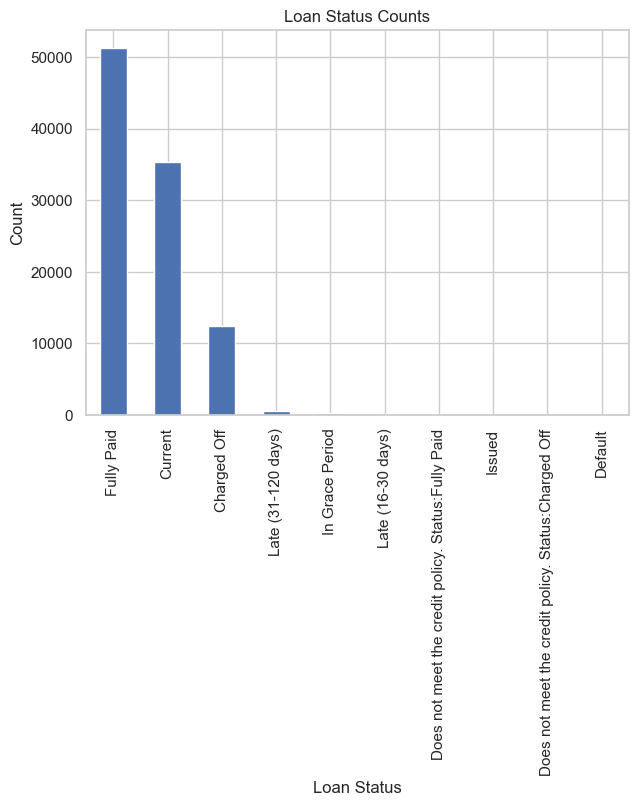

In [96]:
# Calculate the value counts for loan status
loan_status_counts = df['loan_status'].value_counts()

# Plot with matplotlib
plt.figure(figsize=(7, 5))  # width=500/100 and height=350/100 for similar sizing in inches
loan_status_counts.plot(kind='bar')

# Set title and labels
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")

# Show the plot
plt.show()

## Missing Data

### Checking for Missing Values
To ensure data integrity, we check for missing values in the dataset. The `isnull()` function is used to identify null entries, and the results are sorted by the number of missing values per column. This provides insight into the columns with the most missing data, which could impact our analysis and model performance.


In [97]:
# Check for missing values in each column
missing_values = df[pre_hardship_fields].isnull().sum().sort_values(ascending=False)
print(f"There is a total of: {len(missing_values)} columns that are missing data\n")
# print("\nMissing values in each column:\n") 
# print(missing_values[missing_values > 90000]) # Display only columns with missing values
missing_values

There is a total of: 102 columns that are missing data



dti_joint                         92834
annual_inc_joint                  92834
mths_since_last_record            85370
mths_since_recent_bc_dlq          78057
mths_since_last_major_derog       75398
mths_since_recent_revol_delinq    68342
mths_since_last_delinq            52814
il_util                           39685
mths_since_rcnt_il                31773
all_util                          29657
max_bal_bc                        29644
inq_last_12m                      29644
inq_fi                            29644
total_bal_il                      29644
total_cu_tl                       29644
open_acc_6m                       29644
open_il_12m                       29644
open_il_24m                       29644
open_act_il                       29644
open_rv_24m                       29644
open_rv_12m                       29644
mths_since_recent_inq             12810
emp_title                          8954
emp_length                         6950
num_tl_120dpd_2m                   5512


### Missing Data Strategy
Instead of dropping columns with a high number of missing values, we may want to retain them for our analysis. Following the logic of Abraham Wald's famous airplane and bullet holes approach, it could be beneficial to analyse the data we don't have rather than discard potentially useful columns. 

This is especially relevant for improving loan default predictions as the absence of data in itself is indicative of the possible risk to default on loans.

### Confirming DataFrame Shape

After exploring the missing values, we validate the shape of our dataframe to ensure that the dataset remains unchanged. 

This step helps confirm that we are still working with the full set of features and rows taking into account we've already stripped the first 3 columns.


In [98]:
# Print the shape of the full DataFrame
print("Shape of the full DataFrame df:", df.shape)

# Print the shape of the DataFrame subset with pre_hardship_fields columns
print("Shape of df with only pre_hardship_fields columns:", df[pre_hardship_fields].shape)

# Print the number of columns in pre_hardship_fields
print("Number of columns in pre_hardship_fields:", len(pre_hardship_fields))


Shape of the full DataFrame df: (100000, 143)
Shape of df with only pre_hardship_fields columns: (100000, 102)
Number of columns in pre_hardship_fields: 102


Next, we'll use the `missingno` library to analyze the missing data. This will help us understand how missing data is distributed across the dataset and the correlation between missing values in different columns.

The `missing_values` variable has been defined earlier in our workflow to quantify the total number of missing entries in each column. 

Now, we'll leverage this list to visualize the missing data using  missingno.

Categorical Data Missing Values



<Axes: >

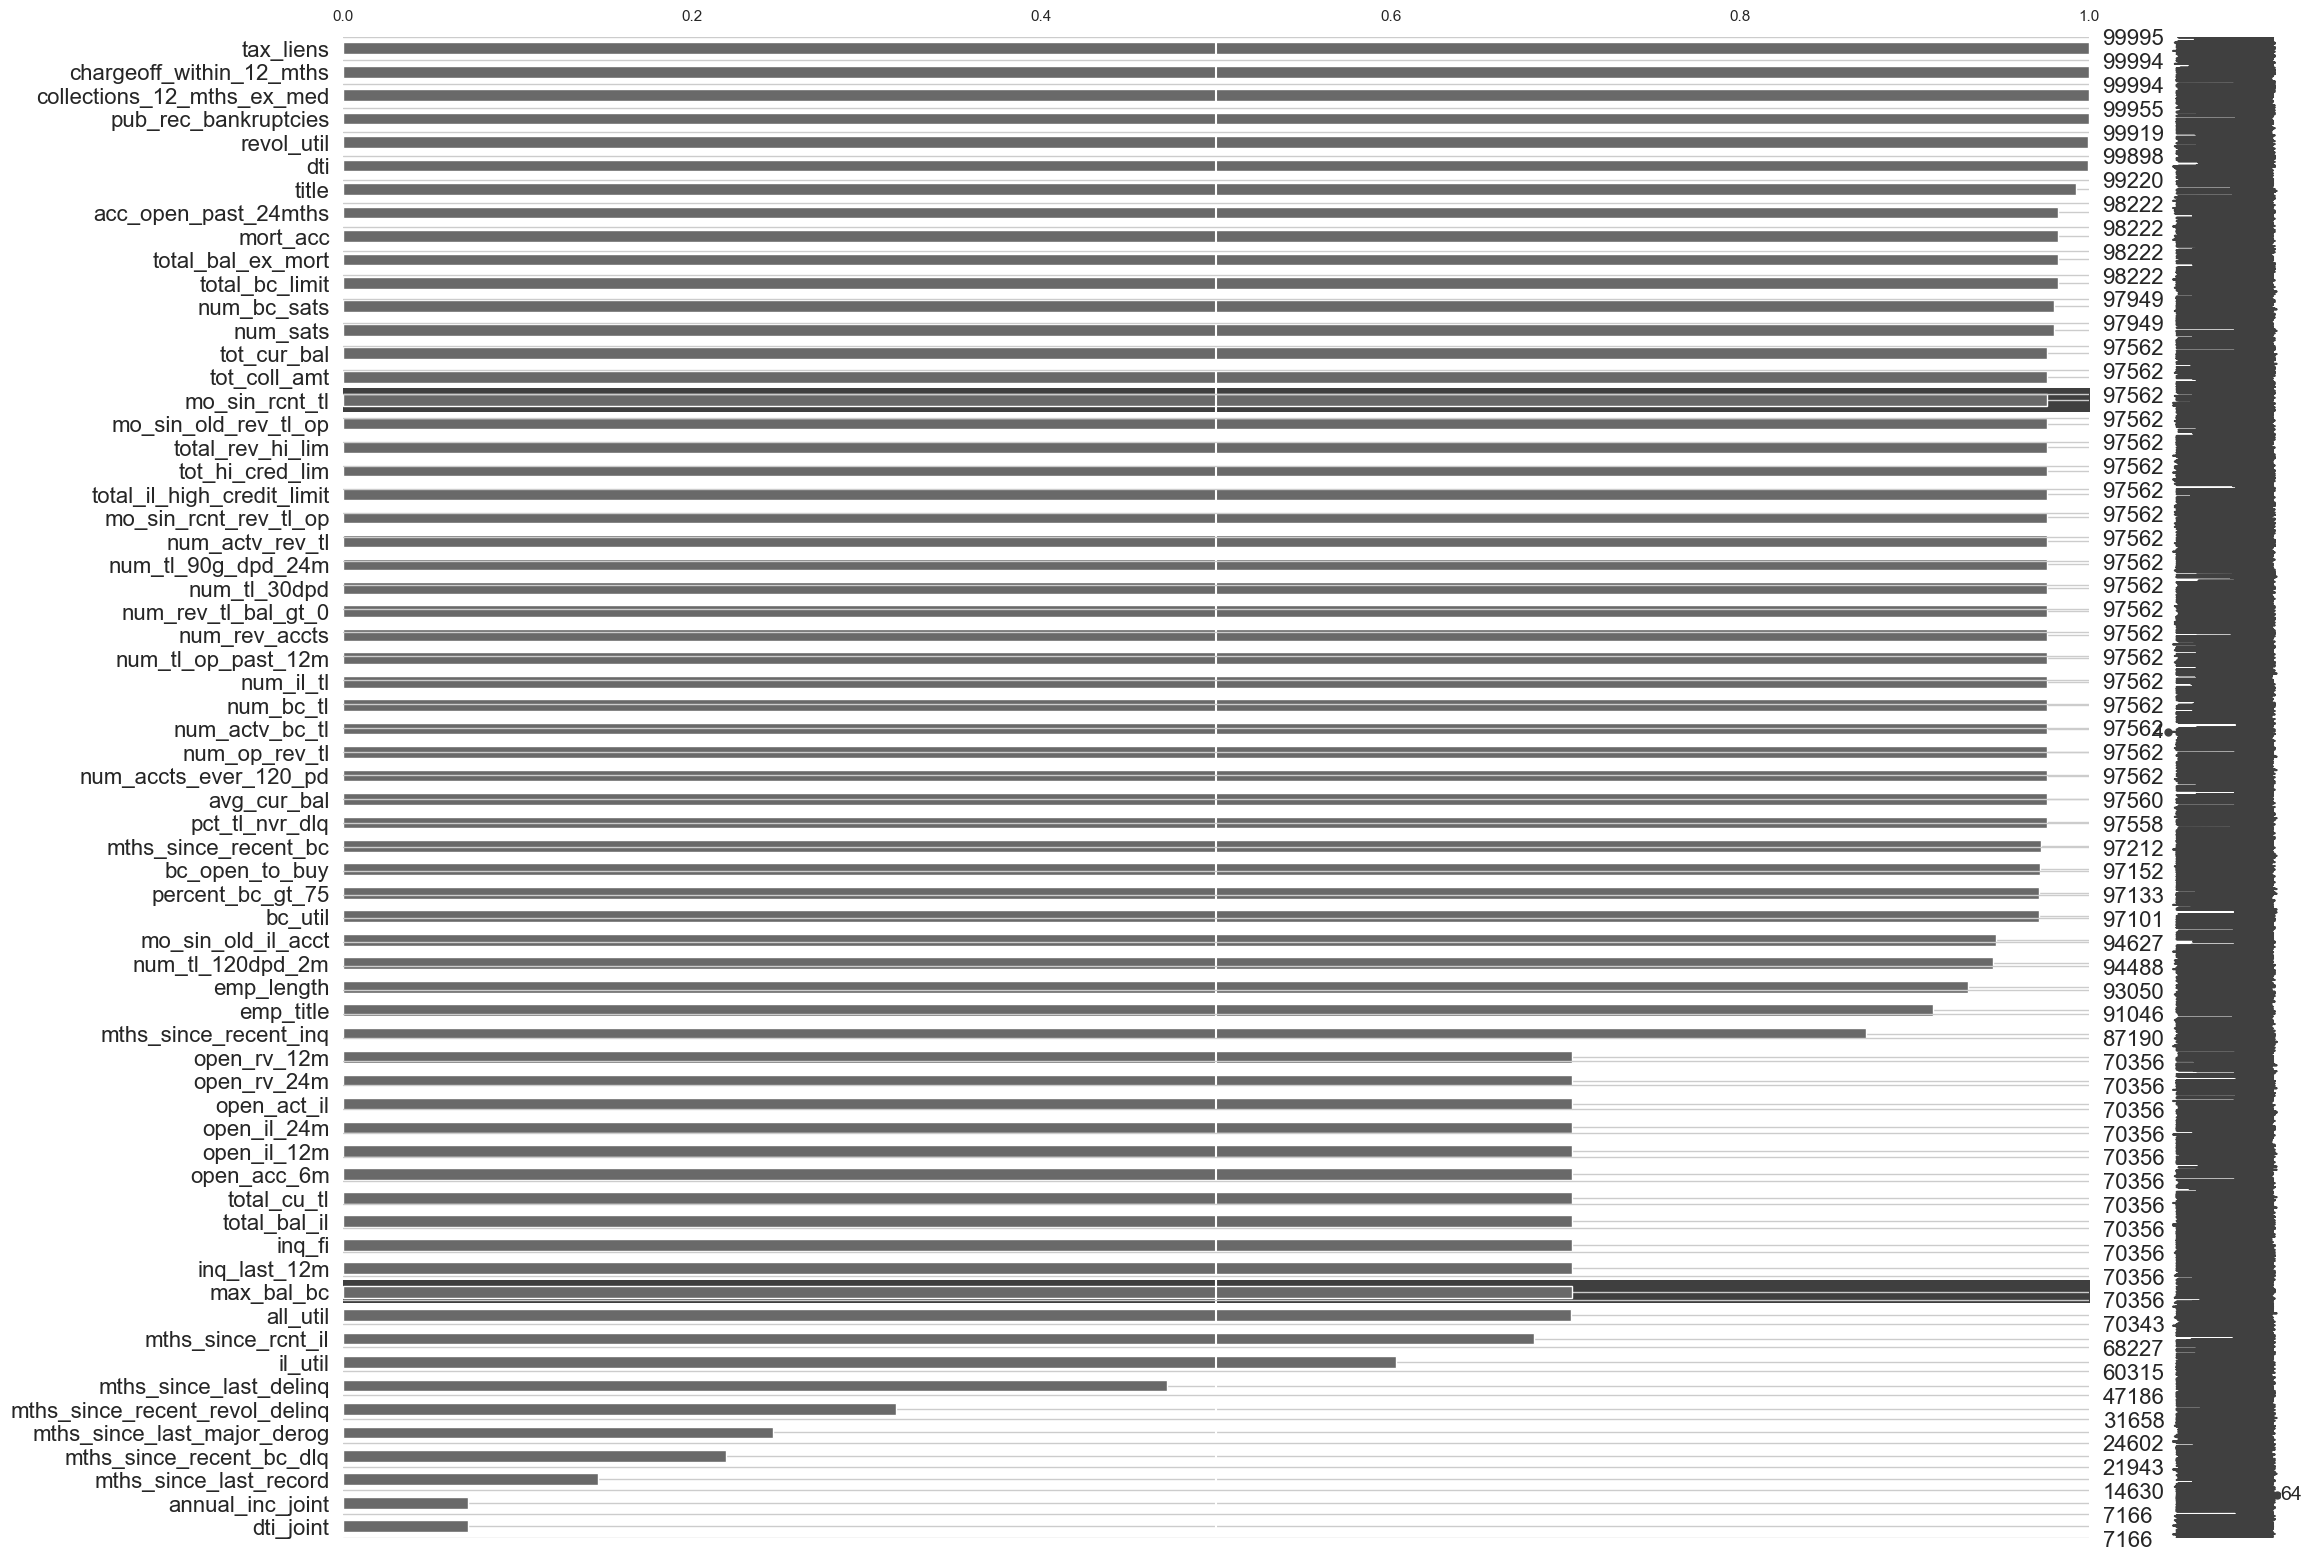

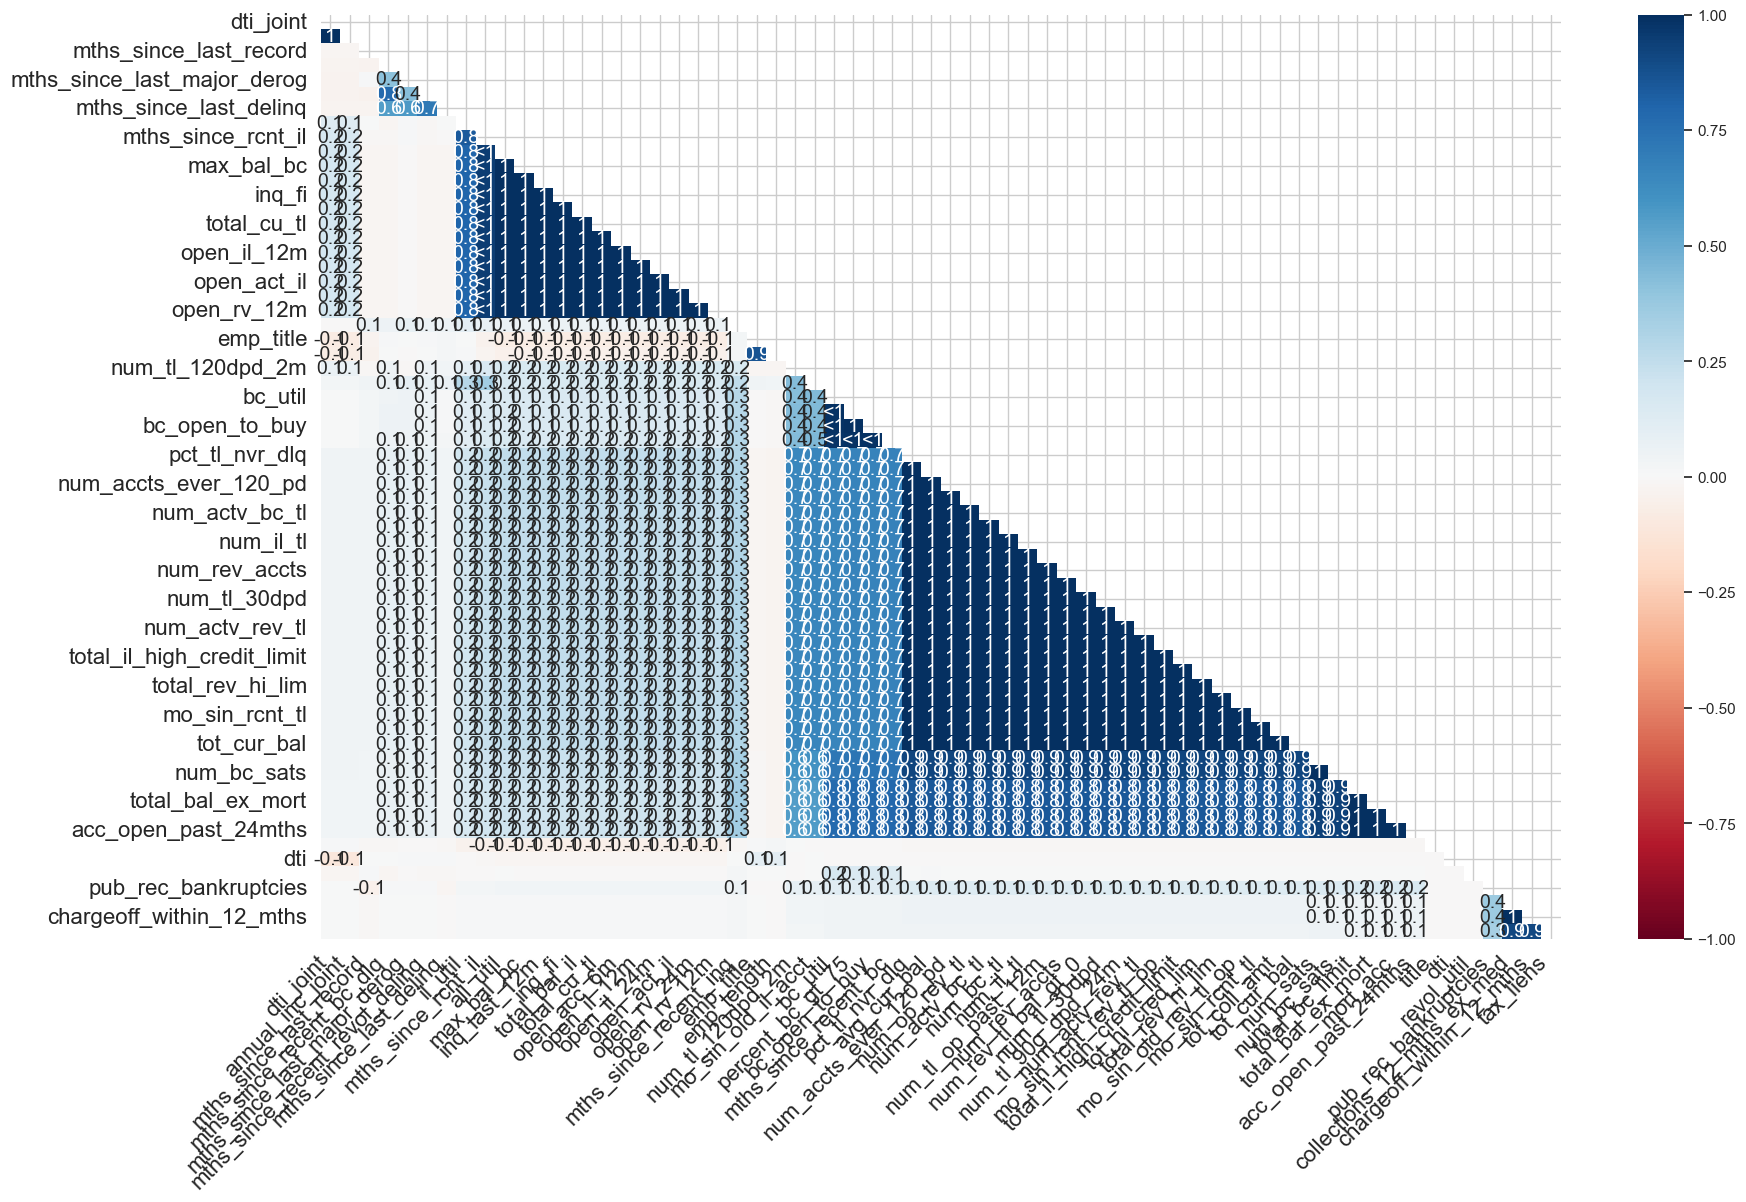

In [99]:
# Filter for columns with missing values greater than 0
missing_values_graph = df[missing_values[missing_values > 0].index]

print("Categorical Data Missing Values\n")

# Visualize the missing data using the missingno library
msno.matrix(missing_values_graph)
msno.bar(missing_values_graph)
msno.heatmap(missing_values_graph)
# msno.dendrogram(missing_values_graph) #removed for the final anlysis to avoid cluttering the document with the same data but a different way to show it

### Summary of our missing data findings

#### 1. Missing Data Matrix Plot:
- The matrix plot visualizes the distribution of missing data across the dataset columns.
- Some columns have no missing data, but a few are significantly affected.
- Several columns have a substantial percentage of missing data, some exceeding 75%.
- Key columns with high missing data include:
  - `hardship_*` related fields, `payment_plan_start_date`, `sec_app_*` fields, etc.

#### 2. Missing Data Heatmap:
- The heatmap shows correlations between columns with missing data.
- Higher intensity colors indicate stronger correlations.
- Examples include `emp_title`, `mths_since_last_major_derog`, and `revol_util` showing linked missingness.
- Strong correlations exist between certain groups of columns, suggesting shared patterns in their missing values.
- We can clearly distinguish 4 groups. The three largest relating to `hardship_`, `sec_`, and `Acc` data.

### Creating Missing Value Indicators

Opposed to solomly removing values and using collected data to predict loan defaults I will create indicator variables that flag whether a value was missing for a given feature. 

This allows us to retain missing values while also capturing information about whether a data point was reported or not, which could enhance our analysis.

In [100]:
# Creating a new list by selecting specific groups from the logical mapping we created earlier
selected_groups = ["Credit History", "Employment", "Credit Inquiries"] # created after reading the data dictionary
missing_value_indicator = sum([groups[group] for group in selected_groups], [])

In [101]:
print(len(missing_value_indicator)) # collection of columns from our grouping whilst reading the data dictionary
print(len(pre_hardship_fields)) # the columns that are most likely pre any loan defaults.

19
102


Our draft list of features (`draft_features`) now includes 122 columns identified during the analysis of the missing data, and the basic statistics from `df` along with the information within the data dictionary.

In [102]:
# Selection of initial features based on our previous findings and the descriptions within the data dictionary
new_features = []
new_features.extend(pre_hardship_fields)

Let's expand `df` with new columns to keep a record of the missingness values.

In [103]:
# Empty list to store the new column names
new_missing_columns = []

# Iterating through the list to create missing value indicator columns
for col in missing_value_indicator:
    indicator_col_name = f"{col}_missing_clean_kn"  # Create a new column name for the missing indicator
    df[indicator_col_name] = df[col].isnull().astype(int)  # 1 for missing, 0 for not missing
    
    # Append the new column name to the list
    new_missing_columns.append(indicator_col_name)

# Display the list of new column names
print("New missing indicator columns:", new_missing_columns)
print("Count of New Missing Columns created", len(new_missing_columns))

New missing indicator columns: ['earliest_cr_line_missing_clean_kn', 'fico_range_high_missing_clean_kn', 'fico_range_low_missing_clean_kn', 'last_fico_range_high_missing_clean_kn', 'last_fico_range_low_missing_clean_kn', 'mo_sin_old_il_acct_missing_clean_kn', 'mo_sin_old_rev_tl_op_missing_clean_kn', 'num_accts_ever_120_pd_missing_clean_kn', 'num_tl_120dpd_2m_missing_clean_kn', 'pub_rec_missing_clean_kn', 'pub_rec_bankruptcies_missing_clean_kn', 'emp_length_missing_clean_kn', 'emp_title_missing_clean_kn', 'annual_inc_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'inq_fi_missing_clean_kn', 'inq_last_12m_missing_clean_kn', 'inq_last_6mths_missing_clean_kn', 'num_tl_op_past_12m_missing_clean_kn']
Count of New Missing Columns created 19


In [104]:
# Example to verify the new columns
df[new_missing_columns].head()  # Display the first few rows to verify

earliest_cr_line_missing_clean_kn  fico_range_high_missing_clean_kn  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   

   fico_range_low_missing_clean_kn  last_fico_range_high_missing_clean_kn  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   last_fico_range_low_missing_clean_kn  mo_sin_old_il_acct_missing_clean_kn  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   mo_sin_old_rev_tl_op_missing_clean_kn  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   num_accts_ever_120_pd_missing_clean_kn  num_tl_120dpd_2m_missing_clean_kn  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   pub_rec_missing_clean_kn  pub_rec_bankruptcies_missing_clean_kn  \
0                         0                                      0   
1                         0                                      0   
2                         0                                      0   
3                         0                                      0   
4                         0                                      0   

   emp_length_missing_clean_kn  emp_title_missing_clean_kn  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            1                           1   
4                            0                           0   

   annual_inc_missing_clean_kn  annual_inc_joint_missing_clean_kn  \
0                            0                                  1   
1                            0                                  1   
2                            0                                  1   
3                            0                                  1   
4                            0                                  1   

   inq_fi_missing_clean_kn  inq_last_12m_missing_clean_kn  \
0                        0                              0   
1                        0                              0   
2                        1                              1   
3                        0                              0   
4                        0                              0   

   inq_last_6mths_missing_clean_kn  num_tl_op_past_12m_missing_clean_kn  
0                                0                                    0  
1                                0                                    0  
2                                0                                    

In [105]:
# Append the new items to the existing list
new_features.extend(new_missing_columns)
len(new_features)

121

Let's check for uniqueness in our feature list.

Here we're looking for variability i.e. which features contain the most variability. The below code will provide us with a list of unique value counts for each feature within our data set, ordered in decending order, and with a % that reflects the uniqueness i.e. if we have 100k unique values (id field) then the % uniqueness will be 100%. This little variability will not add value in our analysis.

In [106]:
def analyze_uniqueness(df):
    """
    Analyzes the number of unique values in all columns within a DataFrame, 
    regardless of their data type, and helps identify suitable candidates for visualization.

    Args:
        df: The Pandas DataFrame to analyze.

    Returns:
        A DataFrame with columns, unique value counts, and percentages.
        Also, displays a bar graph for the unique counts sorted from highest to lowest.
    """
    total_rows = len(df)

    # Calculate unique counts and percentages and store them in a DataFrame
    uniqueness_df = pd.DataFrame({
        "Unique Count": df.nunique(),
        "Unique Percentage": df.nunique() / total_rows * 100
    }).sort_values(by="Unique Count", ascending=False)

    # Print sorted output with unique counts and percentages
    print(uniqueness_df)

    # Create a bar graph to visualize the number of unique values
    plt.figure(figsize=(12, 6))
    plt.bar(uniqueness_df.index, uniqueness_df["Unique Count"])
    plt.xlabel("Columns", fontsize=14)
    plt.ylabel("Number of Unique Values", fontsize=14)
    plt.title("Unique Value Counts per Column (Sorted)", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

    return uniqueness_df

# Example usage with pre-selected columns
# Assuming df and pre_hardship_fields are defined and valid
#try:
#    unique_counts_df = analyze_uniqueness(df[pre_hardship_fields])
#except ValueError as e:
#    print(f"Error: {e}")

                                        Unique Count  Unique Percentage
total_pymnt                                    92840             92.840
total_pymnt_inv                                91836             91.836
total_rec_int                                  86806             86.806
tot_cur_bal                                    81168             81.168
tot_hi_cred_lim                                76897             76.897
total_bal_ex_mort                              64944             64.944
total_il_high_credit_limit                     55050             55.050
total_rec_prncp                                44924             44.924
total_bal_il                                   44392             44.392
emp_title                                      40094             40.094
revol_bal                                      37407             37.407
avg_cur_bal                                    34930             34.930
bc_open_to_buy                                 33138            

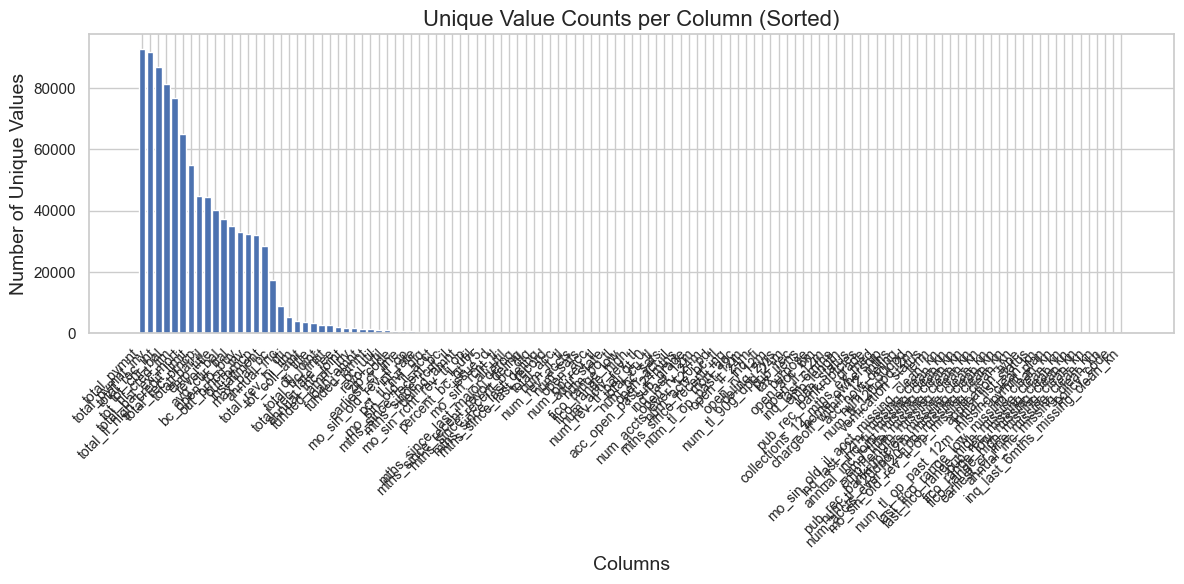

In [107]:
try:
    unique_counts_df = analyze_uniqueness(df[new_features])
except ValueError as e:
    print(f"Error: {e}")

Here we can see columns with 100% and 0% variability i.e. every row is unique or contains the same number. This is typical of unique identifiers and in our case policy codes. We can remove these as they won't be of any use to us for further analysis.

To simplify our data we'll remove 100%, 0%, and anythin less than 5%:

- 100% of values are unique = `id`, `url`
- 0% of values are unique = `policy_code`, `pymnt_plan`

We'll also take this opportunity to remove `unnamed:_0.1`, `unnamed:_0` too.

In [108]:
# List of columns to drop
columns_to_drop = ['policy_code', 'pymnt_plan']

# Remove specified columns from pre_hardship_fields_clean
new_features = [col for col in new_features if col not in columns_to_drop]

In [109]:
print(df.shape)
print(len(new_features))

(100000, 162)
119


Our feature list has been updated with the new columns. This means that for each column with missing values, a new binary indicator column is created, where `1` represents a missing value and `0` indicates that a value was present. 

This approach ensures that we retain as much information as possible from the original dataset while also capturing the fact that missing values themselves may provide valuable insight. For instance, missing income information could be an indicator of a higher default risk.

## Target Feature Engineering

Let's start by defining our target variable and applying simplify the `loan_status`

In [110]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

In [111]:
# Define the logical groupings for 'loan_status'
loan_status_groupings = {
    'Fully Paid': 'Paid Loan',
    'Current': 'Active Loan',
    'Charged Off': 'Defaulted Loan',
    'Late (31-120 days)': 'Late Loan',
    'In Grace Period': 'Late Loan',
    'Late (16-30 days)': 'Late Loan',
    'Does not meet the credit policy. Status:Fully Paid': 'Paid Loan',
    'Issued': 'Active Loan',
    'Does not meet the credit policy. Status:Charged Off': 'Defaulted Loan',
    'Default': 'Defaulted Loan'
}

# Apply the grouping to the 'loan_status' column
df['loan_status_grouped_kn'] = df['loan_status'].replace(loan_status_groupings)

# Verify the groupings
print(df['loan_status_grouped_kn'].value_counts())

loan_status_grouped_kn
Paid Loan         51258
Active Loan       35357
Defaulted Loan    12431
Late Loan           954
Name: count, dtype: int64


In [112]:
new_features.extend(['loan_status_grouped_kn'])

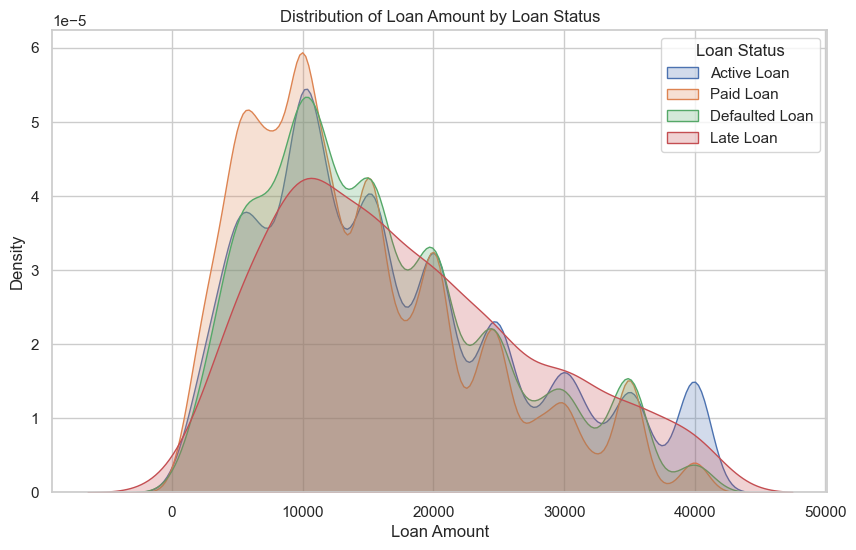

In [ ]:
plt.figure(figsize=(10, 6))
for status in df['loan_status_grouped_kn'].unique():
    sns.kdeplot(df[df['loan_status_grouped_kn'] == status]['loan_amnt'], label=status, fill=True)
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title="Loan Status")
plt.show()

The above image tells us that the marjority of loans range between 5-15k. However, we can see that there a majority of small (5k) to mid (10k) sized loans that have a tendancy to default. 

C:\Users\kiera\AppData\Local\Temp\ipykernel_16900\501775034.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length_cleaned'] = df['emp_length'].replace({


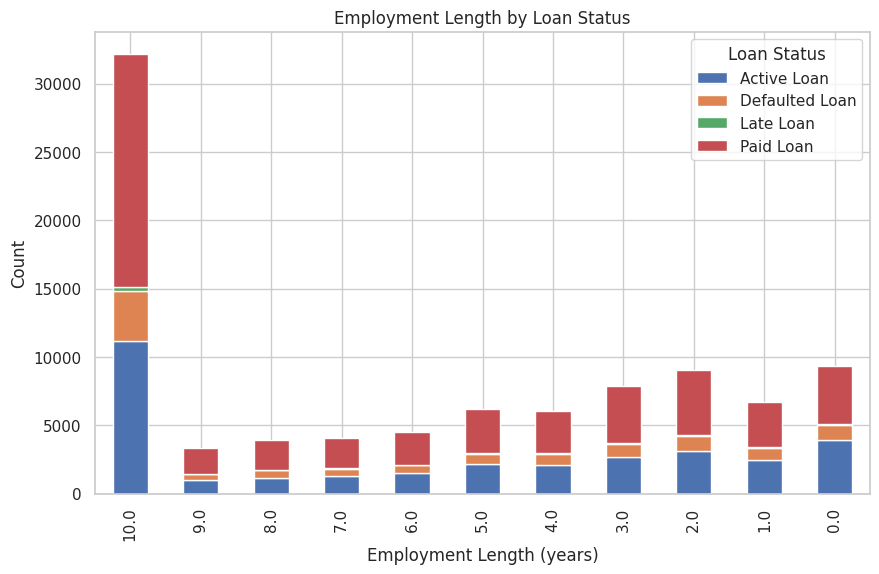

In [132]:
df['emp_length_cleaned'] = df['emp_length'].replace({
    '10+ years': 10.0,
    '9 years': 9.0, '8 years': 8.0, '7 years': 7.0, '6 years': 6.0, '5 years': 5.0,
    '4 years': 4.0, '3 years': 3.0, '2 years': 2.0, '1 year': 1.0, '< 1 year': 0.0,
    'n/a': None  # Assuming 'n/a' represents missing values
})

# Drop any NaN values in emp_length_cleaned if necessary
df = df.dropna(subset=['emp_length_cleaned'])

# Create a crosstab of loan_status_grouped_kn and sorted emp_length
emp_length_counts = pd.crosstab(df['emp_length_cleaned'], df['loan_status_grouped_kn'])

# Sort the index of emp_length_counts in descending order
emp_length_counts = emp_length_counts.sort_index(ascending=False)

# Plot as a stacked bar chart
emp_length_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the plot title and labels
plt.title('Employment Length by Loan Status')
plt.xlabel('Employment Length (years)')
plt.ylabel('Count')
plt.legend(title="Loan Status")
plt.show()

In the above image we can clearly see that 10 year tenure dominates the loan landscape. It would be interesting to see what the ratio per group is across Employment Length. I'd expect to see 1 and 2 years have a greater % of defaulted loans across the entire group.

In [136]:
# Replace NaN values in emp_length with None and convert to numerical values
df['emp_length_cleaned'] = df['emp_length'].replace({
    '10+ years': 10.0,
    '9 years': 9.0, '8 years': 8.0, '7 years': 7.0, '6 years': 6.0, '5 years': 5.0,
    '4 years': 4.0, '3 years': 3.0, '2 years': 2.0, '1 year': 1.0, '< 1 year': 0.0,
    'n/a': None  # Assuming 'n/a' represents missing values
})

# Drop any NaN values in emp_length_cleaned if necessary
df = df.dropna(subset=['emp_length_cleaned'])

# Create a crosstab of loan_status_grouped_kn and emp_length_cleaned
emp_length_counts = pd.crosstab(df['emp_length_cleaned'], df['loan_status_grouped_kn'])

# Calculate the percentage for each loan status within each employment length year
emp_length_percentage = emp_length_counts.div(emp_length_counts.sum(axis=1), axis=0) * 100

# Sort the index of emp_length_percentage in descending order
emp_length_percentage = emp_length_percentage.sort_index(ascending=False)

# Format each value to two decimal places with a % sign
emp_length_percentage = emp_length_percentage.applymap(lambda x: f"{x:.2f} %")

# Display the resulting table
emp_length_percentage


C:\Users\kiera\AppData\Local\Temp\ipykernel_16900\3601271610.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length_cleaned'] = df['emp_length'].replace({
C:\Users\kiera\AppData\Local\Temp\ipykernel_16900\3601271610.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emp_length_percentage = emp_length_percentage.applymap(lambda x: f"{x:.2f} %")


loan_status_grouped_kn Active Loan Defaulted Loan Late Loan Paid Loan
emp_length_cleaned                                                   
10.0                       34.60 %        11.47 %    0.79 %   53.13 %
9.0                        28.82 %        14.42 %    0.45 %   56.31 %
8.0                        29.83 %        13.63 %    0.82 %   55.73 %
7.0                        31.72 %        12.71 %    0.86 %   54.70 %
6.0                        32.65 %        13.43 %    0.85 %   53.07 %
5.0                        34.98 %        12.55 %    0.96 %   51.51 %
4.0                        34.96 %        13.45 %    1.10 %   50.49 %
3.0                        34.06 %        12.44 %    0.92 %   52.58 %
2.0                        34.78 %        11.87 %    0.99 %   52.36 %
1.0                        36.52 %        13.02 %    1.07 %   49.39 %
0.0                        42.36 %        11.38 %    1.06 %   45.20 %

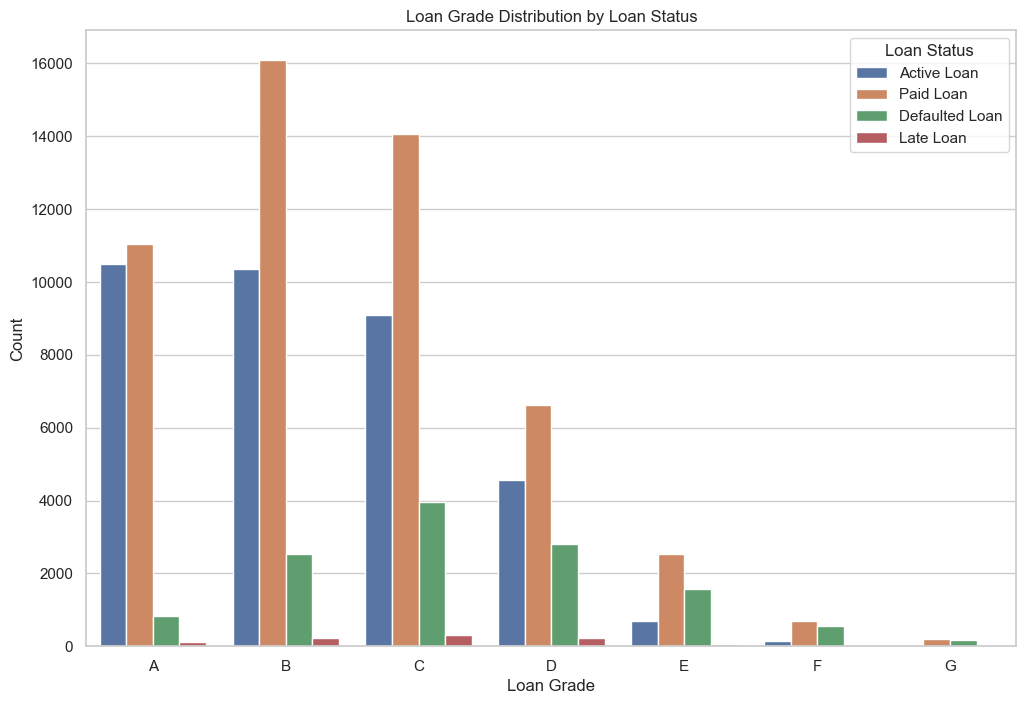

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='grade', hue='loan_status_grouped_kn', data=df, order=sorted(df['grade'].unique()))
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title="Loan Status")
plt.show()


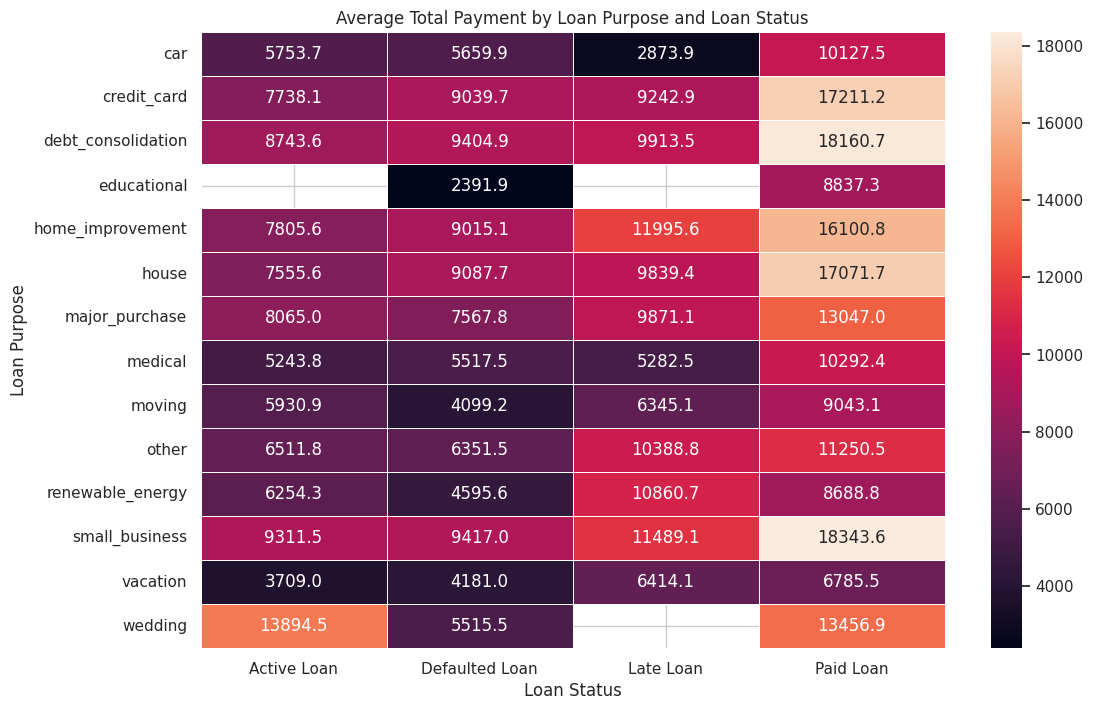

In [138]:
# Pivot table for heatmap
loan_purpose_pymnt = df.pivot_table(values='total_pymnt', index='purpose', columns='loan_status_grouped_kn', aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(loan_purpose_pymnt, annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Total Payment by Loan Purpose and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Purpose')
plt.show()


In [225]:
def group_loan_status(status):
    if status in ("Paid Loan", "Active Loan"):
        return "NoDefault"
    elif status in ("Defaulted Loan", "Late Loan"):
        return "Defaulted"
    else:
        return status

df['loan_status_grouped2_kn'] = df['loan_status_grouped_kn'].apply(group_loan_status)

# Print the value counts of the new field
print(df['loan_status_grouped2_kn'].value_counts())

loan_status_grouped2_kn
NoDefault    86615
Defaulted    13385
Name: count, dtype: int64


In [226]:
new_features.extend(['loan_status_grouped2_kn'])

In [227]:
print(len(new_features))

121


## Our dependant variable

Our dependant veriable is `loan_status_grouped_kn` further work is to understand how best to predict good and bad loan applicants.

In [228]:
df['loan_status_grouped_kn'].head()

0    Active Loan
1    Active Loan
2      Paid Loan
3    Active Loan
4      Paid Loan
Name: loan_status_grouped_kn, dtype: object

In [229]:
# Check if the specified columns are in new_features
columns_to_check = [['loan_status_grouped_kn','loan_status_grouped2_kn']]
missing_columns = [col for col in columns_to_check if col not in new_features]

# Display results
if not missing_columns:
    print("Both columns are in new_features.")
else:
    print(f"The following columns are missing from new_features: {missing_columns}")

The following columns are missing from new_features: [['loan_status_grouped_kn', 'loan_status_grouped2_kn']]


In [230]:
df_dropped = df[new_features].copy()

Let's check our data frame to see what we're working with. Note our most recent data frame is now df_dropped and no longer df.

In [231]:
print(df_dropped.shape)
print(len(new_features))

(100000, 121)
121


### Exploratory Data Analysis (EDA) on Missing Values

To understand the impact of missing values on our target variable (`loan_status`), we perform an exploratory analysis. 

This compares the distribution of loan status between rows where key variables are missing and where they are not. By doing this, we hope to detect which missing data is associated with loan outcomes. 

This helps us understand how big a influence on the target variable.


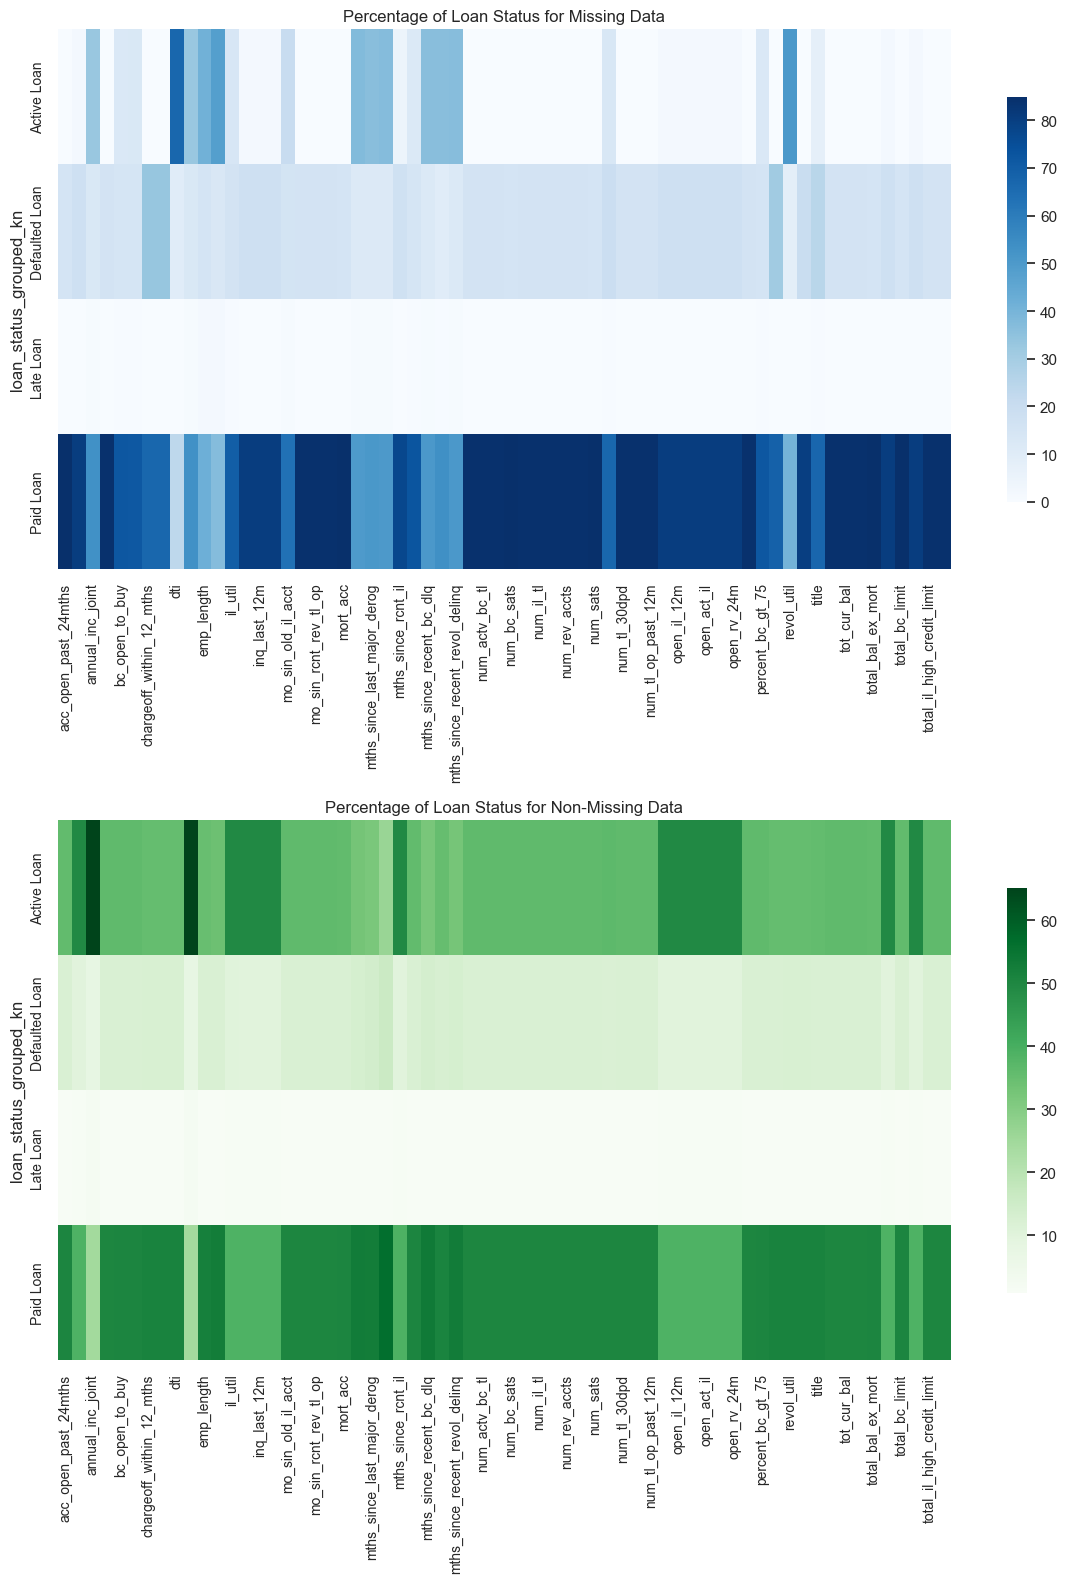

In [232]:
# Select columns that have missing values in df_dropped
missing_cols = df_dropped.columns[df_dropped.isnull().any()]

# Store results for plotting
missing_dict = {}
not_missing_dict = {}

# Function to collect percentages for missing and non-missing data
def missing_value_analysis(column, target_column='loan_status_grouped_kn'):
    missing = df_dropped[df_dropped[column].isnull()][target_column].value_counts(normalize=True) * 100
    not_missing = df_dropped[df_dropped[column].notnull()][target_column].value_counts(normalize=True) * 100
    missing_dict[column] = missing
    not_missing_dict[column] = not_missing

# Apply the function for all columns with missing data
for col in missing_cols:
    missing_value_analysis(col)

# Create DataFrames for heatmaps
missing_df = pd.DataFrame(missing_dict).fillna(0)  # Fill NaN with 0 to ensure proper heatmap display
not_missing_df = pd.DataFrame(not_missing_dict).fillna(0)

# Plotting heatmaps one below the other
fig, ax = plt.subplots(2, 1, figsize=(12, 16), gridspec_kw={'height_ratios': [1, 1]})  # Adjust aspect ratio

# Heatmap for missing data
sns.heatmap(missing_df, annot=False, cmap="Blues", ax=ax[0], cbar_kws={"shrink": .75})
ax[0].set_title('Percentage of Loan Status for Missing Data')
ax[0].tick_params(axis='x', rotation=90, labelsize=10)  # Rotate x-axis labels for readability
ax[0].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size

# Heatmap for non-missing data
sns.heatmap(not_missing_df, annot=False, cmap="Greens", ax=ax[1], cbar_kws={"shrink": .75})
ax[1].set_title('Percentage of Loan Status for Non-Missing Data')
ax[1].tick_params(axis='x', rotation=90, labelsize=10)  # Rotate x-axis labels for readability
ax[1].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Summary of Missing and Non-Missing Data by Loan Status

#### 1. Percentage of Missing Data (First Image)
- **Paid Loan**: Shows a high percentage of missing data across numerous columns, particularly towards the end of the list (indicated by darker shades of blue).
- **Active Loan** and **Late Loan**: Generally have less missing data, though some specific columns still contain notable missing values.
- **Defaulted Loan**: Contains fewer missing values compared to `Paid Loan`, but some columns still show missing data.

#### 2. Percentage of Non-Missing Data (Second Image)
- **Paid Loan**: Displays lower percentages of non-missing data across various columns, aligning with the missing data heatmap (darker greens represent more missing data).
- **Active Loan** and **Late Loan**: Feature higher percentages of non-missing data in most columns, shown by lighter green shades, suggesting more complete data.
- **Defaulted Loan**: Generally has a higher percentage of non-missing data than `Paid Loan`, but less than `Active Loan` and `Late Loan`.

### Data Preparation and Cleaning

Perform thorough data cleaning on the provided dataset, including but not limited to the following steps:

* Handling missing values (imputation or removal)
* Converting data types to appropriate formats
* Removing duplicate records
* Detecting and handling outliers
* Encoding categorical variables

In [233]:
# Cross table of data types in df
dtype_crosstab = df_dropped.dtypes.value_counts().reset_index()
dtype_crosstab.columns = ['Data Type', 'Count']

# Display the cross table
dtype_crosstab

Data Type  Count
0   float64     70
1    object     20
2     int32     19
3     int64     12

In [234]:
# Correct references to 'completed' to 'complete' in the 'hardship_status' column
df_dropped['hardship_status_kn'] = df['hardship_status'].replace('COMPLETED', 'COMPLETE')

In [235]:
new_features.extend(['hardship_status_kn'])

In [236]:
print(df_dropped.shape)
print(len(new_features))

(100000, 122)
122


In [237]:
new_features

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_r

# Preliminary Feature Selection

Based on our initial quick analysis of the data and the data dictionary, we'll now work on the shortlisted features for further exploration in our machine learning model. These features were selected based on their relevant at the time of taking out a loan.

In [238]:
df_dropped.shape

(100000, 122)

In [239]:
# Filter and list columns with 'object' data types from our selected features
# This helps us identify which columns require encoding or conversions before modeling
df_dropped[new_features].select_dtypes(include=['object']).dtypes

addr_state                 object
application_type           object
earliest_cr_line           object
emp_length                 object
emp_title                  object
grade                      object
home_ownership             object
initial_list_status        object
int_rate                   object
issue_d                    object
loan_status                object
purpose                    object
revol_util                 object
sub_grade                  object
term                       object
title                      object
verification_status        object
zip_code                   object
loan_status_grouped_kn     object
loan_status_grouped2_kn    object
hardship_status_kn         object
dtype: object

In [240]:
df_dropped[new_features].select_dtypes(include=['object']).head()

addr_state application_type earliest_cr_line emp_length       emp_title  \
0         NY       Individual           Dec-04  10+ years         cashier   
1         LA       Individual           Jan-04    6 years             ABM   
2         FL       Individual           Apr-10  10+ years          driver   
3         OH       Individual           Oct-05        NaN             NaN   
4         NE       Individual           Apr-08  10+ years  Shipping Clerk   

  grade home_ownership initial_list_status int_rate issue_d loan_status  \
0     B       MORTGAGE                   w   13.08%  Mar-20     Current   
1     B           RENT                   w    9.16%  Feb-16     Current   
2     B       MORTGAGE                   f   10.49%  Jan-15  Fully Paid   
3     B       MORTGAGE                   w   11.05%  Jun-18     Current   
4     C       MORTGAGE                   w   13.59%  Jan-18  Fully Paid   

              purpose revol_util sub_grade        term  \
0    home_improvement     82.80%        B5   36 months   
1         credit_card     64.50%        B2   60 months   
2         credit_card     52.60%        B3   36 months   
3  debt_consolidation     12.10%        B4   60 months   
4  debt_consolidation     27.10%        C2   60 months   

                     title verification_status zip_code  \
0         Home improvement     Source Verified    115xx   
1  Credit card refinancing     Source Verified    708xx   
2  Credit card refinancing        Not Verified    347xx   
3       Debt consolidation        Not Verified    443xx   
4       Debt consolidation     Source Verified    681xx   

  loan_status_grouped_kn loan_status_grouped2_kn hardship_status_kn  
0            Active Loan               NoDefault                NaN  
1            Active Loan               NoDefault                NaN  
2              Paid Loan               NoDefault                NaN  
3            Active Loan               NoDefault                NaN  
4              Paid Loan               NoDefault                NaN

# Exploratory Data Analysis

## List split

Let's take our list of features we'd like to review for machine learning and split them into 3 seperate lists (boolean, numerical, and categorical) for further analysis.

In this next phase I want to explore the feature selection for multicollinearity and distribution.

In [241]:
def split_data_frame(features_list, df):
    """
    Splits the provided DataFrame into three lists containing Boolean, Numerical, and Categorical column names.
    Converts floats with trailing zeros into integers and replaces NaN values with 0 for integers, 0.00 for floats.

    Parameters:
    features_list (list): List of column names to be checked.
    df (pd.DataFrame): The input DataFrame to split.

    Returns:
    tuple: A tuple containing three lists (boolean_cols, numerical_cols, categorical_cols).
    """
    boolean_cols = []
    numerical_cols = []
    categorical_cols = []

    # Define acceptable boolean values
    acceptable_boolean_values = {0, 1, True, False, 0.0, 1.0}

    for col in features_list:
        # Treat each column explicitly as a Series
        column_series = df[col]

        # Handle cases where columns might be interpreted incorrectly
        if pd.api.types.is_bool_dtype(column_series) or all(column_series.dropna().isin(acceptable_boolean_values)):
            boolean_cols.append(col)
        elif pd.api.types.is_numeric_dtype(column_series):
            # Check for floats with trailing zeros
            if column_series.dtype == 'float64':
                # Check if all float values are equivalent to integers
                if all(column_series.dropna() == column_series.dropna().astype(int)):
                    df[col] = column_series.fillna(0).astype(int)  # Replace NaNs with 0 and convert to int
                else:
                    df[col] = column_series.fillna(0.00)  # Replace NaNs with 0.00 for floats
                numerical_cols.append(col)
            else:
                df[col] = column_series.fillna(0)  # Replace NaNs with 0 for integers
                numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    
    # Print a summary of the count of columns in each list
    print(f"Summary of column counts:")
    print(f"boolean_list contains {len(boolean_cols)} values")
    print(f"numerical_list contains {len(numerical_cols)} values")
    print(f"categorical_list contains {len(categorical_cols)} values")
    print(f"The feature list we'll be working with contains {df_dropped[new_features].shape} rows and columns.")

    return boolean_cols, numerical_cols, categorical_cols

# Instructions:
# this calls the split_data_frame function above create three lists to capture the sorting outputs in. 
# These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.
# boolean_list, numerical_list, categorical_list = split_data_frame(new_features, df_dropped)


In [242]:
# Check which columns are in df_dropped
missing_columns = [col for col in new_features if col not in df_dropped.columns]

print("Missing columns:", missing_columns)

Missing columns: []


In [243]:
# this calls the split_data_frame function above create three lists to capture the sorting outputs in. 
# These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.
# Our function parameters are list and the latest version of our data frame in this caes new_features and df_dropped accordingly.
boolean_list, numerical_list, categorical_list = split_data_frame(new_features, df_dropped)

Summary of column counts:
boolean_list contains 19 values
numerical_list contains 82 values
categorical_list contains 21 values
The feature list we'll be working with contains (100000, 122) rows and columns.


In [244]:
df_dropped[categorical_list].head()

addr_state application_type earliest_cr_line emp_length       emp_title  \
0         NY       Individual           Dec-04  10+ years         cashier   
1         LA       Individual           Jan-04    6 years             ABM   
2         FL       Individual           Apr-10  10+ years          driver   
3         OH       Individual           Oct-05        NaN             NaN   
4         NE       Individual           Apr-08  10+ years  Shipping Clerk   

  grade home_ownership initial_list_status int_rate issue_d loan_status  \
0     B       MORTGAGE                   w   13.08%  Mar-20     Current   
1     B           RENT                   w    9.16%  Feb-16     Current   
2     B       MORTGAGE                   f   10.49%  Jan-15  Fully Paid   
3     B       MORTGAGE                   w   11.05%  Jun-18     Current   
4     C       MORTGAGE                   w   13.59%  Jan-18  Fully Paid   

              purpose revol_util sub_grade        term  \
0    home_improvement     82.80%        B5   36 months   
1         credit_card     64.50%        B2   60 months   
2         credit_card     52.60%        B3   36 months   
3  debt_consolidation     12.10%        B4   60 months   
4  debt_consolidation     27.10%        C2   60 months   

                     title verification_status zip_code  \
0         Home improvement     Source Verified    115xx   
1  Credit card refinancing     Source Verified    708xx   
2  Credit card refinancing        Not Verified    347xx   
3       Debt consolidation        Not Verified    443xx   
4       Debt consolidation     Source Verified    681xx   

  loan_status_grouped_kn loan_status_grouped2_kn hardship_status_kn  
0            Active Loan               NoDefault                NaN  
1            Active Loan               NoDefault                NaN  
2              Paid Loan               NoDefault                NaN  
3            Active Loan               NoDefault                NaN  
4              Paid Loan               NoDefault                NaN

In [245]:
df_dropped[numerical_list].head()

acc_now_delinq  acc_open_past_24mths  all_util  annual_inc  \
0               0                     1        59     48000.0   
1               0                     4        67     57000.0   
2               0                     4         0     55000.0   
3               0                     4        25     43500.0   
4               0                     5        43     48000.0   

   annual_inc_joint  avg_cur_bal  bc_open_to_buy  bc_util  \
0               0.0        64756               0      0.0   
1               0.0         6182            7741     40.5   
2               0.0        22733            4521     54.8   
3               0.0         6973           43140     12.0   
4               0.0         5641           17318     39.9   

   chargeoff_within_12_mths  collections_12_mths_ex_med  delinq_2yrs  \
0                         0                           1            1   
1                         0                           0            0   
2                         0                           0            0   
3                         0                           0            0   
4                         0                           0            0   

   delinq_amnt    dti  dti_joint  fico_range_high  fico_range_low  \
0            0  20.25        0.0              669             665   
1            0  25.33        0.0              684             680   
2            0   7.22        0.0              669             665   
3            0  24.55        0.0              754             750   
4            0  24.30        0.0              739             735   

   funded_amnt  funded_amnt_inv  il_util  inq_fi  inq_last_12m  \
0         4000           4000.0       56       1             0   
1        24000          24000.0       72       0             0   
2         5000           5000.0        0       0             0   
3        24000          24000.0       60       2             2   
4        14000          14000.0       60       1             2   

   inq_last_6mths  installment  loan_amnt  max_bal_bc  mo_sin_old_il_acct  \
0               0       134.93       4000           0                 179   
1               0       500.07      24000        2137                 145   
2               0       162.49       5000           0                  57   
3               0       522.42      24000        2223                  37   
4               1       322.79      14000        3907                  72   

   mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  \
0                    75                     38              16         2   
1                   137                      7               7         0   
2                    57                     14               9         1   
3                   132                      1               1         2   
4                   117                      6               6         2   

   mths_since_last_delinq  mths_since_last_major_derog  \
0                      19                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   mths_since_last_record  mths_since_rcnt_il  mths_since_recent_bc  \
0                     110                  16                     0   
1                       0                  14                     7   
2                      61                   0                    14   
3                       0                  17                     1   
4                       0                   7                     6   

   mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                        19                     16   
1                         0                     24   
2                         0                      1   
3                         0                      3   
4                         0       

In [246]:
df_dropped[boolean_list].head()

earliest_cr_line_missing_clean_kn  fico_range_high_missing_clean_kn  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   

   fico_range_low_missing_clean_kn  last_fico_range_high_missing_clean_kn  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   last_fico_range_low_missing_clean_kn  mo_sin_old_il_acct_missing_clean_kn  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   mo_sin_old_rev_tl_op_missing_clean_kn  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   num_accts_ever_120_pd_missing_clean_kn  num_tl_120dpd_2m_missing_clean_kn  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   pub_rec_missing_clean_kn  pub_rec_bankruptcies_missing_clean_kn  \
0                         0                                      0   
1                         0                                      0   
2                         0                                      0   
3                         0                                      0   
4                         0                                      0   

   emp_length_missing_clean_kn  emp_title_missing_clean_kn  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            1                           1   
4                            0                           0   

   annual_inc_missing_clean_kn  annual_inc_joint_missing_clean_kn  \
0                            0                                  1   
1                            0                                  1   
2                            0                                  1   
3                            0                                  1   
4                            0                                  1   

   inq_fi_missing_clean_kn  inq_last_12m_missing_clean_kn  \
0                        0                              0   
1                        0                              0   
2                        1                              1   
3                        0                              0   
4                        0                              0   

   inq_last_6mths_missing_clean_kn  num_tl_op_past_12m_missing_clean_kn  
0                                0                                    0  
1                                0                                    0  
2                                0                                    

The following sections are the code snippets we'll use to analyse our data (Numerical, Boolean, Categorical)

#### Numerical Processing

The below code creates a distribution plot and box plot for outlier detection along with the most common statistical analysis for normality and outlier (ztest and IQR). The function loops through the aforementioend numerical lists.

In [247]:
def analyze_numeric_columns(numeric_cols, dataframe):
    """
    Analyze and visualize numeric columns in a DataFrame.

    Parameters:
    numeric_cols (list): List of numeric column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in numeric_cols:
        print(f"\nSummary Statistics and Analysis for Numeric Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f" '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Ensure the column is converted to numeric
        dataframe.loc[:, column] = pd.to_numeric(dataframe[column], errors='coerce')

        # Drop NaN values to ensure we have numeric data for analysis
        numeric_data = dataframe[column].dropna()

        if numeric_data.empty:
            print(f"No valid numeric data available for column: {column}. Skipping...")
            continue  # Skip the column if there's no valid data

        # Calculate z-scores
        z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

        # Calculate IQR
        Q1 = numeric_data.quantile(0.25)
        Q3 = numeric_data.quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on z-scores (z > 3 or z < -3)
        outliers_z = numeric_data[(z_scores > 3) | (z_scores < -3)]

        # Identify outliers based on IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

        # Create a figure for the distribution and box plot
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Distribution plot (histogram)
        sns.histplot(numeric_data, kde=True, bins=10, ax=axs[0])
        axs[0].set_title(f'Distribution of {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')

        # Box plot for outlier detection
        sns.boxplot(x=numeric_data, ax=axs[1])
        axs[1].set_title(f'Box Plot for {column} (Outlier Detection)')
        axs[1].set_xlabel(column)

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Summary Statistics
        print(f"\nSummary Statistics for Numeric  '{column}':")
        print(numeric_data.describe())

        # Interquartile Range (IQR)
        print(f"\nInterquartile Range (IQR): {IQR:.4f}")
        print(f"Lower Bound for Outliers (IQR method): {lower_bound:.4f}")
        print(f"Upper Bound for Outliers (IQR method): {upper_bound:.4f}")
        print(f"Number of Outliers (IQR method): {len(outliers_iqr)}")

        # Display outliers based on IQR
        #if not outliers_iqr.empty:
        #    print("\nOutliers detected using the IQR method:")
        #    print(outliers_iqr)
        #else:
        #    print("\nNo outliers detected using the IQR method.")

        # Z-scores
        print("\nZ-score Summary:")
        print(z_scores.describe())

        print(f"\nNumber of Outliers (Z-score method): {len(outliers_z)}")

        # Display outliers based on Z-scores
        #if not outliers_z.empty:
        #    print("\nOutliers detected using the Z-score method:")
        #    print(outliers_z)
        #else:
        #    print("\nNo outliers detected using the Z-score method.")

        # Skewness
        skewness_value = skew(numeric_data)
        print(f"\nSkewness: {skewness_value:.4f}")

        # Normality Tests
        print("\nNormality Tests:")
        # D'Agostino's K^2 Test
        k2_stat, k2_p = normaltest(numeric_data)
        print(f"D'Agostino's K^2 Test: Statistic={k2_stat:.4f}, p-value={k2_p:.4f}")

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(numeric_data)
        print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

        # Anderson-Darling Test
        anderson_result = anderson(numeric_data)
        print(f"Anderson-Darling Test: Statistic={anderson_result.statistic:.4f}")
        #for i in range(len(anderson_result.critical_values)):
        #    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
        #    if anderson_result.statistic < cv:
        #        result = "Accept"
        #    else:
        #        result = "Reject"
        #    print(f"At {sl}% significance level, critical value: {cv:.4f}, {result} the null hypothesis of normality")

        # Kolmogorov-Smirnov Test against normal distribution
        # ks_stat, ks_p = kstest(numeric_data, 'norm', args=(numeric_data.mean(), numeric_data.std()))
        # print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")

        

### Boolean Processing

Similar to the numerical processing function this function loops through the boolean list and produces a bar chart and a pie chart along with value counts and descriptive information.

In [248]:
def analyze_boolean_columns(boolean_cols, dataframe):
    """
    Analyze and visualize boolean columns in a DataFrame.

    Parameters:
    boolean_cols (list): List of boolean column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in boolean_cols:
        print(f"\nSummary Statistics and Analysis for Boolean Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"'{column}' is not found in the DataFrame. Skipping...")
            continue

        # Cast the column to boolean in case it contains 1/0 or other non-boolean values
        dataframe[column] = dataframe[column].astype(bool)

        # Prepare boolean counts
        boolean_counts = dataframe[column].value_counts()

        # Create a figure with two subplots
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT)) # Configured at the beginning of the file for image consistancy

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Boolean Distribution for {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Count')

        # Rotate x-axis labels
        plt.xticks(rotation=90)

        # Pie chart on the right subplot
        boolean_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            startangle=90
        )
        axs[1].set_title(f'Proportion of True/False for {column}')
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Display summary statistics for boolean data
        print(f"\nSummary for Boolean '{column}':")
        true_count = boolean_counts.get(True, 0)
        false_count = boolean_counts.get(False, 0)
        total_count = true_count + false_count
        true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0

        print(f"Count of True: {true_count}")
        print(f"Count of False: {false_count}")
        print(f"Percentage of True: {true_percentage:.2f}%")


### Categorical Processing

This last function review the categorical features within our data set and compares in a similar fashion as the boolean function does. We will see a bar and pie chart display for each value as they are lopped through by the function.

In [249]:
def analyze_categorical_columns(categorical_cols, dataframe):
    """
    Analyze and visualize categorical columns in a DataFrame.

    Parameters:
    categorical_cols (list): List of categorical column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in categorical_cols:
        print(f"\nSummary Statistics and Analysis for Categorical Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f" '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Prepare category counts and percentages
        category_counts = dataframe[column].value_counts()
        category_percentages = dataframe[column].value_counts(normalize=True) * 100

        # Display bar plot and pie chart
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Frequency Distribution for {column} (Categorical Data)')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')

        # Pie chart on the right subplot
        category_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            title=f'Proportion of Categories for {column}',
            startangle=90
        )
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        print(f"\nFrequency Table for '{column}':")
        freq_table = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
        print(freq_table)


In [250]:
len(new_features) # issue

122

Let's start with our analysis of the Categorical features.

In [251]:
import re

# List to store features that contain any numerical values (even within mixed text)
categorical_list_with_numerical_values = []

# Iterate through each column in categorical_list
for column in categorical_list:
    # Check if the column contains any values with numerical characters
    if df_dropped[column].apply(lambda x: bool(re.search(r'\d', str(x)))).any():
        categorical_list_with_numerical_values.append(column)
        print(f" '{column}' contains numerical values.")

 'earliest_cr_line' contains numerical values.
 'emp_length' contains numerical values.
 'emp_title' contains numerical values.
 'int_rate' contains numerical values.
 'issue_d' contains numerical values.
 'loan_status' contains numerical values.
 'revol_util' contains numerical values.
 'sub_grade' contains numerical values.
 'term' contains numerical values.
 'title' contains numerical values.
 'zip_code' contains numerical values.


In [252]:
df_dropped[categorical_list_with_numerical_values].columns

Index(['earliest_cr_line', 'emp_length', 'emp_title', 'int_rate', 'issue_d',
       'loan_status', 'revol_util', 'sub_grade', 'term', 'title', 'zip_code'],
      dtype='object')

Let's explore our data to avoid creating graphs for rows that contain unique values. To do this we'll run a bar chart.

In [253]:
def analyze_categorical_uniqueness(df, columns):
    """
    Analyzes the number of unique values in categorical columns and 
    helps identify suitable candidates for visualization.

    Args:
        df: The Pandas DataFrame.
        columns: A list of column names to analyze.

    Returns:
        A dictionary where keys are column names and values are 
        the number of unique values in each column. Also, 
        prints a summary to assist visualizing the results via bar graphs.
    """
    uniqueness_counts = {}
    for col in columns:
        if not pd.api.types.is_object_dtype(df[col]):  # checks for object type; adjust if needed
            continue  # Skip analysis for non-categorical columns
        
        unique_count = df[col].nunique()  # use nunique for direct count of unique values
        uniqueness_counts[col] = unique_count

    # Sort the dictionary by unique counts in descending order
    sorted_uniqueness_counts = dict(sorted(uniqueness_counts.items(), key=lambda item: item[1], reverse=True))

    # Print sorted output with unique counts
    print("Sorted Unique Value Counts:")
    for col, unique_count in sorted_uniqueness_counts.items():
        print(f"Number of unique values in '{col}': {unique_count}")

    # Create a bar graph to visualize the number of unique values, sorted from high to low
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_uniqueness_counts.keys(), sorted_uniqueness_counts.values())
    plt.xlabel("Categorical Columns", fontsize=14)
    plt.ylabel("Number of Unique Values", fontsize=14)
    plt.title("Unique Value Counts per Categorical Column (Sorted)", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

    return sorted_uniqueness_counts

# Example usage:

#categorical_uniqueness = analyze_categorical_uniqueness(df_dropped, categorical_list_with_numerical_values)
#columns_for_visualization = [col for col, count in categorical_uniqueness.items() if count <= 15] # Example: Use only below or equal to 10
#print(f"\nSuggested columns for visualization (<= 15 unique values): {columns_for_visualization}")


In [254]:
print(df_dropped.shape)
print(len(new_features))

(100000, 122)
122


In [256]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_unique_values(df, columns, data_type):
    """
    Analyzes the number of unique values in specified columns and
    helps identify suitable candidates for visualization based on data type.

    Args:
        df: The Pandas DataFrame.
        columns: A list of column names to analyze.
        data_type: Type of columns being analyzed (e.g., categorical, boolean, numerical).

    Returns:
        A dictionary where keys are column names and values are 
        the number of unique values in each column. Also, 
        prints a summary to assist visualizing the results via bar graphs.
    """
    uniqueness_counts = {}
    for col in columns:
        unique_count = df[col].nunique()  # Count unique values directly
        uniqueness_counts[col] = unique_count

    # Sort the dictionary by unique counts in descending order
    sorted_uniqueness_counts = dict(sorted(uniqueness_counts.items(), key=lambda item: item[1], reverse=True))

    # Print sorted output with unique counts
    print(f"Sorted Unique Value Counts ({data_type}):")
    for col, unique_count in sorted_uniqueness_counts.items():
        print(f"Number of unique values in '{col}': {unique_count}")

    # Create a bar graph to visualize the number of unique values, sorted from high to low
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_uniqueness_counts.keys(), sorted_uniqueness_counts.values())
    plt.xlabel(f"{data_type.capitalize()} Columns", fontsize=14)
    plt.ylabel("Number of Unique Values", fontsize=14)
    plt.title(f"Unique Value Counts per {data_type.capitalize()} Column (Sorted)", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

    return sorted_uniqueness_counts

# Loop through each list and analyze unique values
#for data_type, columns_list in [('categorical', categorical_list),
#                                ('boolean', boolean_list),
#                                ('numerical', numerical_list)]:
#    analyze_unique_values(df_dropped, columns_list, data_type)


Sorted Unique Value Counts (categorical):
Number of unique values in 'emp_title': 40094
Number of unique values in 'title': 3454
Number of unique values in 'revol_util': 1088
Number of unique values in 'zip_code': 878
Number of unique values in 'earliest_cr_line': 667
Number of unique values in 'int_rate': 584
Number of unique values in 'issue_d': 159
Number of unique values in 'addr_state': 51
Number of unique values in 'sub_grade': 35
Number of unique values in 'purpose': 14
Number of unique values in 'emp_length': 11
Number of unique values in 'loan_status': 10
Number of unique values in 'grade': 7
Number of unique values in 'home_ownership': 6
Number of unique values in 'loan_status_grouped_kn': 4
Number of unique values in 'verification_status': 3
Number of unique values in 'hardship_status_kn': 3
Number of unique values in 'application_type': 2
Number of unique values in 'initial_list_status': 2
Number of unique values in 'term': 2
Number of unique values in 'loan_status_grouped2

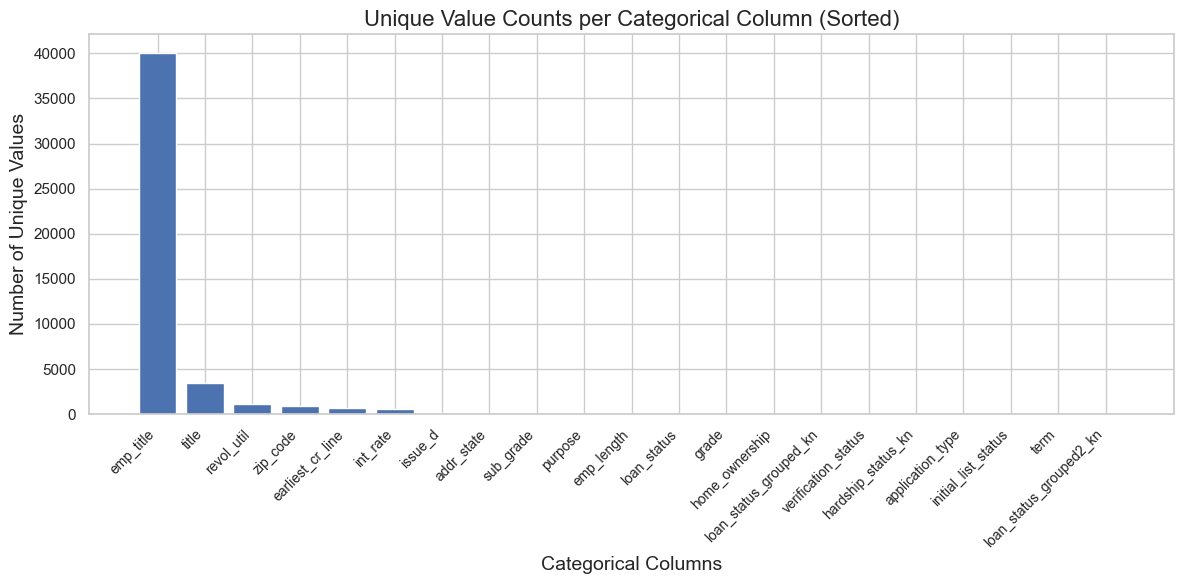

Sorted Unique Value Counts (numerical):
Number of unique values in 'total_pymnt': 92840
Number of unique values in 'total_pymnt_inv': 91836
Number of unique values in 'total_rec_int': 86806
Number of unique values in 'tot_cur_bal': 81168
Number of unique values in 'tot_hi_cred_lim': 76897
Number of unique values in 'total_bal_ex_mort': 64944
Number of unique values in 'total_il_high_credit_limit': 55050
Number of unique values in 'total_rec_prncp': 44924
Number of unique values in 'total_bal_il': 44392
Number of unique values in 'revol_bal': 37407
Number of unique values in 'avg_cur_bal': 34930
Number of unique values in 'bc_open_to_buy': 33138
Number of unique values in 'out_prncp_inv': 32333
Number of unique values in 'out_prncp': 32242
Number of unique values in 'installment': 28510
Number of unique values in 'max_bal_bc': 17470
Number of unique values in 'annual_inc': 8852
Number of unique values in 'dti': 5334
Number of unique values in 'total_rev_hi_lim': 4187
Number of unique va

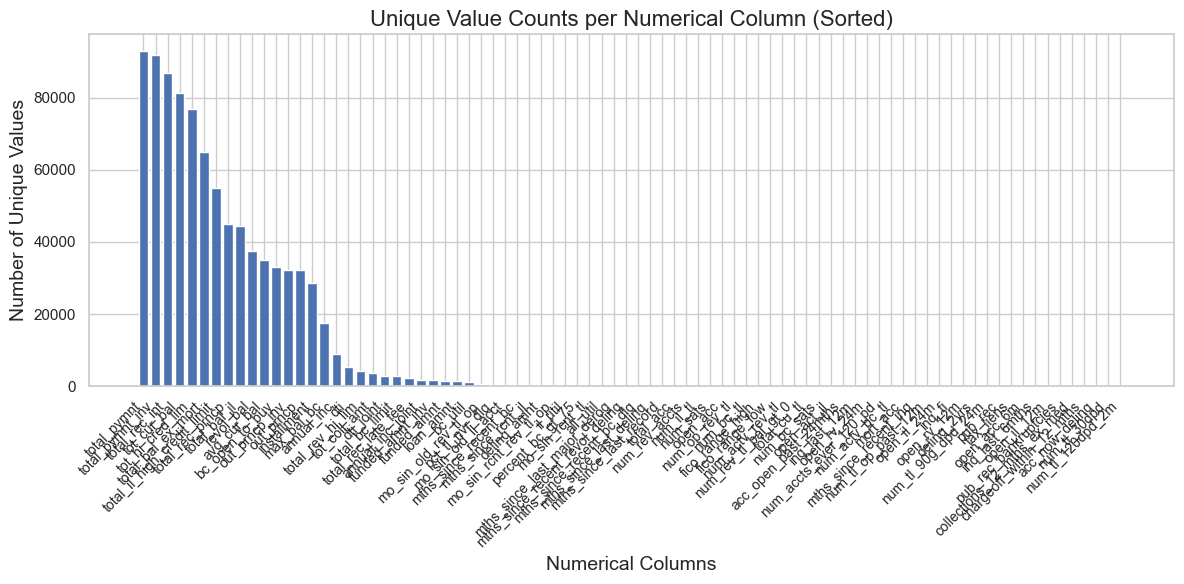

In [257]:
# Loop through each list and analyze unique values
for data_type, columns_list in [('categorical', categorical_list), ('numerical', numerical_list)]: analyze_unique_values(df_dropped, columns_list, data_type)

Straight away we can see `int_rate` (584),`emp_title` (40049), `issue_d` (159),`title` (3454), `revol_util` (1088), `last_pymnt_d` (147), `earliest_cr_line` (667), `sec_app_earliest_cr_line` (506), `last_credit_pull` (137). `zip_code` (878) stand out, we'll remove these as graphically representing these won't produce any meaningful insight. However, we'll see if we can reduce them into logical groupings later on.

It's hard to see the Numerical Columns image, but we can clearly identify that the more interesting data can be extracted from the first 28 numerical values.


Summary Statistics and Analysis for Categorical Column: emp_length


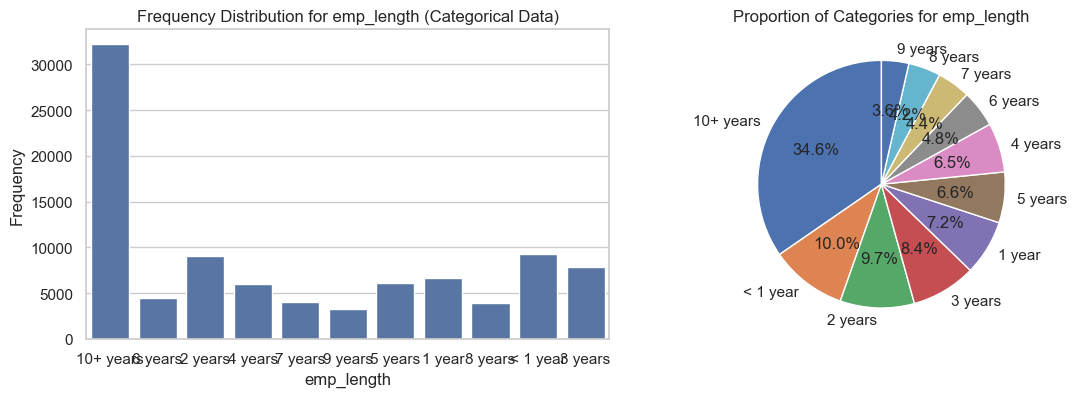


Frequency Table for 'emp_length':
            Count  Percentage
emp_length                   
10+ years   32207   34.612574
< 1 year     9306   10.001075
2 years      9014    9.687265
3 years      7862    8.449221
1 year       6714    7.215476
5 years      6158    6.617947
4 years      6009    6.457818
6 years      4496    4.831811
7 years      4051    4.353573
8 years      3919    4.211714
9 years      3314    3.561526

Summary Statistics and Analysis for Categorical Column: loan_status


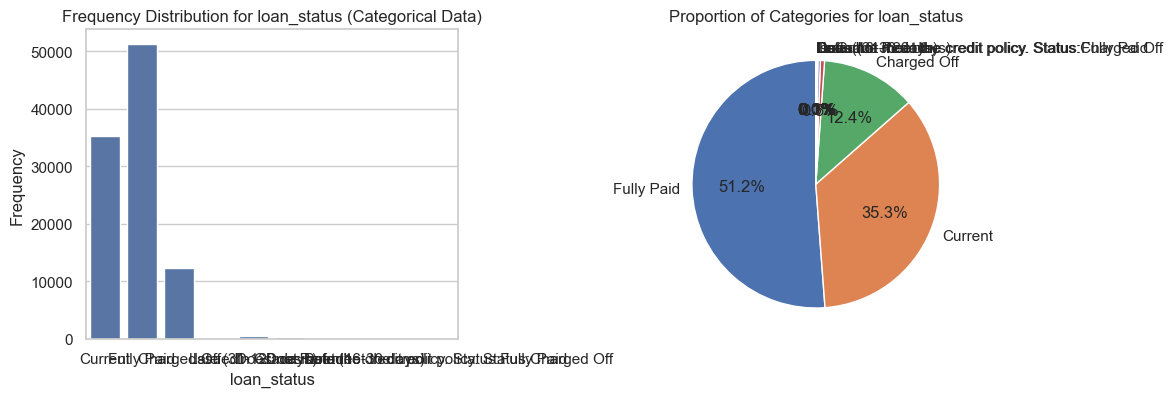


Frequency Table for 'loan_status':
                                                    Count  Percentage
loan_status                                                          
Fully Paid                                          51189      51.189
Current                                             35294      35.294
Charged Off                                         12384      12.384
Late (31-120 days)                                    535       0.535
In Grace Period                                       329       0.329
Late (16-30 days)                                      90       0.090
Does not meet the credit policy. Status:Fully Paid     69       0.069
Issued                                                 63       0.063
Does not meet the credit policy. Status:Charged...     33       0.033
Default                                                14       0.014

Summary Statistics and Analysis for Categorical Column: sub_grade


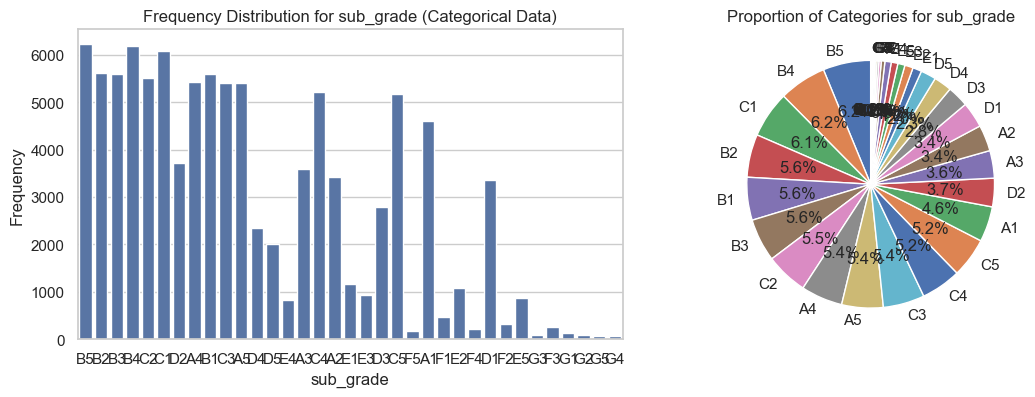


Frequency Table for 'sub_grade':
           Count  Percentage
sub_grade                   
B5          6225       6.225
B4          6187       6.187
C1          6075       6.075
B2          5609       5.609
B1          5599       5.599
B3          5596       5.596
C2          5513       5.513
A4          5426       5.426
A5          5415       5.415
C3          5410       5.410
C4          5223       5.223
C5          5179       5.179
A1          4610       4.610
D2          3720       3.720
A3          3593       3.593
A2          3413       3.413
D1          3358       3.358
D3          2788       2.788
D4          2344       2.344
D5          2002       2.002
E1          1168       1.168
E2          1083       1.083
E3           932       0.932
E5           868       0.868
E4           821       0.821
F1           471       0.471
F2           310       0.310
F3           250       0.250
F4           212       0.212
F5           180       0.180
G1           134       0.134
G2       

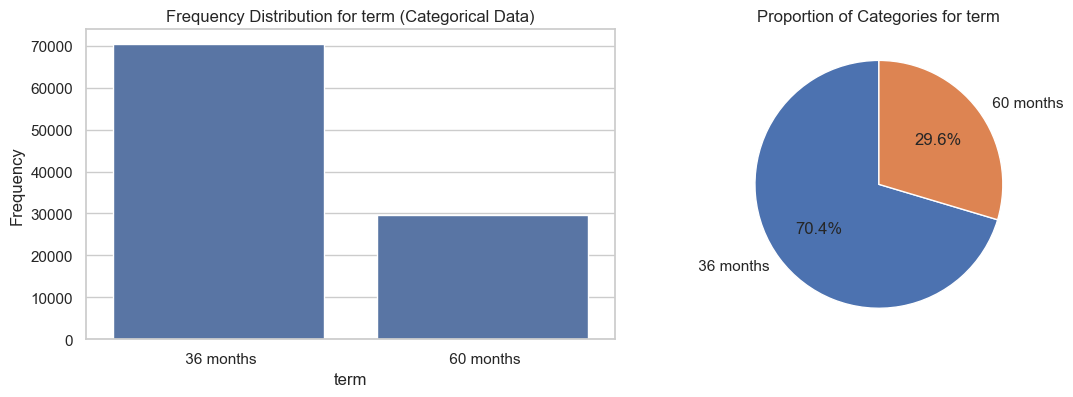


Frequency Table for 'term':
           Count  Percentage
term                        
36 months  70384      70.384
60 months  29616      29.616


In [258]:
exclude_list = ['int_rate', 'zip_code', 'emp_title', 'issue_d', 'title', 'revol_util', 'last_pymnt_d', 'earliest_cr_line', 'sec_app_earliest_cr_line', 'last_credit_pull_d']

# Filter the categorical columns to exclude specified ones
filtered_categorical_columns = [col for col in categorical_list_with_numerical_values if col not in exclude_list]

# Analyze the filtered categorical columns
analyze_categorical_columns(filtered_categorical_columns, df_dropped)

### Handling Object and Float Features

We have identified the following columns that require conversion or encoding:

#### Actions Post-Analysis

##### Convert String to Integer
- **term**: Extract numerical part and convert to integer (keep `36` and `60`).
- **emp_length**: Extract numerical years and convert to integer.

##### Convert String to Float
- **int_rate**: Convert to float after removing any non-numeric characters.
- **revol_util**: Convert to float after removing the "%" symbol.

##### Encode Categorical Values
- **sub_grade**: Use as is or encode if necessary; consider dropping **grade** if redundant.
- **loan_status**: Group or encode based on loan status levels.
- **hardship_loan_status**: Analyze and group similar hardship statuses if logical.

##### Convert to Date/Time Format
- **issue_d**: Convert to date/time for chronological analysis.
- **earliest_cr_line**: Convert to date/time to track the earliest credit history.
- **last_pymnt_d**: Convert to date/time; create separate year and month columns.
- **next_pymnt_d**: Convert to date/time; add year and month columns.
- **last_credit_pull_d**: Convert to date/time for recent credit activity insights.
- **sec_app_earliest_cr_line**: Convert to date/time for secondary applicants’ credit history.
- **hardship_start_date**: Convert to date/time; add year and month columns.
- **hardship_end_date**: Convert to date/time; add year and month columns.
- **payment_plan_start_date**: Convert to date/time; add year and month columns.

##### Remove Non-Analytical or Irrelevant Columns
- **emp_title**: Not relevant for numerical analysis; remove.
- **url**: Non-analytical; remove as it doesn’t contribute to analysis.

##### Evaluate for Categorical Consistency
- **zip_code**: Analyze the first few digits if relevant to extract location-based insights.


In [259]:
print(df_dropped.shape)
print(len(new_features))

(100000, 122)
122


In [260]:
def update_feature_list(original_features, new_features):
    """
    Checks for the existence of original features in a list, 
    removes them, and adds new features.

    Parameters:
    -----------
    original_features : list
        List of original feature names to be removed.
    new_features : list
        List of new feature names to be added.

    Returns:
    --------
    list
        Updated list of features.
    """

    updated_features = original_features.copy()  # Create a copy to avoid modifying the original list

    for feature in original_features:
        if feature in updated_features:
            updated_features.remove(feature)

    updated_features.extend(new_features)
    return updated_features

# Example usage:
#original_features = ['int_rate', 'revol_util'] 
#new_features = ['int_rate_kn', 'revol_util_kn']

#updated_list = update_feature_list(original_features, new_features)
#print(updated_list)  # Output: ['int_rate_kn', 'revol_util_kn']

#### Convert string to integer

In [261]:
import re

# Columns that need to be converted from string to integer
string_columns_to_convert_int = ['term', 'emp_length']  # features to replace with int values

# Convert each specified column to an integer in a new column
for column in string_columns_to_convert_int:
    # Extract numerical part and convert to integer
    df_dropped[f"{column}_kn"] = df_dropped[column].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notnull(x) else None)

In [262]:
df_dropped[['term_kn','emp_length_kn']].head()

term_kn  emp_length_kn
0       36           10.0
1       60            6.0
2       36           10.0
3       60            NaN
4       60           10.0

In [263]:
# List of columns to remove
columns_to_remove = ['term', 'emp_length']

# Remove specified columns from new_features if they exist
new_features = [col for col in new_features if col not in columns_to_remove]

In [264]:
new_features.extend(['term_kn', 'emp_length_kn'])

In [265]:
# Check if the specified columns are in new_features
columns_to_check = string_columns_to_convert_int
missing_columns = [col for col in columns_to_check if col not in new_features]

# Display results
if not missing_columns:
    print("Both columns are in new_features.")
else:
    print(f"The following columns are missing from new_features: {missing_columns}")

The following columns are missing from new_features: ['term', 'emp_length']


In [266]:
print(df_dropped.shape)
print(len(new_features))

(100000, 124)
122


#### Convert string to float

In [267]:
import re

# Define the columns that need to be converted from string to float
string_columns_to_convert_float = ['int_rate', 'revol_util']  # features to replace with float values

# Convert each specified column to a float in a new column as percentage (e.g., 80% becomes 0.80)
for column in string_columns_to_convert_float:
    # Extract numerical part, convert to float, and divide by 100
    df_dropped[f"{column}_kn"] = df_dropped[column].apply(
        lambda x: float(re.search(r'\d+', str(x)).group()) / 100 if pd.notnull(x) else None
    )

In [268]:
df_dropped['int_rate_kn'].head()

0    0.13
1    0.09
2    0.10
3    0.11
4    0.13
Name: int_rate_kn, dtype: float64

In [269]:
new_features.extend(['int_rate_kn', 'revol_util_kn'])

In [270]:
# List of columns to remove
columns_to_remove = ['int_rate', 'revol_util']

# Remove specified columns from new_features if they exist
new_features = [col for col in new_features if col not in columns_to_remove]

In [271]:
# Check if the specified columns are in new_features
columns_to_check = ['int_rate_kn', 'revol_util_kn']
missing_columns = [col for col in columns_to_check if col not in new_features]

# Display results
if not missing_columns:
    print("Both columns are in new_features.")
else:
    print(f"The following columns are missing from new_features: {missing_columns}")

Both columns are in new_features.


In [272]:
print(df_dropped.shape)
print(len(new_features))

(100000, 126)
122


#### Convert date time

In [273]:
df_dropped[['issue_d', 'earliest_cr_line']].head()

issue_d earliest_cr_line
0  Mar-20           Dec-04
1  Feb-16           Jan-04
2  Jan-15           Apr-10
3  Jun-18           Oct-05
4  Jan-18           Apr-08

In [274]:
# List of date columns to convert
date_columns = ['issue_d', 'earliest_cr_line']

# Convert the columns to datetime format
for col in date_columns:
    # Convert to datetime using the format '%b-%y', with errors coerced to NaT
    df_dropped[col] = pd.to_datetime(df_dropped[col], format='%b-%y', errors='coerce')

# Extracting date features for each date column
for col in date_columns:
    # Define new column names for year and month
    year_col = f'{col}_year_kn'
    month_col = f'{col}_month_kn'
       
    # Extract year and month, convert to integer with support for NaNs
    df_dropped[year_col] = df_dropped[col].dt.year.astype('Int64').fillna(0)  # Extract year
    df_dropped[month_col] = df_dropped[col].dt.month.astype('Int64').fillna(0)  # Extract month
    
    # Add the new column names to the existing 'new_features' list
    new_features.extend([year_col, month_col])
    
    # Print the names of the newly created columns
    print(f"New columns created: {year_col}, {month_col}")


New columns created: issue_d_year_kn, issue_d_month_kn
New columns created: earliest_cr_line_year_kn, earliest_cr_line_month_kn


In [275]:
df_dropped[['issue_d', 'earliest_cr_line', 'issue_d_year_kn', 'issue_d_month_kn', 'earliest_cr_line_year_kn', 'earliest_cr_line_month_kn']].head()

issue_d earliest_cr_line  issue_d_year_kn  issue_d_month_kn  \
0 2020-03-01       2004-12-01             2020                 3   
1 2016-02-01       2004-01-01             2016                 2   
2 2015-01-01       2010-04-01             2015                 1   
3 2018-06-01       2005-10-01             2018                 6   
4 2018-01-01       2008-04-01             2018                 1   

   earliest_cr_line_year_kn  earliest_cr_line_month_kn  
0                      2004                         12  
1                      2004                          1  
2                      2010                          4  
3                      2005                         10  
4                      2008                          4

In [276]:
new_features.extend(['issue_d_year_kn', 'issue_d_month_kn','earliest_cr_line_year_kn', 'earliest_cr_line_month_kn'])

In [277]:
# List of columns to remove
columns_to_remove = ['issue_d', 'earliest_cr_line']

# Remove specified columns from new_features if they exist
new_features = [col for col in new_features if col not in columns_to_remove]

In [278]:
# Check if the specified columns are in new_features
columns_to_check = ['issue_d_year_kn', 'issue_d_month_kn','earliest_cr_line_year_kn', 'earliest_cr_line_month_kn']
missing_columns = [col for col in columns_to_check if col not in new_features]

# Display results
if not missing_columns:
    print("All columns are in new_features.")
else:
    print(f"The following columns are missing from new_features: {missing_columns}")

All columns are in new_features.


In [279]:
print(df_dropped.shape)
print(len(new_features))

(100000, 130)
128


In [280]:
new_features

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'dti_joint',
 'emp_title',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_

In [281]:
# Get the set of columns in df_dropped
df_dropped_columns = set(df_dropped.columns)

# Convert new_features to a set for comparison
new_features_set = set(new_features)

# Find columns in new_features that are missing in df_dropped
missing_in_df_dropped = new_features_set - df_dropped_columns

# Find columns in df_dropped that are not in new_features (if relevant)
extra_in_df_dropped = df_dropped_columns - new_features_set

# Print the results
print("Features in new_features missing from df_dropped:", missing_in_df_dropped)
print("Columns in df_dropped not listed in new_features:", extra_in_df_dropped)

Features in new_features missing from df_dropped: set()
Columns in df_dropped not listed in new_features: {'revol_util', 'term', 'int_rate', 'issue_d', 'emp_length', 'earliest_cr_line'}


#### Remove Non Analytical or Irrelevent columns

I'm tempted to leave these in as it could be a good indicator of good or bad payment trends but won't have the time to do it for now we'll remove them.

In [282]:
# List of columns to remove
columns_to_remove = ['zip_code', 'emp_title']

# Remove specified columns from new_features if they exist
new_features = [col for col in new_features if col not in columns_to_remove]

In [283]:
# sense check
print(df_dropped.shape)
print(len(new_features))

(100000, 130)
126


#### Creating logical groups 

- **hardship_reason**: Analyse and group to simplify analysis (import from df)

In [284]:
# Define the logical groupings for 'hardship_reason'
hardship_reason_groupings = {
    'INCOMECURT': 'Income Loss',
    'UNEMPLOYED': 'Income Loss',
    'UNEMPLOYMENT': 'Income Loss',
    'INCOME_CURTAILMENT': 'Income Loss',
    'REDCDHOURS': 'Income Loss',
    'REDUCED_HOURS': 'Income Loss',
    'FURLOUGH': 'Income Loss',
    'MEDICAL': 'Health Issues',
    'DISABILITY': 'Health Issues',
    'NATURAL_DISASTER': 'External Events',
    'NATDISAST': 'External Events',
    'FINANCIAL': 'Financial Strain',
    'EXCESSIVE_OBLIGATIONS': 'Financial Strain',
    'EXCESSOBLI': 'Financial Strain',
    'DIVORCE': 'Family Circumstances',
    'FAMILY_DEATH': 'Family Circumstances',
    'DEATH': 'Family Circumstances'
}

# Apply the grouping to the 'hardship_reason' column
df_dropped['hardship_reason_grouped_kn'] = df['hardship_reason'].replace(hardship_reason_groupings) # adding this back into our data set

# Verify the groupings
print(df_dropped['hardship_reason_grouped_kn'].value_counts())


hardship_reason_grouped_kn
Income Loss             4490
Financial Strain         168
Health Issues            116
External Events          101
Family Circumstances      20
Name: count, dtype: int64


In [285]:
# Define the logical groupings for 'loan_status'
loan_status_groupings = {
    'Fully Paid': 'Completed',
    'Current': 'In Progress',
    'Charged Off': 'Defaulted',
    'Late (31-120 days)': 'Late',
    'In Grace Period': 'Late',
    'Late (16-30 days)': 'Late',
    'Does not meet the credit policy. Status:Fully Paid': 'Completed',
    'Issued': 'In Progress',
    'Does not meet the credit policy. Status:Charged Off': 'Defaulted',
    'Default': 'Defaulted'
}

# Apply the grouping to the 'loan_status' column
df_dropped['loan_status_grouped_kn'] = df['loan_status'].replace(loan_status_groupings)

# Verify the groupings
print(df_dropped['loan_status_grouped_kn'].value_counts())

loan_status_grouped_kn
Completed      51258
In Progress    35357
Defaulted      12431
Late             954
Name: count, dtype: int64


In [286]:
# Replace 'Any', 'Other', and 'none' with a unified value 'Other'
df_dropped['home_ownership_grouped_kn'] = df_dropped['home_ownership'].replace(['ANY', 'OTHER', 'NONE'], 'OTHER')

# Display the updated DataFrame to verify
df_dropped['home_ownership_grouped_kn'].value_counts()

home_ownership_grouped_kn
MORTGAGE    49149
RENT        39472
OWN         11238
OTHER         141
Name: count, dtype: int64

In [287]:
new_features.extend(['hardship_reason_grouped_kn', 'loan_status_grouped_kn','home_ownership_grouped_kn'])

In [288]:
# Define a list of columns to be removed
# these are all the columns we've altered. These can remain in the data frame but should be removed from our feature list
columns_to_remove = ['hardship_reason', 'loan_status','home_ownership']

# Remove specified columns from new_features if they exist
new_features = [col for col in new_features if col not in columns_to_remove]

In [289]:
# Check if the specified columns are in new_features
columns_to_check = ['hardship_reason_grouped_kn', 'loan_status_grouped_kn','home_ownership_grouped_kn']
missing_columns = [col for col in columns_to_check if col not in new_features]

# Display results
if not missing_columns:
    print("Both columns are in new_features.")
else:
    print(f"The following columns are missing from new_features: {missing_columns}")

Both columns are in new_features.


In [290]:
print(df_dropped.shape)
print(len(new_features))

(100000, 132)
127


## Boolean EDA

Let's review our categorical short listed data.


Summary Statistics and Analysis for Boolean Column: earliest_cr_line_missing_clean_kn


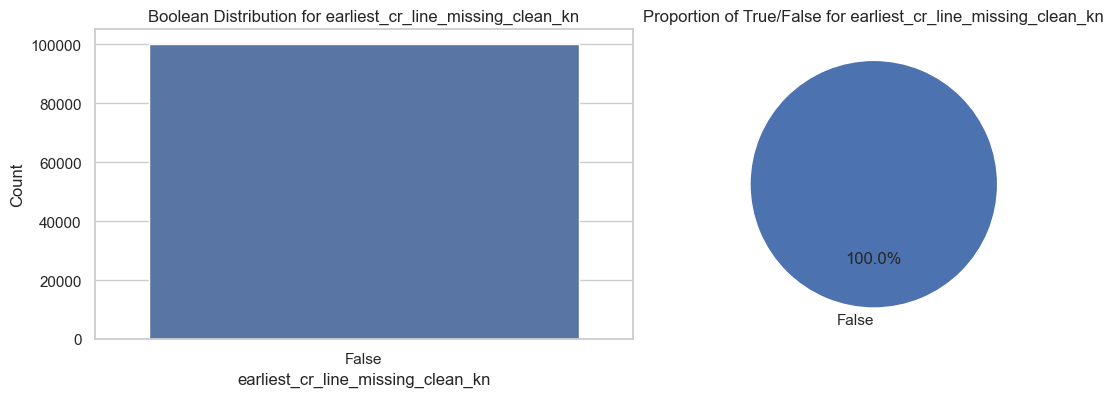


Summary for Boolean 'earliest_cr_line_missing_clean_kn':
Count of True: 0
Count of False: 100000
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: fico_range_high_missing_clean_kn


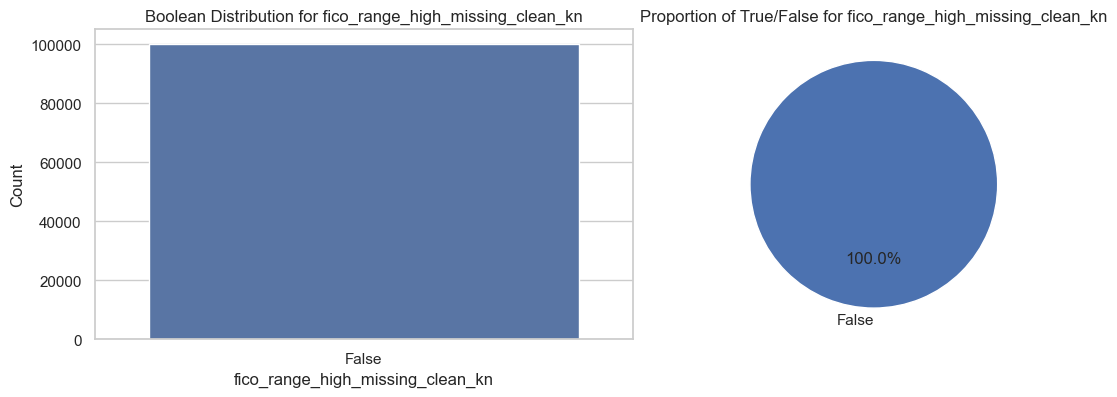


Summary for Boolean 'fico_range_high_missing_clean_kn':
Count of True: 0
Count of False: 100000
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: fico_range_low_missing_clean_kn


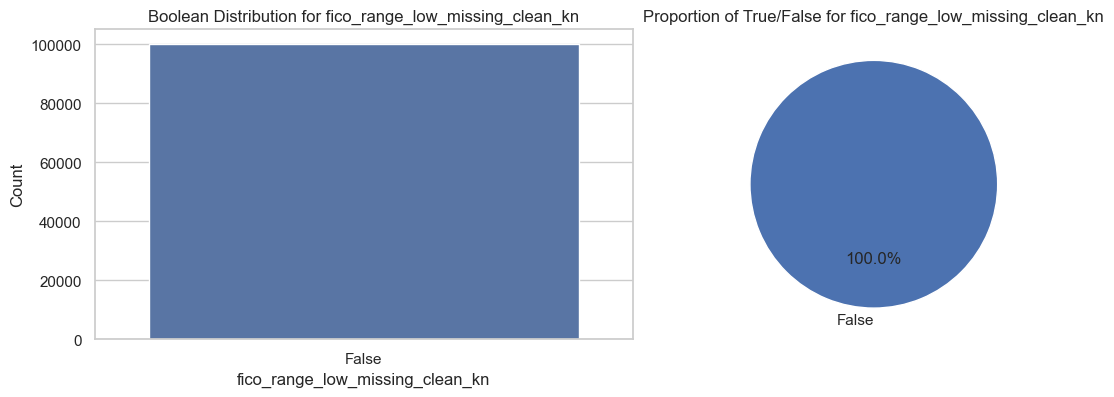


Summary for Boolean 'fico_range_low_missing_clean_kn':
Count of True: 0
Count of False: 100000
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: last_fico_range_high_missing_clean_kn


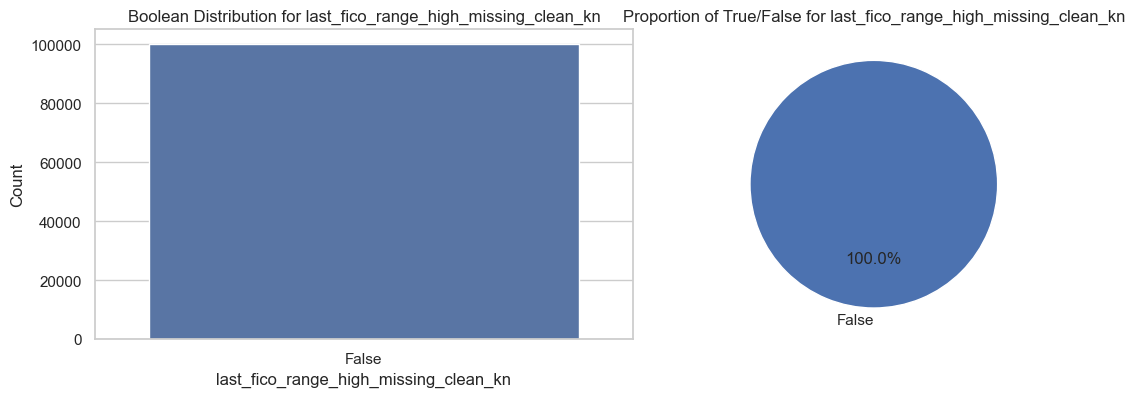


Summary for Boolean 'last_fico_range_high_missing_clean_kn':
Count of True: 0
Count of False: 100000
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: last_fico_range_low_missing_clean_kn


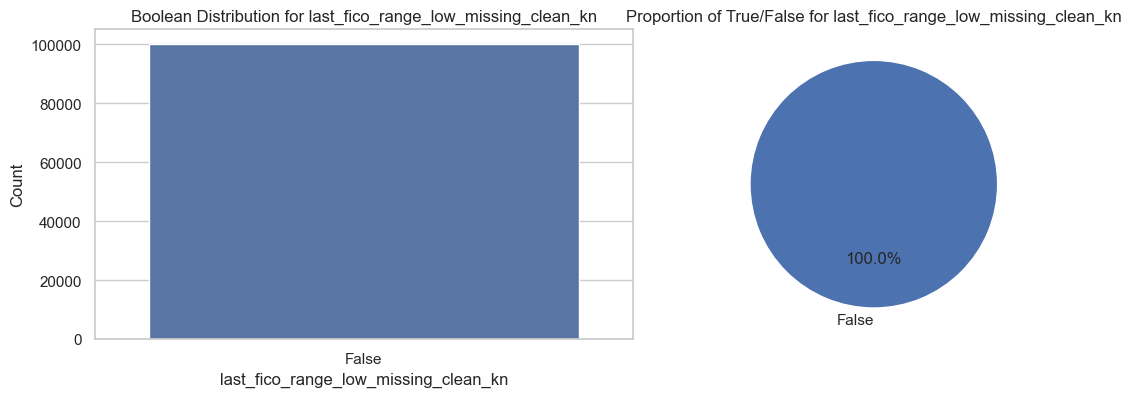


Summary for Boolean 'last_fico_range_low_missing_clean_kn':
Count of True: 0
Count of False: 100000
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: mo_sin_old_il_acct_missing_clean_kn


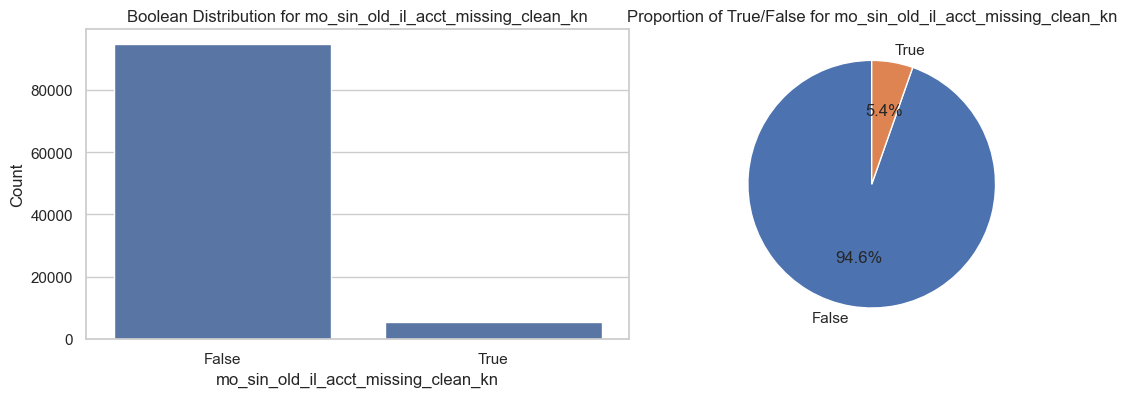


Summary for Boolean 'mo_sin_old_il_acct_missing_clean_kn':
Count of True: 5373
Count of False: 94627
Percentage of True: 5.37%

Summary Statistics and Analysis for Boolean Column: mo_sin_old_rev_tl_op_missing_clean_kn


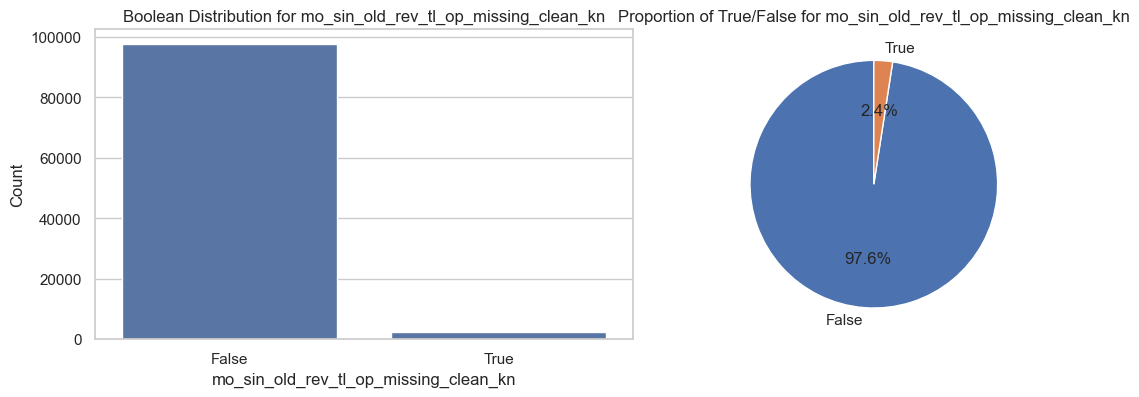


Summary for Boolean 'mo_sin_old_rev_tl_op_missing_clean_kn':
Count of True: 2438
Count of False: 97562
Percentage of True: 2.44%

Summary Statistics and Analysis for Boolean Column: num_accts_ever_120_pd_missing_clean_kn


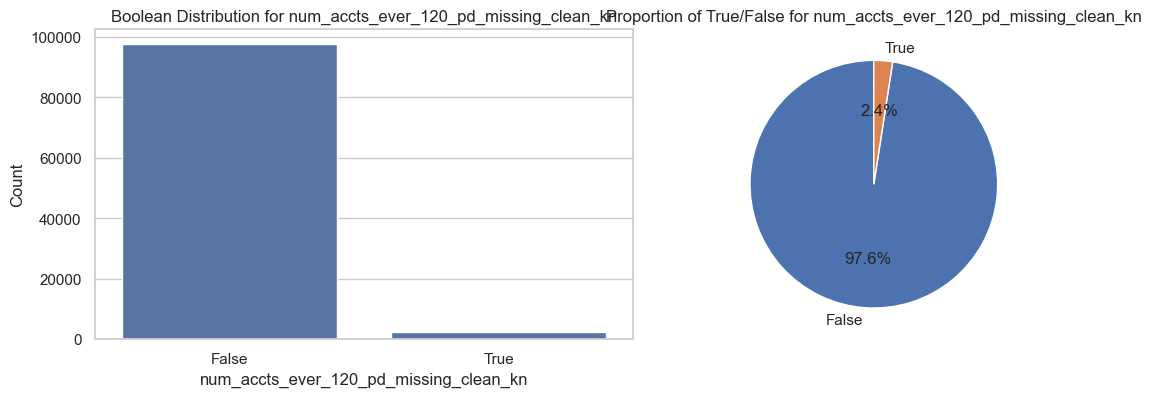


Summary for Boolean 'num_accts_ever_120_pd_missing_clean_kn':
Count of True: 2438
Count of False: 97562
Percentage of True: 2.44%

Summary Statistics and Analysis for Boolean Column: num_tl_120dpd_2m_missing_clean_kn


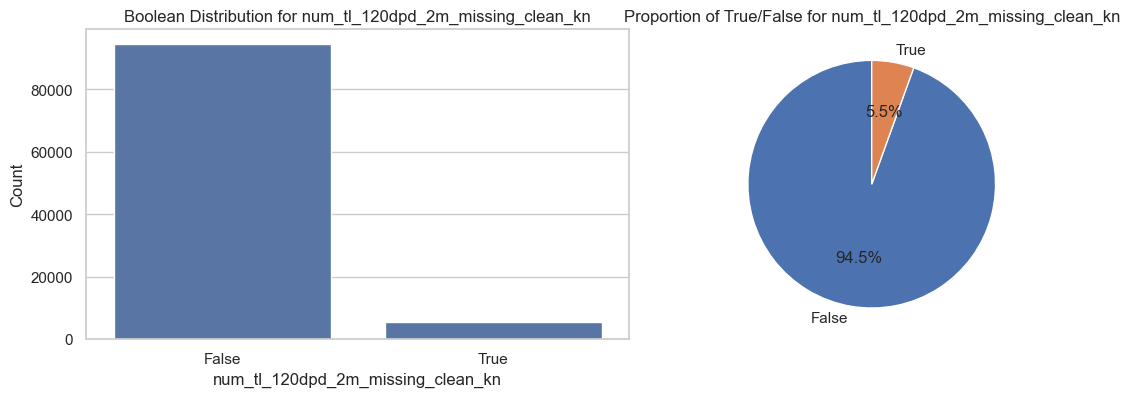


Summary for Boolean 'num_tl_120dpd_2m_missing_clean_kn':
Count of True: 5512
Count of False: 94488
Percentage of True: 5.51%

Summary Statistics and Analysis for Boolean Column: pub_rec_missing_clean_kn


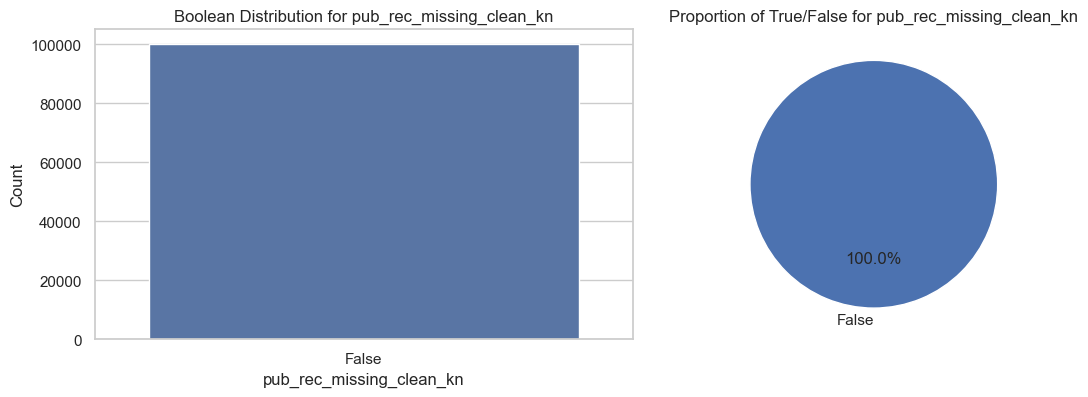


Summary for Boolean 'pub_rec_missing_clean_kn':
Count of True: 0
Count of False: 100000
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: pub_rec_bankruptcies_missing_clean_kn


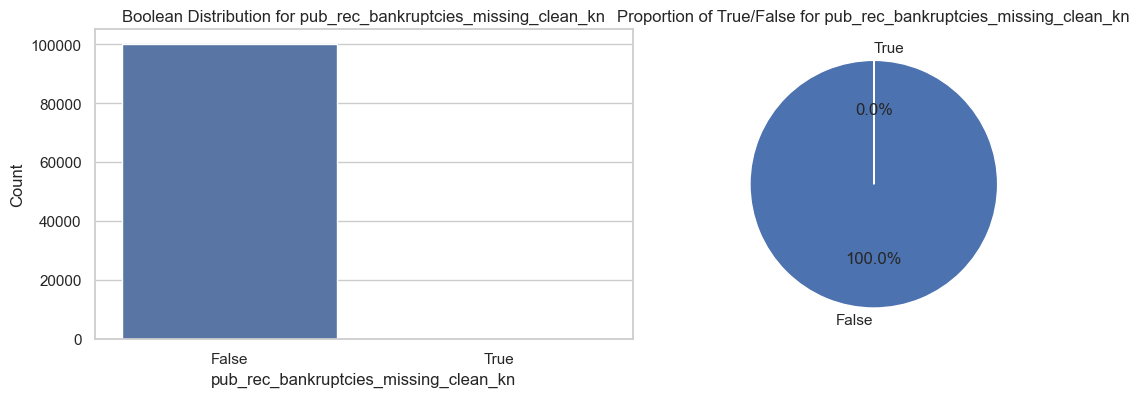


Summary for Boolean 'pub_rec_bankruptcies_missing_clean_kn':
Count of True: 45
Count of False: 99955
Percentage of True: 0.04%

Summary Statistics and Analysis for Boolean Column: emp_length_missing_clean_kn


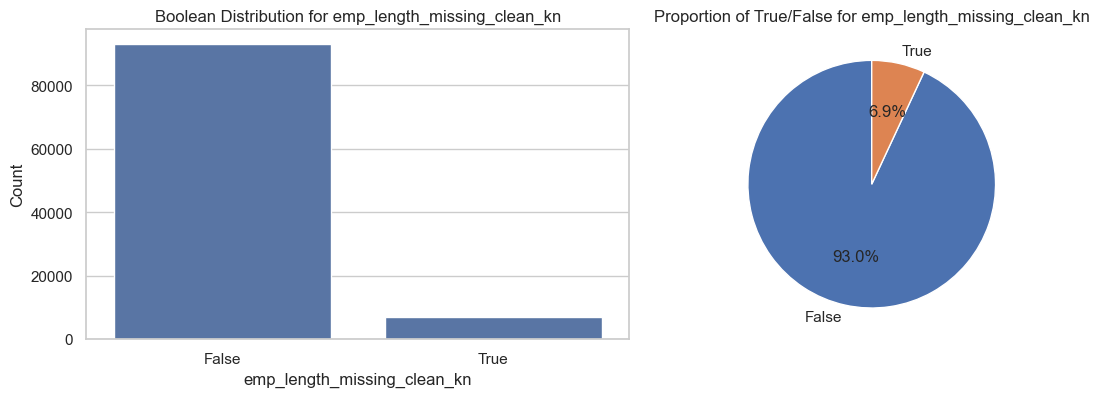


Summary for Boolean 'emp_length_missing_clean_kn':
Count of True: 6950
Count of False: 93050
Percentage of True: 6.95%

Summary Statistics and Analysis for Boolean Column: emp_title_missing_clean_kn


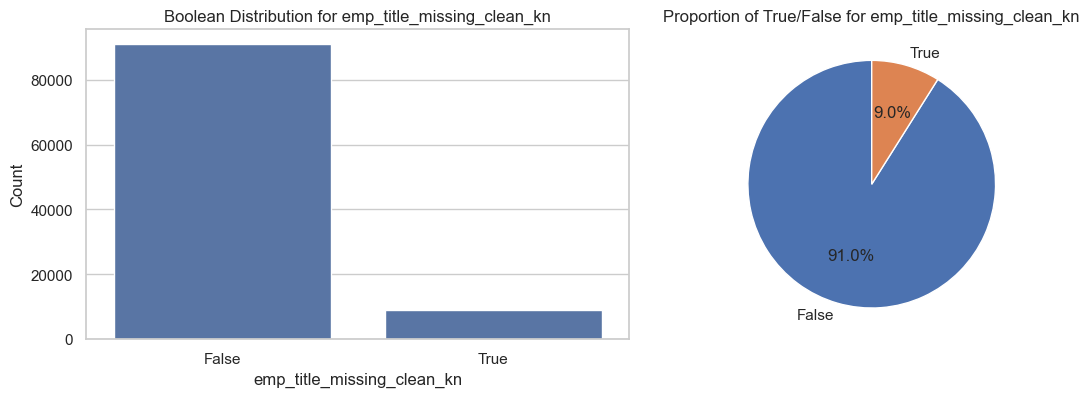


Summary for Boolean 'emp_title_missing_clean_kn':
Count of True: 8954
Count of False: 91046
Percentage of True: 8.95%

Summary Statistics and Analysis for Boolean Column: annual_inc_missing_clean_kn


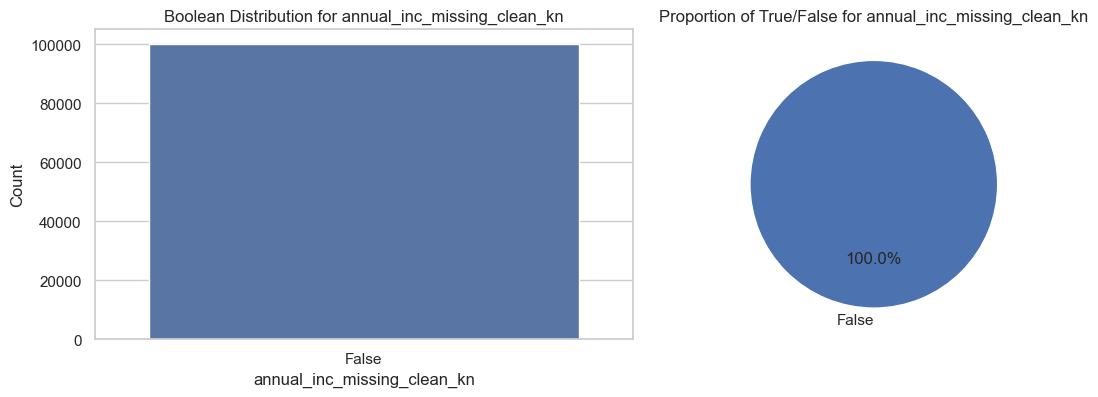


Summary for Boolean 'annual_inc_missing_clean_kn':
Count of True: 0
Count of False: 100000
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: annual_inc_joint_missing_clean_kn


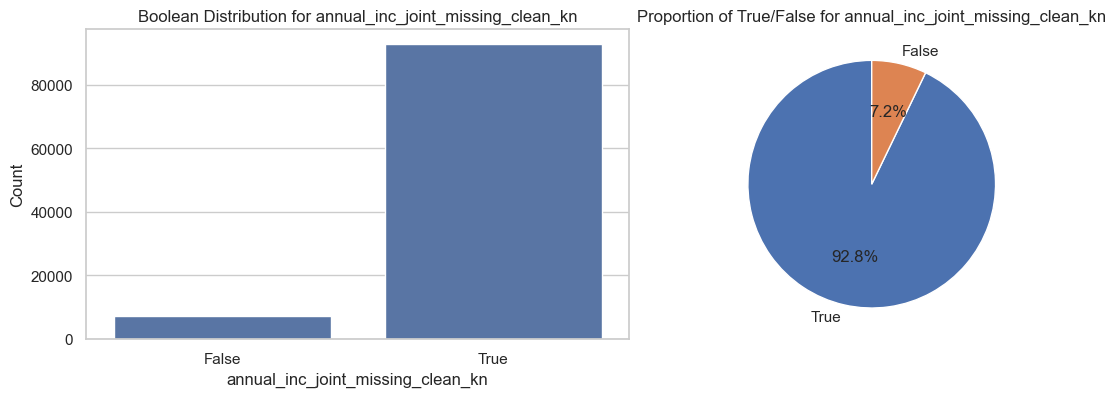


Summary for Boolean 'annual_inc_joint_missing_clean_kn':
Count of True: 92834
Count of False: 7166
Percentage of True: 92.83%

Summary Statistics and Analysis for Boolean Column: inq_fi_missing_clean_kn


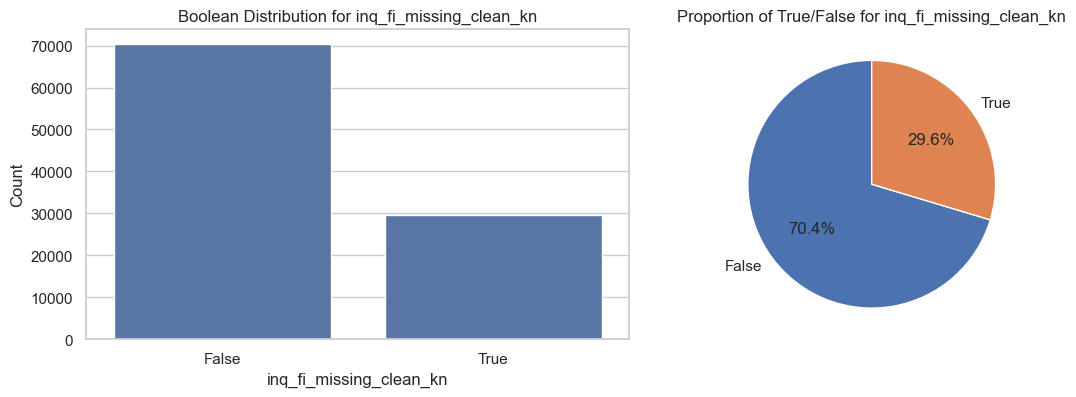


Summary for Boolean 'inq_fi_missing_clean_kn':
Count of True: 29644
Count of False: 70356
Percentage of True: 29.64%

Summary Statistics and Analysis for Boolean Column: inq_last_12m_missing_clean_kn


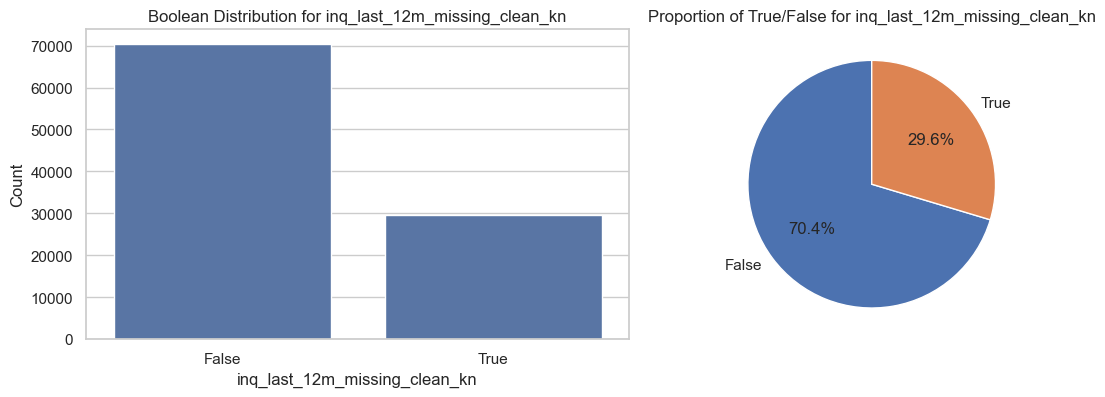


Summary for Boolean 'inq_last_12m_missing_clean_kn':
Count of True: 29644
Count of False: 70356
Percentage of True: 29.64%

Summary Statistics and Analysis for Boolean Column: inq_last_6mths_missing_clean_kn


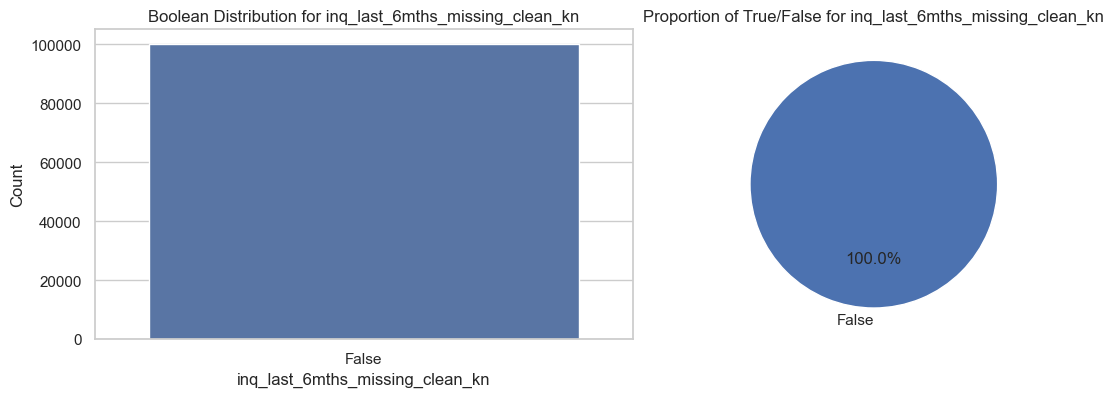


Summary for Boolean 'inq_last_6mths_missing_clean_kn':
Count of True: 0
Count of False: 100000
Percentage of True: 0.00%

Summary Statistics and Analysis for Boolean Column: num_tl_op_past_12m_missing_clean_kn


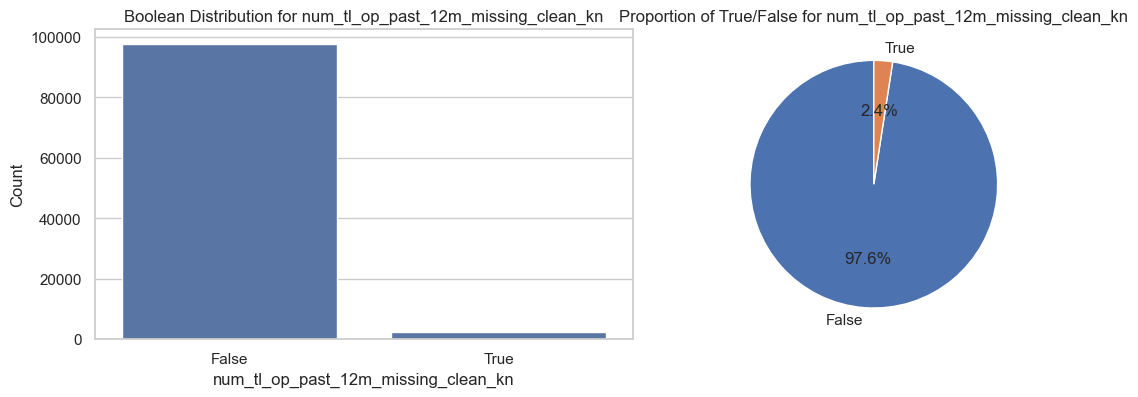


Summary for Boolean 'num_tl_op_past_12m_missing_clean_kn':
Count of True: 2438
Count of False: 97562
Percentage of True: 2.44%


In [292]:
analyze_boolean_columns(boolean_list, df_dropped)

In [293]:
# List of columns to check for missing values
columns_to_check = [
    'earliest_cr_line', 'fico_range_high', 
    'fico_range_low', 'last_fico_range_high', 
    'last_fico_range_low', 'pub_rec', 
    'pub_rec_bankruptcies', 'annual_inc', 
    'inq_last_6mths'
]

# Check for missing values in each specified column and display the count
for column in columns_to_check:
    missing_count = df[column].isnull().sum() # checking against original data if 0 we can remove these from our ML feature list
    print(f"Missing values in '{column}': {missing_count}")

Missing values in 'earliest_cr_line': 0
Missing values in 'fico_range_high': 0
Missing values in 'fico_range_low': 0
Missing values in 'last_fico_range_high': 0
Missing values in 'last_fico_range_low': 0
Missing values in 'pub_rec': 0
Missing values in 'pub_rec_bankruptcies': 45
Missing values in 'annual_inc': 0
Missing values in 'inq_last_6mths': 0


After reviewing our output I've decided to drop the following values as their representation within the data set is not meaningful enought to be any statistical significance.

In [294]:
# Original list of columns to remove
columns_to_remove = [
    'earliest_cr_line_missing_clean_kn', 'fico_range_high_missing_clean_kn', 
    'fico_range_low_missing_clean_kn', 'last_fico_range_high_missing_clean_kn', 
    'last_fico_range_low_missing_clean_kn', 'pub_rec_missing_clean_kn', 
    'annual_inc_missing_clean_kn', 'inq_last_6mths_missing_clean_kn'
]

# Create a new list by excluding the columns in columns_to_remove
new_features_updated = [col for col in new_features if col not in columns_to_remove]

In [295]:
df_dropped['loan_status_grouped_kn'].value_counts()

loan_status_grouped_kn
Completed      51258
In Progress    35357
Defaulted      12431
Late             954
Name: count, dtype: int64

Let's take a look at our numerical data. We've reduced our list to analyse with a focus on the numerical features with the most varience.

Here we're trying to determine how to handle the numerical values.

**Capping**: Replace all values above the upper IQR value with the upper IQR value.

**Transformation**: Transform the data data using Test log and square root transformations.

**Removal**: Data removal being careful to ensure the total feature size still represents the overall feature set.


Summary Statistics and Analysis for Numeric Column: total_pymnt


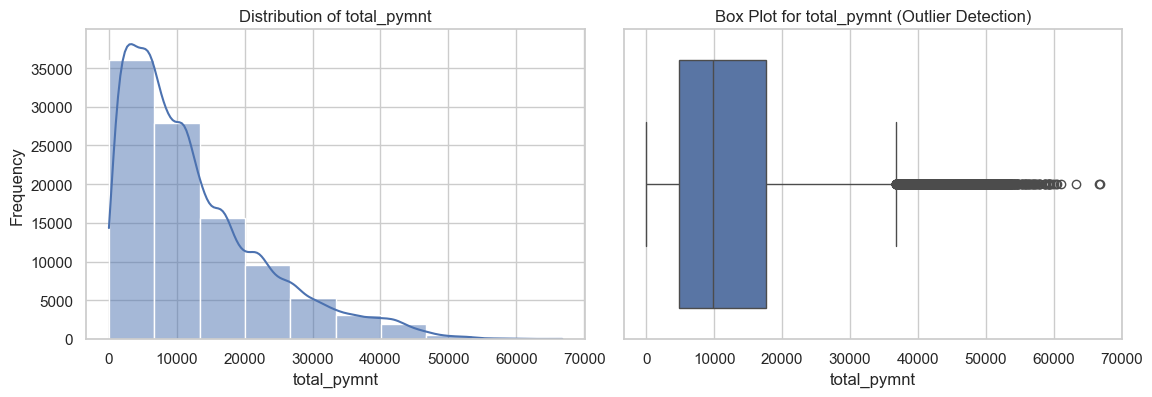


Summary Statistics for Numeric  'total_pymnt':
count    100000.000000
mean      12559.494957
std       10337.364917
min           0.000000
25%        4744.560000
50%        9767.650000
75%       17567.367503
max       66775.524270
Name: total_pymnt, dtype: float64

Interquartile Range (IQR): 12822.8075
Lower Bound for Outliers (IQR method): -14489.6513
Upper Bound for Outliers (IQR method): 36801.5788
Number of Outliers (IQR method): 3853

Z-score Summary:
count    1.000000e+05
mean     1.456613e-17
std      1.000000e+00
min     -1.214961e+00
25%     -7.559891e-01
50%     -2.700732e-01
75%      4.844438e-01
max      5.244666e+00
Name: total_pymnt, dtype: float64

Number of Outliers (Z-score method): 1189

Skewness: 1.2437

Normality Tests:
D'Agostino's K^2 Test: Statistic=18786.4892, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.8872, p-value=0.0000
Anderson-Darling Test: Statistic=3217.6853

Summary Statistics and Analysis for Numeric Column: total_pymnt_inv


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


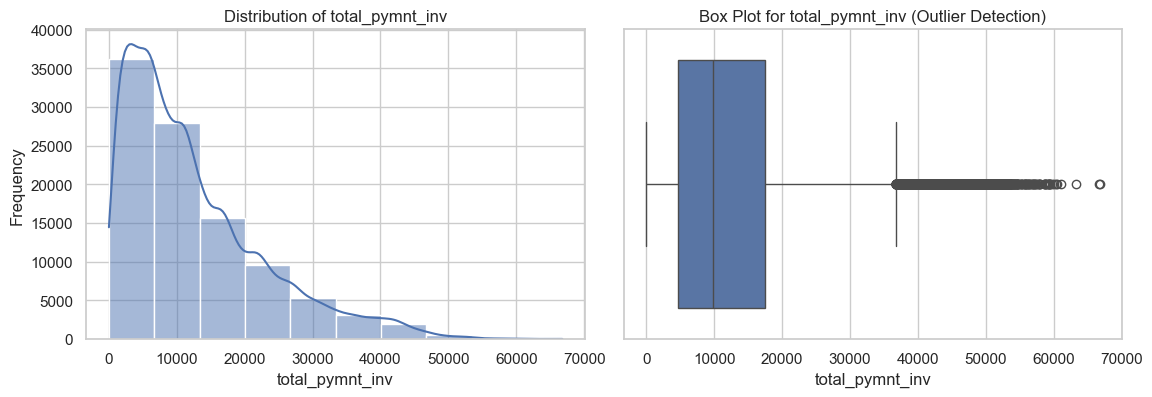


Summary Statistics for Numeric  'total_pymnt_inv':
count    100000.000000
mean      12544.530188
std       10333.630505
min           0.000000
25%        4732.010000
50%        9751.745000
75%       17540.212500
max       66775.520000
Name: total_pymnt_inv, dtype: float64

Interquartile Range (IQR): 12808.2025
Lower Bound for Outliers (IQR method): -14480.2937
Upper Bound for Outliers (IQR method): 36752.5162
Number of Outliers (IQR method): 3857

Z-score Summary:
count    1.000000e+05
mean    -2.984279e-18
std      1.000000e+00
min     -1.213952e+00
25%     -7.560286e-01
50%     -2.702618e-01
75%      4.834392e-01
max      5.248009e+00
Name: total_pymnt_inv, dtype: float64

Number of Outliers (Z-score method): 1184

Skewness: 1.2442

Normality Tests:
D'Agostino's K^2 Test: Statistic=18800.1452, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.8871, p-value=0.0000
Anderson-Darling Test: Statistic=3221.5504

Summary Statistics and Analysis for Numeric Column: total_rec_int


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


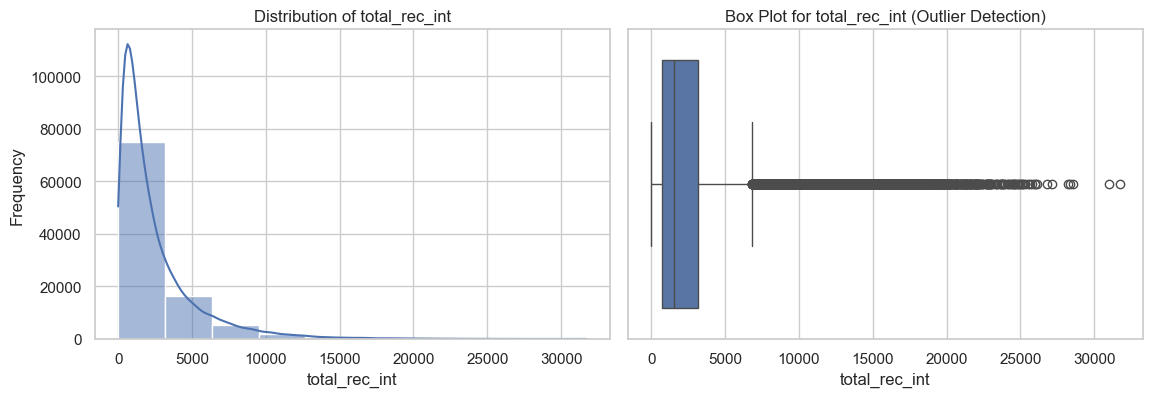


Summary Statistics for Numeric  'total_rec_int':
count    100000.000000
mean       2479.307829
std        2766.019201
min           0.000000
25%         724.002500
50%        1537.715000
75%        3175.680000
max       31714.370000
Name: total_rec_int, dtype: float64

Interquartile Range (IQR): 2451.6775
Lower Bound for Outliers (IQR method): -2953.5137
Upper Bound for Outliers (IQR method): 6853.1962
Number of Outliers (IQR method): 7328

Z-score Summary:
count    1.000000e+05
mean    -5.321965e-17
std      1.000000e+00
min     -8.963451e-01
25%     -6.345962e-01
50%     -3.404144e-01
75%      2.517597e-01
max      1.056936e+01
Name: total_rec_int, dtype: float64

Number of Outliers (Z-score method): 2130

Skewness: 2.5728

Normality Tests:
D'Agostino's K^2 Test: Statistic=55501.0571, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7412, p-value=0.0000
Anderson-Darling Test: Statistic=6998.5658

Summary Statistics and Analysis for Numeric Column: tot_cur_bal


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


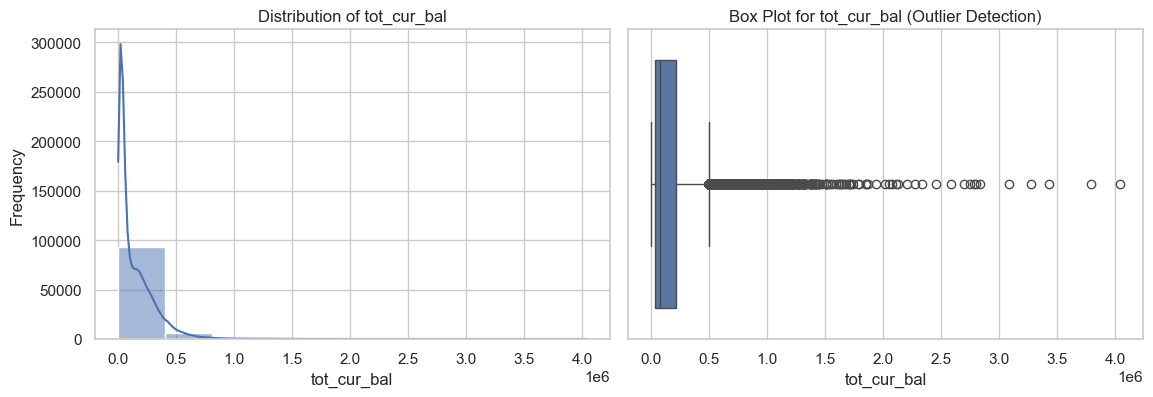


Summary Statistics for Numeric  'tot_cur_bal':
count    1.000000e+05
mean     1.423687e+05
std      1.639914e+05
min      0.000000e+00
25%      2.773300e+04
50%      7.609050e+04
75%      2.142060e+05
max      4.035706e+06
Name: tot_cur_bal, dtype: float64

Interquartile Range (IQR): 186473.0000
Lower Bound for Outliers (IQR method): -251976.5000
Upper Bound for Outliers (IQR method): 493915.5000
Number of Outliers (IQR method): 3688

Z-score Summary:
count    1.000000e+05
mean    -5.542233e-18
std      1.000000e+00
min     -8.681471e-01
25%     -6.990347e-01
50%     -4.041565e-01
75%      4.380552e-01
max      2.374110e+01
Name: tot_cur_bal, dtype: float64

Number of Outliers (Z-score method): 1485

Skewness: 2.8250

Normality Tests:
D'Agostino's K^2 Test: Statistic=67750.3935, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7646, p-value=0.0000
Anderson-Darling Test: Statistic=5799.2345

Summary Statistics and Analysis for Numeric Column: tot_hi_cred_lim


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


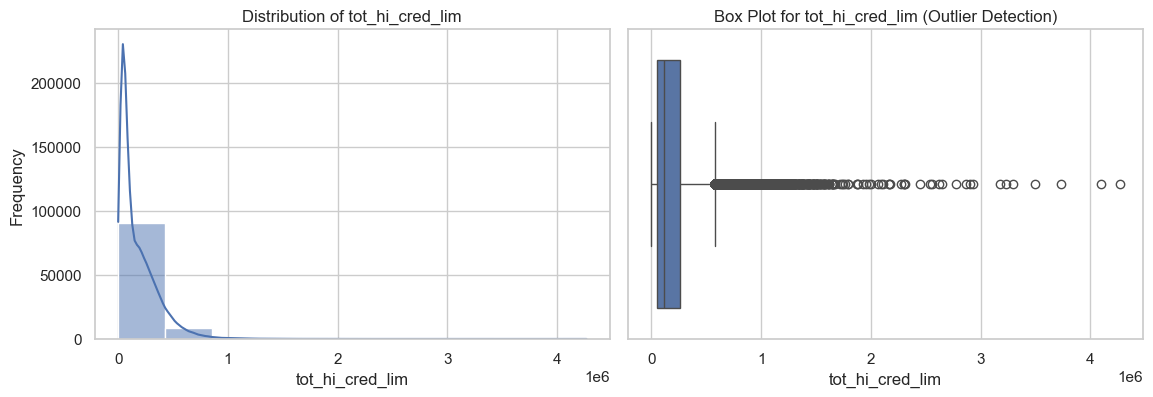


Summary Statistics for Numeric  'tot_hi_cred_lim':
count    1.000000e+05
mean     1.793653e+05
std      1.840327e+05
min      0.000000e+00
25%      4.976700e+04
50%      1.130405e+05
75%      2.612388e+05
max      4.265968e+06
Name: tot_hi_cred_lim, dtype: float64

Interquartile Range (IQR): 211471.7500
Lower Bound for Outliers (IQR method): -267440.6250
Upper Bound for Outliers (IQR method): 578446.3750
Number of Outliers (IQR method): 3556

Z-score Summary:
count    1.000000e+05
mean     5.968559e-17
std      1.000000e+00
min     -9.746385e-01
25%     -7.042137e-01
50%     -3.603970e-01
75%      4.448852e-01
max      2.220585e+01
Name: tot_hi_cred_lim, dtype: float64

Number of Outliers (Z-score method): 1448

Skewness: 2.6805

Normality Tests:
D'Agostino's K^2 Test: Statistic=64345.0579, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7891, p-value=0.0000
Anderson-Darling Test: Statistic=4862.5437

Summary Statistics and Analysis for Numeric Column: total_bal_ex_mort


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


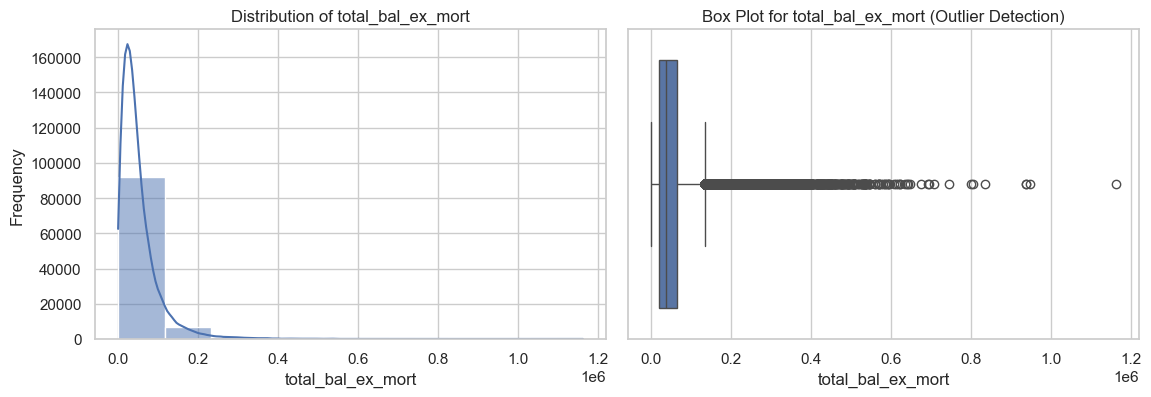


Summary Statistics for Numeric  'total_bal_ex_mort':
count    1.000000e+05
mean     5.185287e+04
std      5.173992e+04
min      0.000000e+00
25%      2.045100e+04
50%      3.826150e+04
75%      6.575850e+04
max      1.162942e+06
Name: total_bal_ex_mort, dtype: float64

Interquartile Range (IQR): 45307.5000
Lower Bound for Outliers (IQR method): -47510.2500
Upper Bound for Outliers (IQR method): 133719.7500
Number of Outliers (IQR method): 5945

Z-score Summary:
count    1.000000e+05
mean     2.589928e-17
std      1.000000e+00
min     -1.002183e+00
25%     -6.069176e-01
50%     -2.626863e-01
75%      2.687602e-01
max      2.147450e+01
Name: total_bal_ex_mort, dtype: float64

Number of Outliers (Z-score method): 1867

Skewness: 3.3879

Normality Tests:
D'Agostino's K^2 Test: Statistic=75829.8081, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7319, p-value=0.0000
Anderson-Darling Test: Statistic=5638.6074

Summary Statistics and Analysis for Numeric Column: total_il_high_credit_limit


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


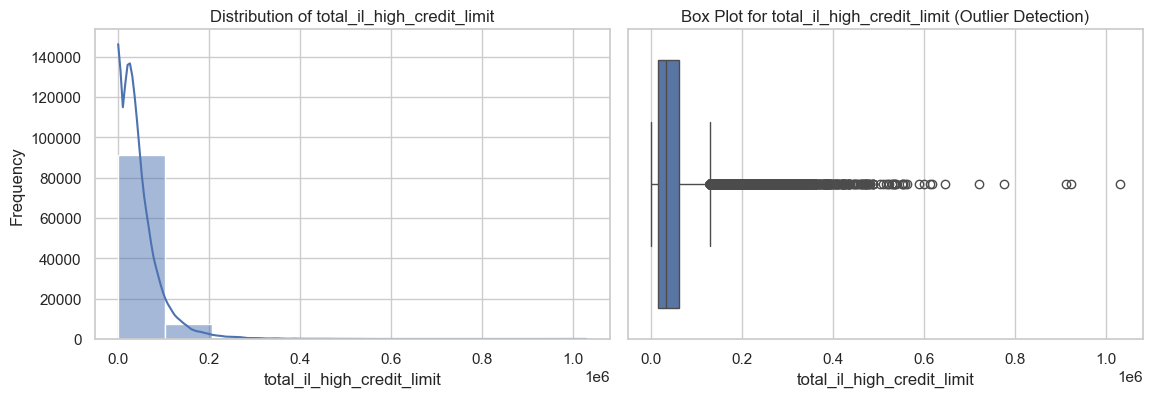


Summary Statistics for Numeric  'total_il_high_credit_limit':
count    1.000000e+05
mean     4.450103e+04
std      4.689064e+04
min      0.000000e+00
25%      1.430775e+04
50%      3.306300e+04
75%      6.021225e+04
max      1.029490e+06
Name: total_il_high_credit_limit, dtype: float64

Interquartile Range (IQR): 45904.5000
Lower Bound for Outliers (IQR method): -54549.0000
Upper Bound for Outliers (IQR method): 129069.0000
Number of Outliers (IQR method): 5105

Z-score Summary:
count    1.000000e+05
mean    -5.925926e-17
std      1.000000e+00
min     -9.490387e-01
25%     -6.439085e-01
50%     -2.439300e-01
75%      3.350609e-01
max      2.100609e+01
Name: total_il_high_credit_limit, dtype: float64

Number of Outliers (Z-score method): 1812

Skewness: 2.8648

Normality Tests:
D'Agostino's K^2 Test: Statistic=66058.8470, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7770, p-value=0.0000
Anderson-Darling Test: Statistic=4399.2413

Summary Statistics and Analysis for Numeric Column: tot

c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


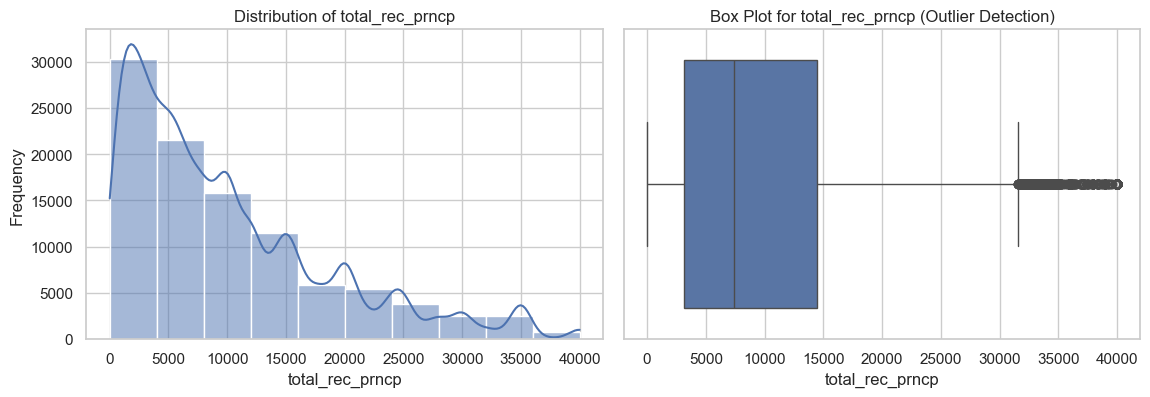


Summary Statistics for Numeric  'total_rec_prncp':
count    100000.000000
mean       9911.414064
std        8669.887647
min           0.000000
25%        3113.807500
50%        7415.485000
75%       14500.000000
max       40000.000000
Name: total_rec_prncp, dtype: float64

Interquartile Range (IQR): 11386.1925
Lower Bound for Outliers (IQR method): -13965.4813
Upper Bound for Outliers (IQR method): 31579.2887
Number of Outliers (IQR method): 3256

Z-score Summary:
count    1.000000e+05
mean    -6.103562e-17
std      1.000000e+00
min     -1.143200e+00
25%     -7.840478e-01
50%     -2.878848e-01
75%      5.292555e-01
max      3.470470e+00
Name: total_rec_prncp, dtype: float64

Number of Outliers (Z-score method): 709

Skewness: 1.2256

Normality Tests:
D'Agostino's K^2 Test: Statistic=17851.2055, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.8778, p-value=0.0000
Anderson-Darling Test: Statistic=3568.5385

Summary Statistics and Analysis for Numeric Column: total_bal_il


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


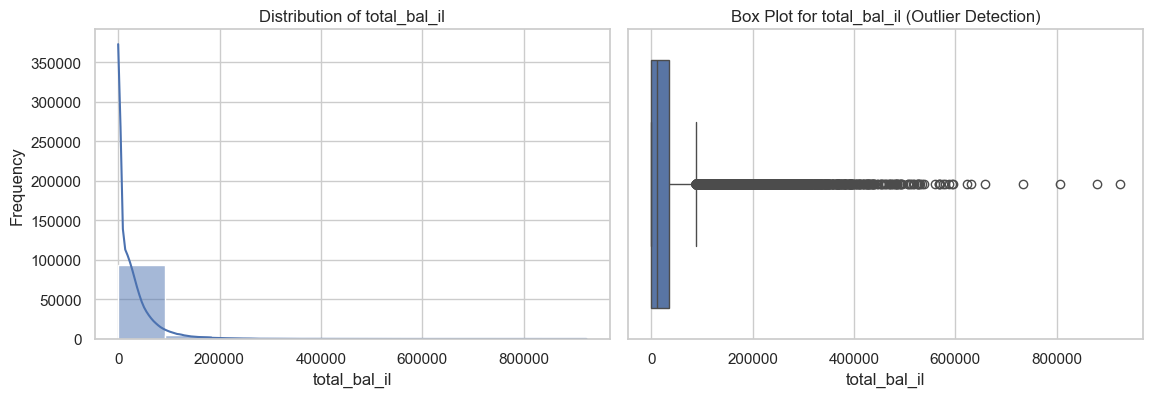


Summary Statistics for Numeric  'total_bal_il':
count    100000.000000
mean      25980.472180
std       42164.603059
min           0.000000
25%           0.000000
50%       11373.000000
75%       35450.000000
max      924163.000000
Name: total_bal_il, dtype: float64

Interquartile Range (IQR): 35450.0000
Lower Bound for Outliers (IQR method): -53175.0000
Upper Bound for Outliers (IQR method): 88625.0000
Number of Outliers (IQR method): 6390

Z-score Summary:
count    1.000000e+05
mean    -2.764011e-17
std      1.000000e+00
min     -6.161678e-01
25%     -6.161678e-01
50%     -3.464392e-01
75%      2.245848e-01
max      2.130181e+01
Name: total_bal_il, dtype: float64

Number of Outliers (Z-score method): 1937

Skewness: 3.9872

Normality Tests:
D'Agostino's K^2 Test: Statistic=86173.2673, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6270, p-value=0.0000
Anderson-Darling Test: Statistic=9466.8976

Summary Statistics and Analysis for Numeric Column: revol_bal


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


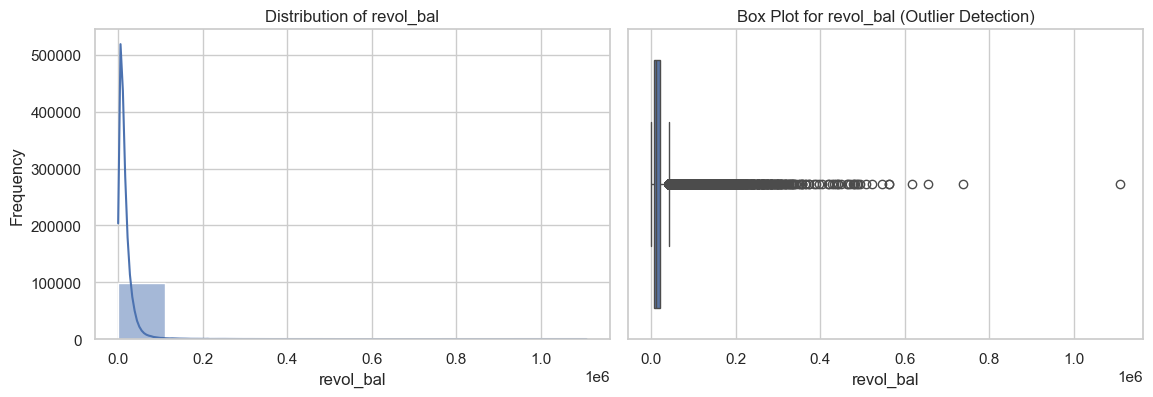


Summary Statistics for Numeric  'revol_bal':
count    1.000000e+05
mean     1.689349e+04
std      2.239829e+04
min      0.000000e+00
25%      5.973750e+03
50%      1.146500e+04
75%      2.056625e+04
max      1.107809e+06
Name: revol_bal, dtype: float64

Interquartile Range (IQR): 14592.5000
Lower Bound for Outliers (IQR method): -15915.0000
Upper Bound for Outliers (IQR method): 42455.0000
Number of Outliers (IQR method): 6127

Z-score Summary:
count    1.000000e+05
mean    -8.096634e-17
std      1.000000e+00
min     -7.542314e-01
25%     -4.875257e-01
50%     -2.423619e-01
75%      1.639750e-01
max      4.870531e+01
Name: revol_bal, dtype: float64

Number of Outliers (Z-score method): 1375

Skewness: 8.4149

Normality Tests:
D'Agostino's K^2 Test: Statistic=144413.5926, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.5241, p-value=0.0000
Anderson-Darling Test: Statistic=9397.1827

Summary Statistics and Analysis for Numeric Column: avg_cur_bal


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


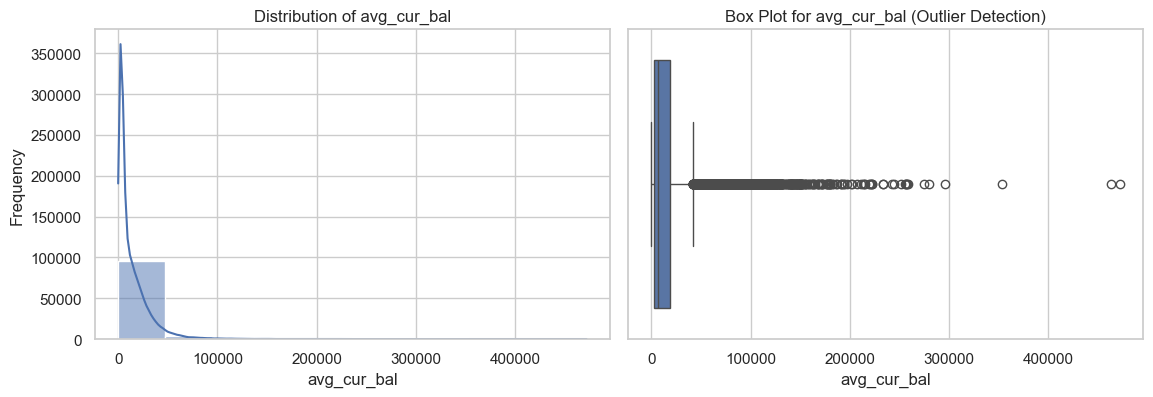


Summary Statistics for Numeric  'avg_cur_bal':
count    100000.000000
mean      13421.557630
std       16624.364043
min           0.000000
25%        2933.000000
50%        7080.000000
75%       18730.500000
max      471749.000000
Name: avg_cur_bal, dtype: float64

Interquartile Range (IQR): 15797.5000
Lower Bound for Outliers (IQR method): -20763.2500
Upper Bound for Outliers (IQR method): 42426.7500
Number of Outliers (IQR method): 5434

Z-score Summary:
count    1.000000e+05
mean     5.208278e-17
std      1.000000e+00
min     -8.073426e-01
25%     -6.309148e-01
50%     -3.814617e-01
75%      3.193471e-01
max      2.756962e+01
Name: avg_cur_bal, dtype: float64

Number of Outliers (Z-score method): 1718

Skewness: 3.6453

Normality Tests:
D'Agostino's K^2 Test: Statistic=82958.0627, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7013, p-value=0.0000
Anderson-Darling Test: Statistic=7181.6245

Summary Statistics and Analysis for Numeric Column: bc_open_to_buy


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


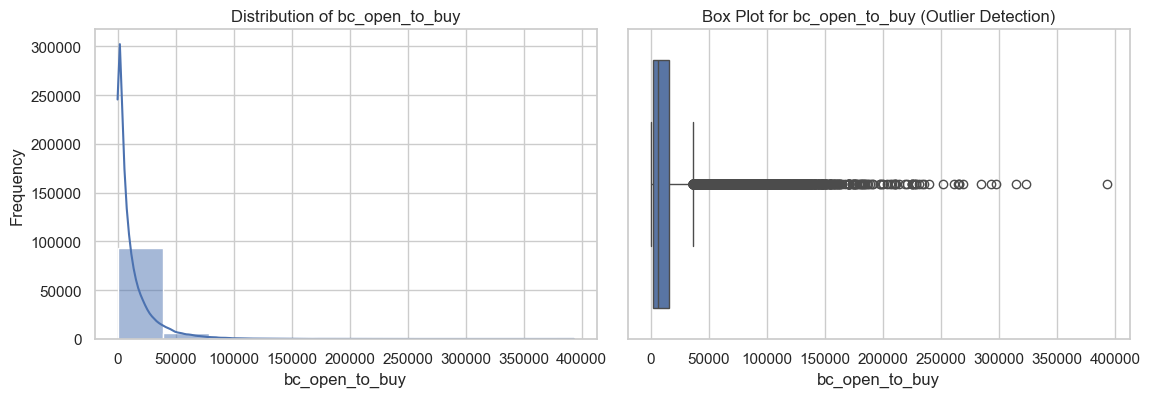


Summary Statistics for Numeric  'bc_open_to_buy':
count    100000.000000
mean      12415.307510
std       17965.985347
min           0.000000
25%        1732.750000
50%        5930.500000
75%       15720.250000
max      393250.000000
Name: bc_open_to_buy, dtype: float64

Interquartile Range (IQR): 13987.5000
Lower Bound for Outliers (IQR method): -19248.5000
Upper Bound for Outliers (IQR method): 36701.5000
Number of Outliers (IQR method): 8051

Z-score Summary:
count    1.000000e+05
mean    -2.025047e-17
std      1.000000e+00
min     -6.910452e-01
25%     -5.945990e-01
50%     -3.609492e-01
75%      1.839555e-01
max      2.119754e+01
Name: bc_open_to_buy, dtype: float64

Number of Outliers (Z-score method): 2107

Skewness: 3.5935

Normality Tests:
D'Agostino's K^2 Test: Statistic=79070.0843, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6555, p-value=0.0000
Anderson-Darling Test: Statistic=9242.0133

Summary Statistics and Analysis for Numeric Column: out_prncp_inv


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


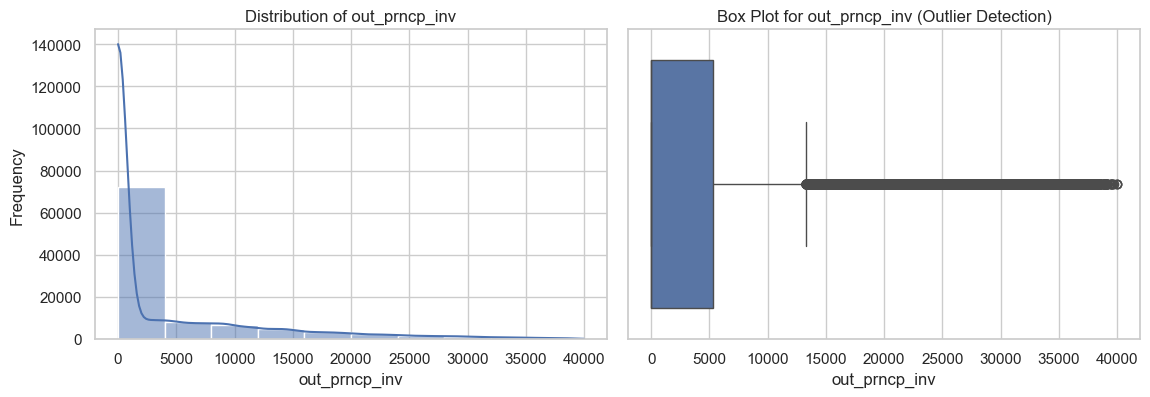


Summary Statistics for Numeric  'out_prncp_inv':
count    100000.000000
mean       4031.436341
std        7464.709160
min           0.000000
25%           0.000000
50%           0.000000
75%        5314.927500
max       40000.000000
Name: out_prncp_inv, dtype: float64

Interquartile Range (IQR): 5314.9275
Lower Bound for Outliers (IQR method): -7972.3912
Upper Bound for Outliers (IQR method): 13287.3187
Number of Outliers (IQR method): 11939

Z-score Summary:
count    1.000000e+05
mean     3.780087e-17
std      1.000000e+00
min     -5.400661e-01
25%     -5.400661e-01
50%     -5.400661e-01
75%      1.719412e-01
max      4.818482e+00
Name: out_prncp_inv, dtype: float64

Number of Outliers (Z-score method): 2703

Skewness: 2.1570

Normality Tests:
D'Agostino's K^2 Test: Statistic=41800.1266, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6173, p-value=0.0000
Anderson-Darling Test: Statistic=15819.1647

Summary Statistics and Analysis for Numeric Column: out_prncp


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


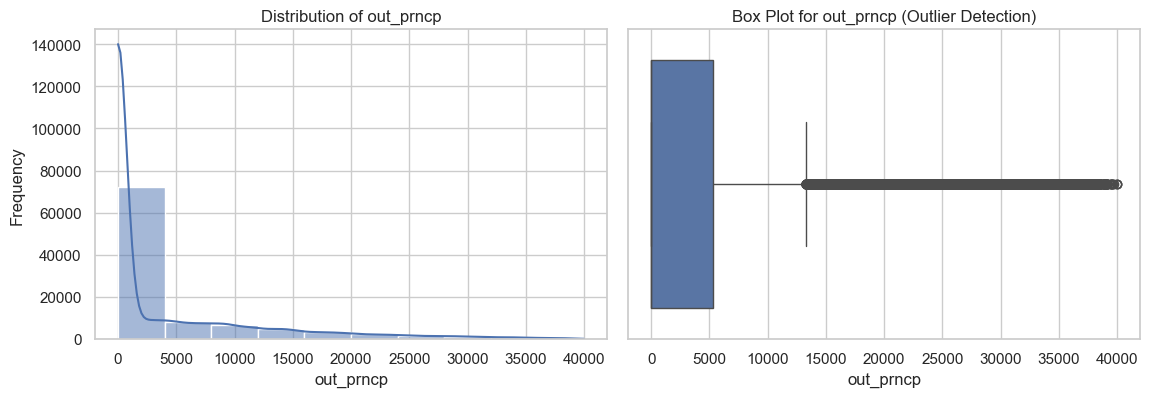


Summary Statistics for Numeric  'out_prncp':
count    100000.000000
mean       4032.024853
std        7465.243079
min           0.000000
25%           0.000000
50%           0.000000
75%        5315.210000
max       40000.000000
Name: out_prncp, dtype: float64

Interquartile Range (IQR): 5315.2100
Lower Bound for Outliers (IQR method): -7972.8150
Upper Bound for Outliers (IQR method): 13288.0250
Number of Outliers (IQR method): 11938

Z-score Summary:
count    1.000000e+05
mean    -3.254286e-17
std      1.000000e+00
min     -5.401063e-01
25%     -5.401063e-01
50%     -5.401063e-01
75%      1.718879e-01
max      4.818058e+00
Name: out_prncp, dtype: float64

Number of Outliers (Z-score method): 2704

Skewness: 2.1568

Normality Tests:
D'Agostino's K^2 Test: Statistic=41794.4271, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6173, p-value=0.0000
Anderson-Darling Test: Statistic=15817.4890

Summary Statistics and Analysis for Numeric Column: installment


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


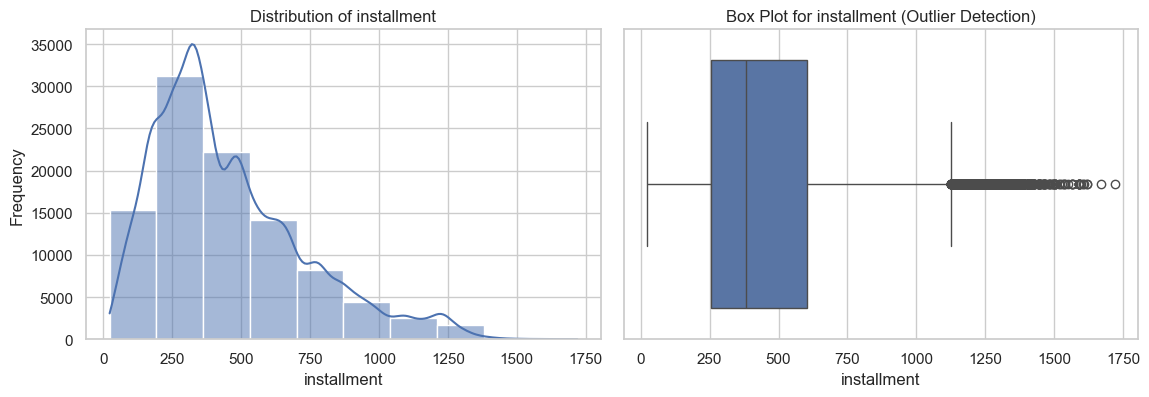


Summary Statistics for Numeric  'installment':
count    100000.000000
mean        451.708510
std         273.022605
min          22.510000
25%         253.060000
50%         380.810000
75%         602.300000
max        1719.830000
Name: installment, dtype: float64

Interquartile Range (IQR): 349.2400
Lower Bound for Outliers (IQR method): -270.8000
Upper Bound for Outliers (IQR method): 1126.1600
Number of Outliers (IQR method): 3006

Z-score Summary:
count    1.000000e+05
mean     4.373391e-17
std      1.000000e+00
min     -1.572026e+00
25%     -7.275900e-01
50%     -2.596800e-01
75%      5.515715e-01
max      4.644749e+00
Name: installment, dtype: float64

Number of Outliers (Z-score method): 682

Skewness: 1.0062

Normality Tests:
D'Agostino's K^2 Test: Statistic=13025.0246, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.9276, p-value=0.0000
Anderson-Darling Test: Statistic=2033.5622

Summary Statistics and Analysis for Numeric Column: max_bal_bc


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


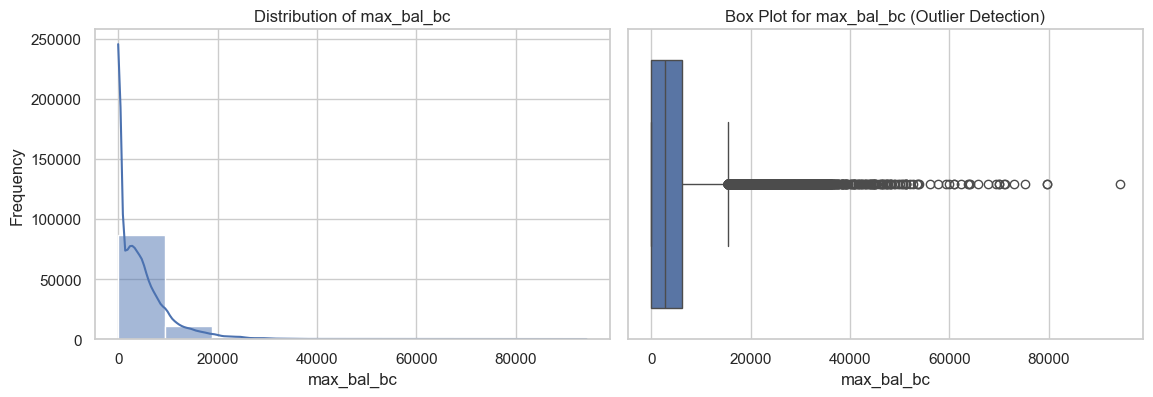


Summary Statistics for Numeric  'max_bal_bc':
count    100000.000000
mean       4221.334910
std        5375.754372
min           0.000000
25%           0.000000
50%        2687.000000
75%        6168.250000
max       94246.000000
Name: max_bal_bc, dtype: float64

Interquartile Range (IQR): 6168.2500
Lower Bound for Outliers (IQR method): -9252.3750
Upper Bound for Outliers (IQR method): 15420.6250
Number of Outliers (IQR method): 4514

Z-score Summary:
count    1.000000e+05
mean     6.558309e-17
std      1.000000e+00
min     -7.852544e-01
25%     -7.852544e-01
50%     -2.854176e-01
75%      3.621659e-01
max      1.674642e+01
Name: max_bal_bc, dtype: float64

Number of Outliers (Z-score method): 1847

Skewness: 2.4332

Normality Tests:
D'Agostino's K^2 Test: Statistic=55031.0265, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7621, p-value=0.0000
Anderson-Darling Test: Statistic=5933.6396

Summary Statistics and Analysis for Numeric Column: annual_inc


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


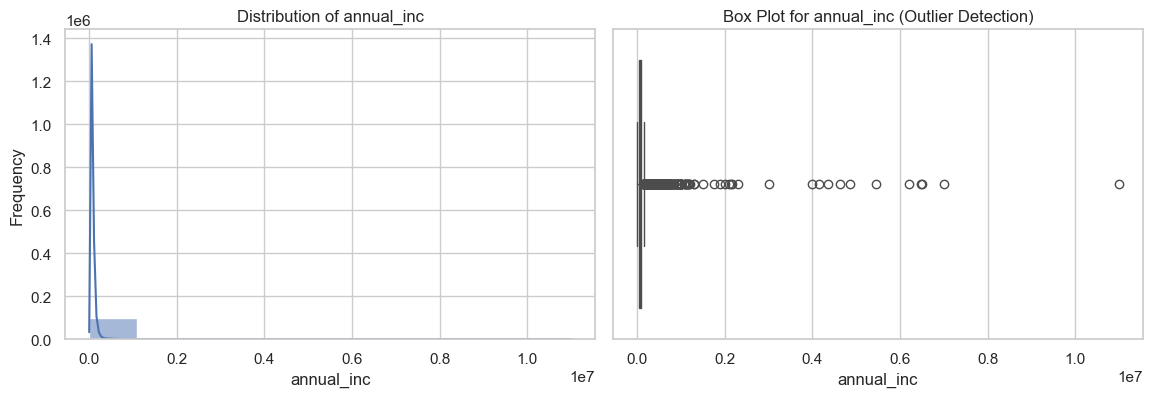


Summary Statistics for Numeric  'annual_inc':
count    1.000000e+05
mean     8.002918e+04
std      8.722434e+04
min      0.000000e+00
25%      4.716050e+04
50%      6.600000e+04
75%      9.500000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

Interquartile Range (IQR): 47839.5000
Lower Bound for Outliers (IQR method): -24598.7500
Upper Bound for Outliers (IQR method): 166759.2500
Number of Outliers (IQR method): 5205

Z-score Summary:
count    1.000000e+05
mean     3.673506e-17
std      1.000000e+00
min     -9.175097e-01
25%     -3.768292e-01
50%     -1.608402e-01
75%      1.716358e-01
max      1.251849e+02
Name: annual_inc, dtype: float64

Number of Outliers (Z-score method): 567

Skewness: 47.0148

Normality Tests:
D'Agostino's K^2 Test: Statistic=308307.2588, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.3271, p-value=0.0000
Anderson-Darling Test: Statistic=10934.7758

Summary Statistics and Analysis for Numeric Column: dti


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


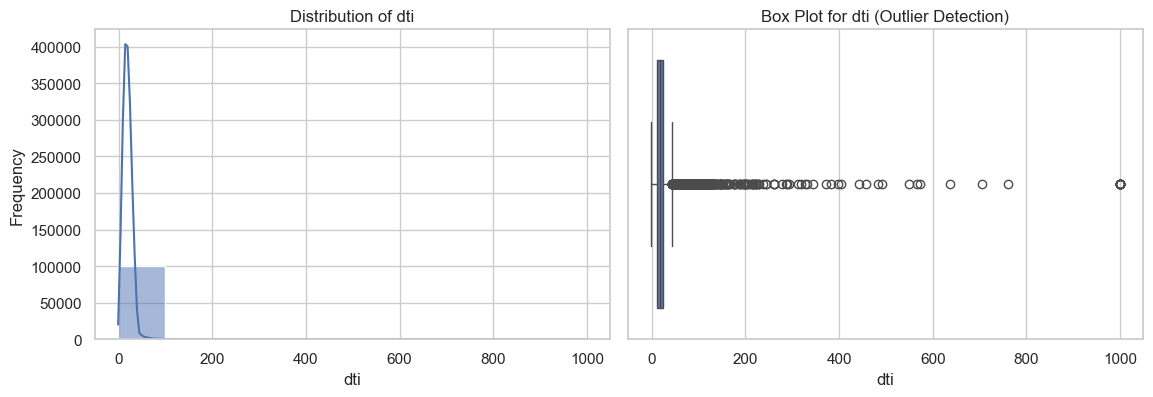


Summary Statistics for Numeric  'dti':
count    100000.000000
mean         19.312533
std          17.280254
min          -1.000000
25%          12.040000
50%          18.090000
75%          24.870000
max         999.000000
Name: dti, dtype: float64

Interquartile Range (IQR): 12.8300
Lower Bound for Outliers (IQR method): -7.2050
Upper Bound for Outliers (IQR method): 44.1150
Number of Outliers (IQR method): 1300

Z-score Summary:
count    1.000000e+05
mean     1.652012e-16
std      1.000000e+00
min     -1.175477e+00
25%     -4.208580e-01
50%     -7.074743e-02
75%      3.216079e-01
max      5.669404e+01
Name: dti, dtype: float64

Number of Outliers (Z-score method): 365

Skewness: 30.7938

Normality Tests:
D'Agostino's K^2 Test: Statistic=262484.1002, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.3890, p-value=0.0000
Anderson-Darling Test: Statistic=7010.2110

Summary Statistics and Analysis for Numeric Column: total_rev_hi_lim


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


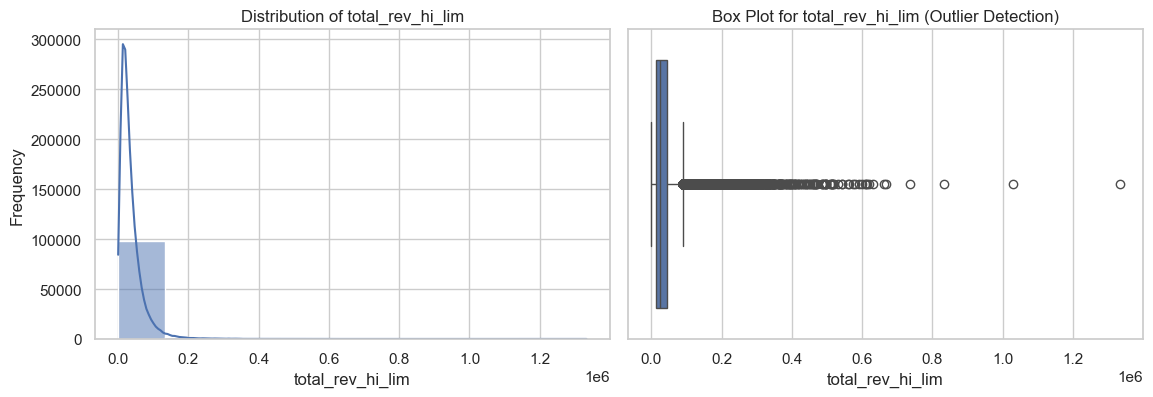


Summary Statistics for Numeric  'total_rev_hi_lim':
count    1.000000e+05
mean     3.551056e+04
std      3.582677e+04
min      0.000000e+00
25%      1.460000e+04
50%      2.610000e+04
75%      4.500000e+04
max      1.333000e+06
Name: total_rev_hi_lim, dtype: float64

Interquartile Range (IQR): 30400.0000
Lower Bound for Outliers (IQR method): -31000.0000
Upper Bound for Outliers (IQR method): 90600.0000
Number of Outliers (IQR method): 5709

Z-score Summary:
count    1.000000e+05
mean     4.529710e-17
std      1.000000e+00
min     -9.911737e-01
25%     -5.836573e-01
50%     -2.626683e-01
75%      2.648702e-01
max      3.621564e+01
Name: total_rev_hi_lim, dtype: float64

Number of Outliers (Z-score method): 1631

Skewness: 4.6958

Normality Tests:
D'Agostino's K^2 Test: Statistic=100976.1641, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.6912, p-value=0.0000
Anderson-Darling Test: Statistic=5941.6808

Summary Statistics and Analysis for Numeric Column: tot_coll_amt


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


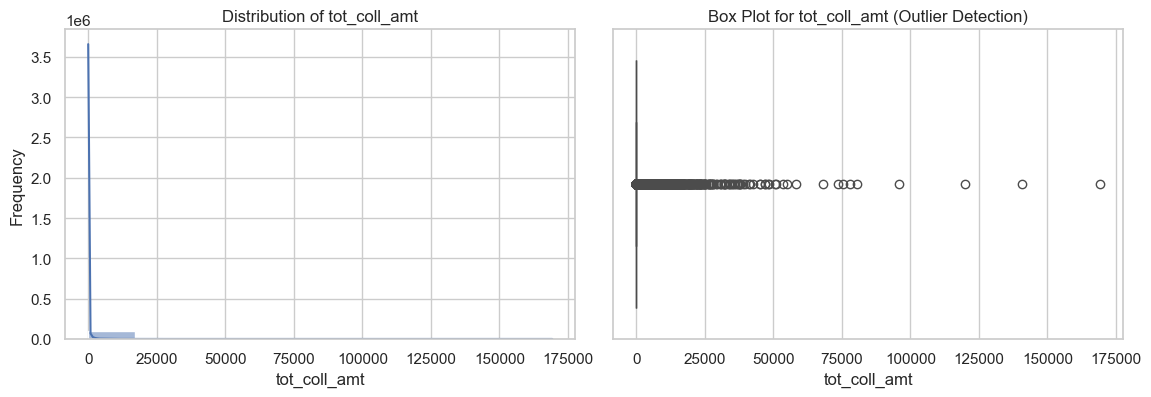


Summary Statistics for Numeric  'tot_coll_amt':
count    100000.000000
mean        202.984480
std        1660.176681
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      169257.000000
Name: tot_coll_amt, dtype: float64

Interquartile Range (IQR): 0.0000
Lower Bound for Outliers (IQR method): 0.0000
Upper Bound for Outliers (IQR method): 0.0000
Number of Outliers (IQR method): 14408

Z-score Summary:
count    1.000000e+05
mean     3.996803e-18
std      1.000000e+00
min     -1.222668e-01
25%     -1.222668e-01
50%     -1.222668e-01
75%     -1.222668e-01
max      1.018289e+02
Name: tot_coll_amt, dtype: float64

Number of Outliers (Z-score method): 813

Skewness: 35.9332

Normality Tests:
D'Agostino's K^2 Test: Statistic=278999.2671, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.0901, p-value=0.0000
Anderson-Darling Test: Statistic=32116.9668

Summary Statistics and Analysis for Numeric Column: dti_joint


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


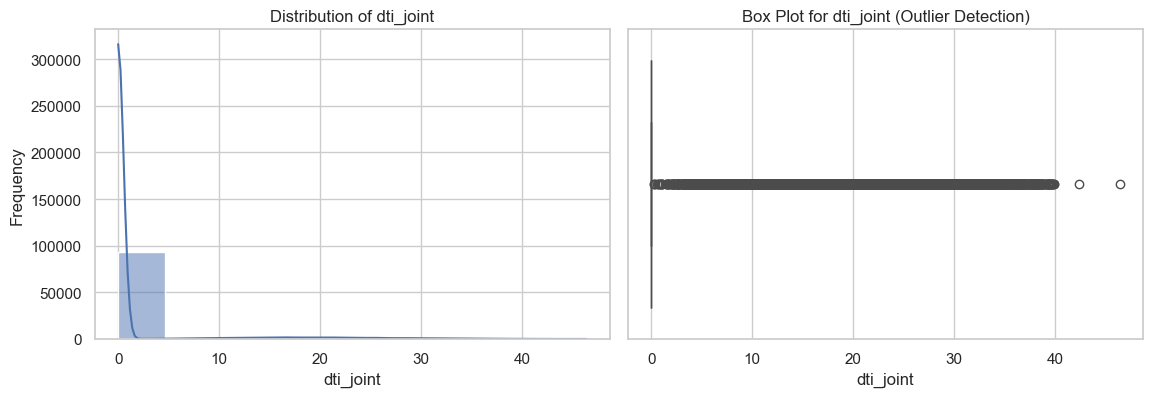


Summary Statistics for Numeric  'dti_joint':
count    100000.000000
mean          1.390801
std           5.437361
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          46.400000
Name: dti_joint, dtype: float64

Interquartile Range (IQR): 0.0000
Lower Bound for Outliers (IQR method): 0.0000
Upper Bound for Outliers (IQR method): 0.0000
Number of Outliers (IQR method): 7165

Z-score Summary:
count    1.000000e+05
mean     1.099565e-16
std      1.000000e+00
min     -2.557860e-01
25%     -2.557860e-01
50%     -2.557860e-01
75%     -2.557860e-01
max      8.277765e+00
Name: dti_joint, dtype: float64

Number of Outliers (Z-score method): 3976

Skewness: 4.1562

Normality Tests:
D'Agostino's K^2 Test: Statistic=83072.3819, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.2776, p-value=0.0000
Anderson-Darling Test: Statistic=33089.4000

Summary Statistics and Analysis for Numeric Column: total_bc_limit


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


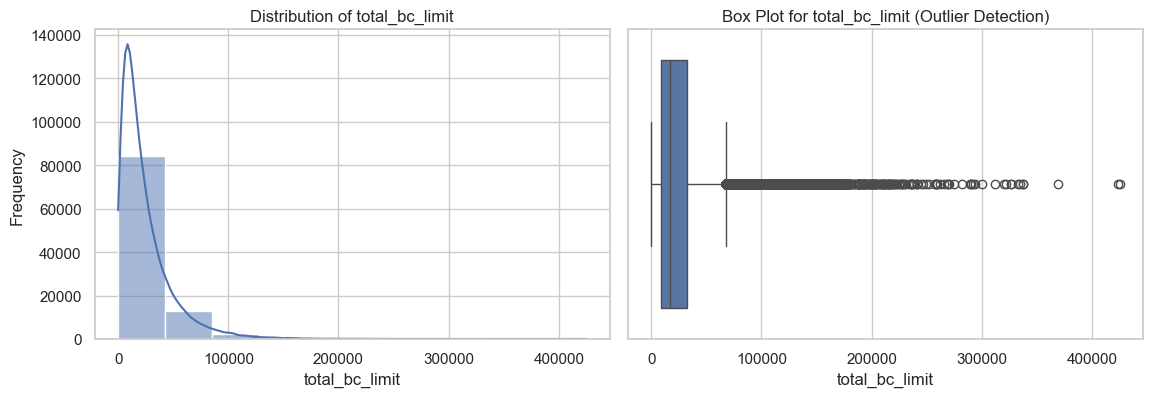


Summary Statistics for Numeric  'total_bc_limit':
count    100000.000000
mean      24392.924580
std       24489.822063
min           0.000000
25%        8500.000000
50%       17100.000000
75%       32100.000000
max      425150.000000
Name: total_bc_limit, dtype: float64

Interquartile Range (IQR): 23600.0000
Lower Bound for Outliers (IQR method): -26900.0000
Upper Bound for Outliers (IQR method): 67500.0000
Number of Outliers (IQR method): 5824

Z-score Summary:
count    1.000000e+05
mean     4.874323e-17
std      1.000000e+00
min     -9.960434e-01
25%     -6.489604e-01
50%     -2.977941e-01
75%      3.147052e-01
max      1.636423e+01
Name: total_bc_limit, dtype: float64

Number of Outliers (Z-score method): 1940

Skewness: 2.6734

Normality Tests:
D'Agostino's K^2 Test: Statistic=60516.8750, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.7741, p-value=0.0000
Anderson-Darling Test: Statistic=5274.2209

Summary Statistics and Analysis for Numeric Column: total_rec_late_fee


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


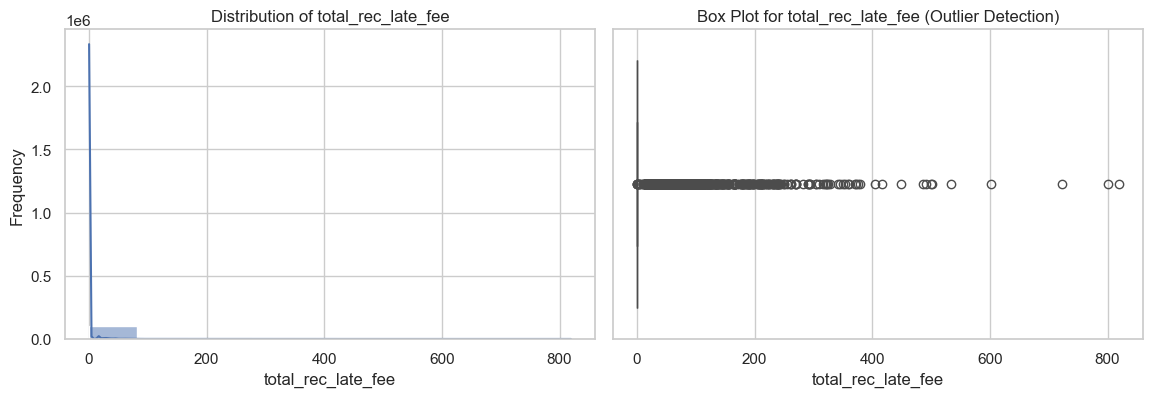


Summary Statistics for Numeric  'total_rec_late_fee':
count    100000.000000
mean          1.750509
std          13.416653
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         819.200000
Name: total_rec_late_fee, dtype: float64

Interquartile Range (IQR): 0.0000
Lower Bound for Outliers (IQR method): 0.0000
Upper Bound for Outliers (IQR method): 0.0000
Number of Outliers (IQR method): 4216

Z-score Summary:
count    1.000000e+05
mean     7.815970e-18
std      1.000000e+00
min     -1.304729e-01
25%     -1.304729e-01
50%     -1.304729e-01
75%     -1.304729e-01
max      6.092797e+01
Name: total_rec_late_fee, dtype: float64

Number of Outliers (Z-score method): 1186

Skewness: 19.8861

Normality Tests:
D'Agostino's K^2 Test: Statistic=218929.3158, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.1084, p-value=0.0000
Anderson-Darling Test: Statistic=34167.0030

Summary Statistics and Analysis for Numeric Column: annual_inc_joint


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


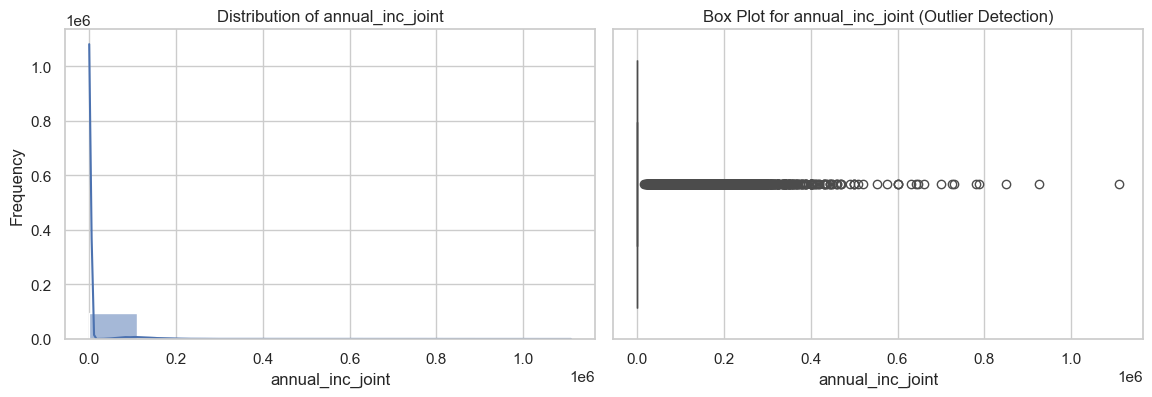


Summary Statistics for Numeric  'annual_inc_joint':
count    1.000000e+05
mean     9.285445e+03
std      3.805595e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.110000e+06
Name: annual_inc_joint, dtype: float64

Interquartile Range (IQR): 0.0000
Lower Bound for Outliers (IQR method): 0.0000
Upper Bound for Outliers (IQR method): 0.0000
Number of Outliers (IQR method): 7166

Z-score Summary:
count    1.000000e+05
mean     1.847411e-18
std      1.000000e+00
min     -2.439946e-01
25%     -2.439946e-01
50%     -2.439946e-01
75%     -2.439946e-01
max      2.892359e+01
Name: annual_inc_joint, dtype: float64

Number of Outliers (Z-score method): 3148

Skewness: 5.6285

Normality Tests:
D'Agostino's K^2 Test: Statistic=109909.2883, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.2642, p-value=0.0000
Anderson-Darling Test: Statistic=32443.4014

Summary Statistics and Analysis for Numeric Column: funded_amnt_inv


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


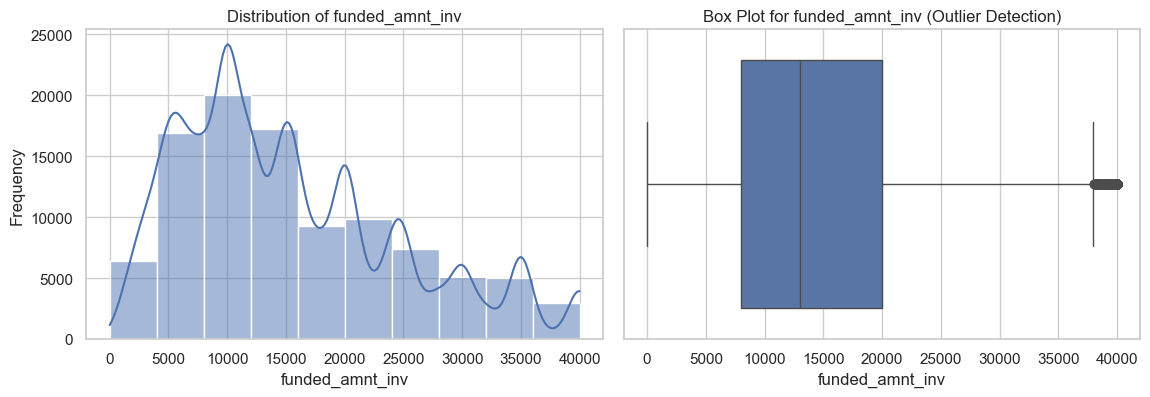


Summary Statistics for Numeric  'funded_amnt_inv':
count    100000.000000
mean      15313.244829
std        9470.918891
min           0.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt_inv, dtype: float64

Interquartile Range (IQR): 12000.0000
Lower Bound for Outliers (IQR method): -10000.0000
Upper Bound for Outliers (IQR method): 38000.0000
Number of Outliers (IQR method): 2399

Z-score Summary:
count    1.000000e+05
mean    -5.154988e-17
std      1.000000e+00
min     -1.616870e+00
25%     -7.721790e-01
50%     -2.442471e-01
75%      4.948575e-01
max      2.606585e+00
Name: funded_amnt_inv, dtype: float64

Number of Outliers (Z-score method): 0

Skewness: 0.7891

Normality Tests:
D'Agostino's K^2 Test: Statistic=8243.7015, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.9337, p-value=0.0000
Anderson-Darling Test: Statistic=1950.6350

Summary Statistics and Analysis for Numeric Column: funded_amnt


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


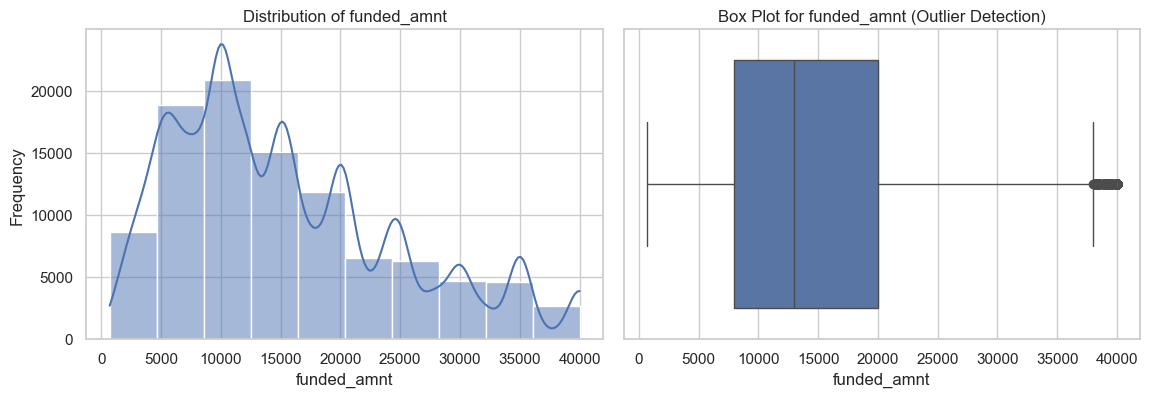


Summary Statistics for Numeric  'funded_amnt':
count    100000.000000
mean      15328.216250
std        9467.415275
min         700.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       40000.000000
Name: funded_amnt, dtype: float64

Interquartile Range (IQR): 12000.0000
Lower Bound for Outliers (IQR method): -10000.0000
Upper Bound for Outliers (IQR method): 38000.0000
Number of Outliers (IQR method): 2400

Z-score Summary:
count    1.000000e+05
mean     5.668355e-17
std      1.000000e+00
min     -1.545112e+00
25%     -7.740461e-01
50%     -2.459189e-01
75%      4.934593e-01
max      2.605968e+00
Name: funded_amnt, dtype: float64

Number of Outliers (Z-score method): 0

Skewness: 0.7895

Normality Tests:
D'Agostino's K^2 Test: Statistic=8250.6596, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.9334, p-value=0.0000
Anderson-Darling Test: Statistic=1956.2833

Summary Statistics and Analysis for Numeric Column: loan_amnt


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


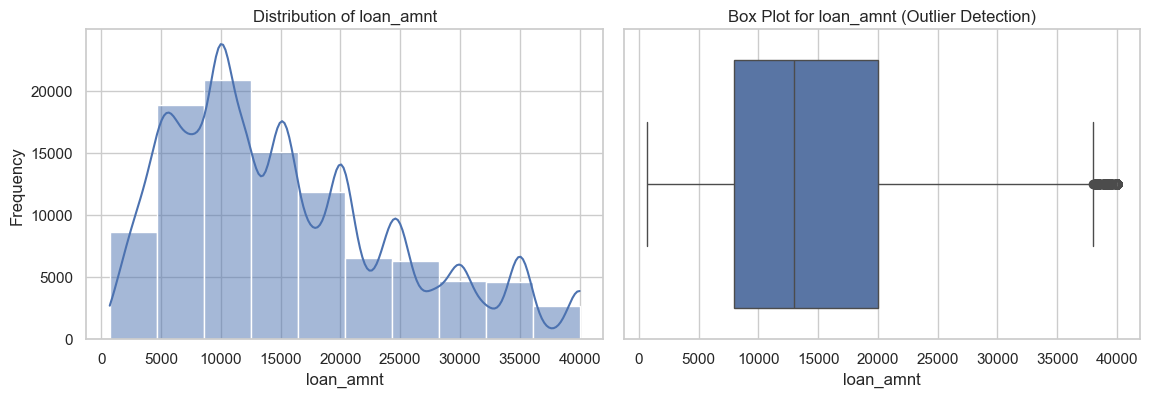


Summary Statistics for Numeric  'loan_amnt':
count    100000.000000
mean      15332.373000
std        9468.189883
min         700.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

Interquartile Range (IQR): 12000.0000
Lower Bound for Outliers (IQR method): -10000.0000
Upper Bound for Outliers (IQR method): 38000.0000
Number of Outliers (IQR method): 2400

Z-score Summary:
count    1.000000e+05
mean     4.760636e-17
std      1.000000e+00
min     -1.545425e+00
25%     -7.744218e-01
50%     -2.463378e-01
75%      4.929799e-01
max      2.605316e+00
Name: loan_amnt, dtype: float64

Number of Outliers (Z-score method): 0

Skewness: 0.7887

Normality Tests:
D'Agostino's K^2 Test: Statistic=8239.9352, p-value=0.0000
Shapiro-Wilk Test: Statistic=0.9335, p-value=0.0000
Anderson-Darling Test: Statistic=1953.7047


c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [296]:
numerical_list_stripped = [
    'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'tot_cur_bal', 
    'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_il_high_credit_limit', 
    'total_rec_prncp', 'total_bal_il', 'revol_bal', 'avg_cur_bal', 
    'bc_open_to_buy', 'out_prncp_inv', 'out_prncp', 'installment', 
    'max_bal_bc', 'annual_inc', 'dti', 'total_rev_hi_lim', 
    'tot_coll_amt', 'dti_joint', 'total_bc_limit', 'total_rec_late_fee', 
    'annual_inc_joint', 'funded_amnt_inv', 'funded_amnt', 'loan_amnt'
]

analyze_numeric_columns(numerical_list_stripped, df_dropped)

Now that we've finised our EDA let's check some of the categorical points with our target variable

In [297]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_purpose = pd.crosstab(df_dropped['loan_status_grouped_kn'], df_dropped['purpose'])

# Display the result
comparison_loan_status_purpose

purpose                 car  credit_card  debt_consolidation  educational  \
loan_status_grouped_kn                                                      
Completed               561        11772               28708           15   
Defaulted                87         2452                7457            2   
In Progress             336         9504               18929            0   
Late                      3          226                 553            0   

purpose                 home_improvement  house  major_purchase  medical  \
loan_status_grouped_kn                                                     
Completed                           3499    308            1247      608   
Defaulted                            746     91             250      165   
In Progress                         2376    292             711      392   
Late                                  52      6              15       12   

purpose                 moving  other  renewable_energy  small_business  \
loan_status_grouped_kn                                                    
Completed                  365   3190                20             516   
Defaulted                   94    784                17             201   
In Progress                175   2067                15             327   
Late                         7     55                 2              17   

purpose                 vacation  wedding  
loan_status_grouped_kn                     
Completed                    373       76  
Defaulted                     75       10  
In Progress                  232        1  
Late                           6        0

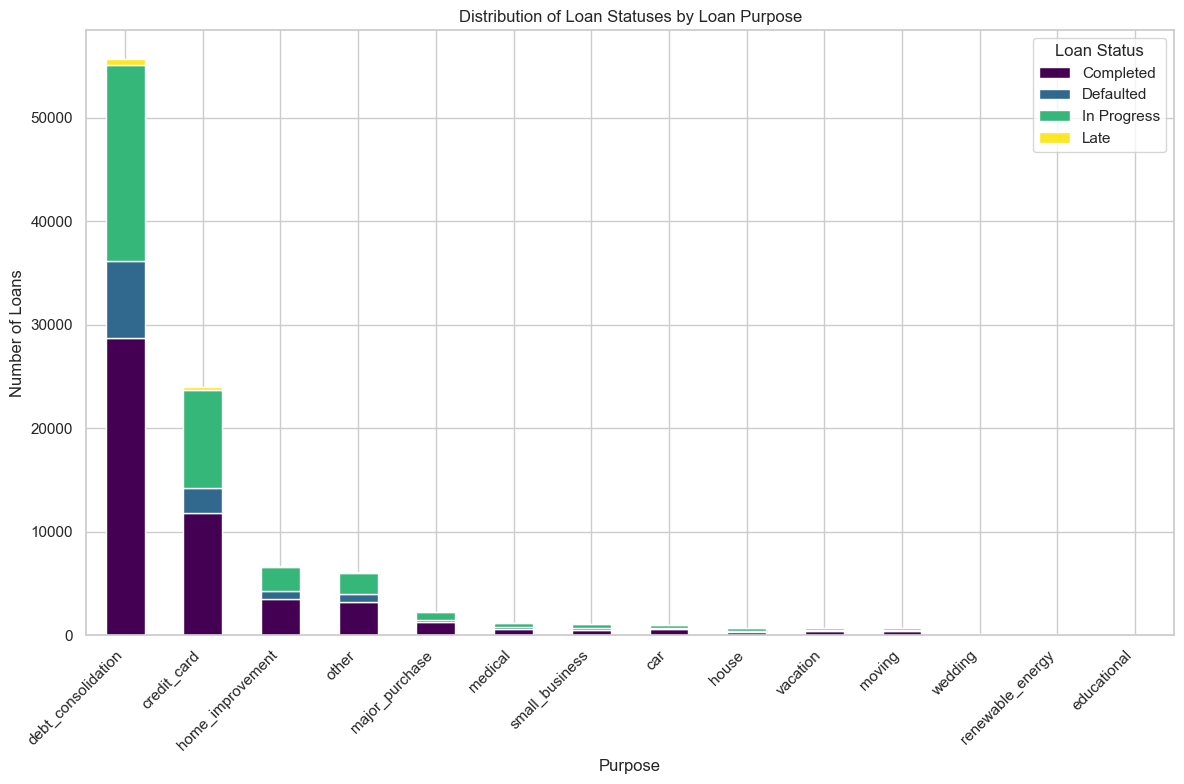

In [298]:
import matplotlib.pyplot as plt

# Sort data by total loan counts across all statuses for each purpose (descending order)
sorted_data = comparison_loan_status_purpose.sum(axis=0).sort_values(ascending=False)
sorted_columns = sorted_data.index
comparison_loan_status_purpose_sorted = comparison_loan_status_purpose[sorted_columns]

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each loan status as a stacked segment
comparison_loan_status_purpose_sorted.T.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Set labels and title
ax.set_xlabel('Purpose')
ax.set_ylabel('Number of Loans')
ax.set_title('Distribution of Loan Statuses by Loan Purpose')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Loan Status')

# Display the plot
plt.show()


In [299]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_ver_status = pd.crosstab(df_dropped['loan_status_grouped_kn'], df_dropped['verification_status'])

# Display the result
comparison_loan_status_ver_status

verification_status     Not Verified  Source Verified  Verified
loan_status_grouped_kn                                         
Completed                      17102            19960     14196
Defaulted                       3016             5069      4346
In Progress                    16005            13500      5852
Late                             344              403       207

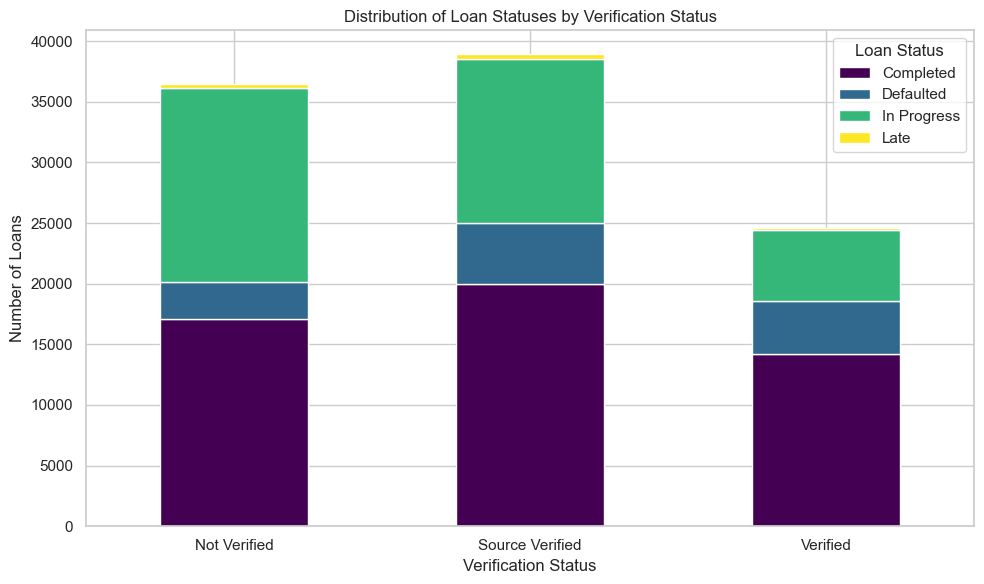

In [300]:
import matplotlib.pyplot as plt

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Transpose the DataFrame for easier plotting and plot each loan status as a stacked segment
comparison_loan_status_ver_status.T.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Set labels and title
ax.set_xlabel('Verification Status')
ax.set_ylabel('Number of Loans')
ax.set_title('Distribution of Loan Statuses by Verification Status')

# Rotate x-axis labels for readability
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Loan Status')

# Display the plot
plt.show()

This is an interesting view, as the the Not Verified, and Source Verified represent both roughly 15-20% of the charged off loans for each status but Verified accounts for roughly 23% of the total. I was expecting a lot of the Charged Off in the Not Verified `verification_status`.

In [301]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_addr_state = pd.crosstab(df_dropped['loan_status_grouped_kn'], df_dropped['addr_state'])

# Display the result
comparison_loan_status_addr_state

addr_state               AK   AL   AR    AZ    CA    CO   CT   DC   DE    FL  \
loan_status_grouped_kn                                                         
Completed               132  591  364  1311  7203  1166  751  126  142  3633   
Defaulted                31  179  132   282  1744   210  162   18   33  1042   
In Progress              75  449  226   823  4644   739  615   77  120  2528   
Late                      2    8    9    26   130    15   20    3    2    92   

addr_state                GA   HI  IA   ID    IL   IN   KS   KY   LA    MA  \
loan_status_grouped_kn                                                       
Completed               1710  263   1   91  1932  809  435  508  528  1135   
Defaulted                363   66   0   13   447  204   80  121  148   260   
In Progress             1256  158   0  113  1467  592  289  361  375   787   
Late                      25    5   0    3    29   20    9    6   10    29   

addr_state                MD   ME    MI   MN   MO   MS   MT    NC  ND   NE  \
loan_status_grouped_kn                                                       
Completed               1156  101  1356  929  871  225  149  1438  88  156   
Defaulted                319    8   345  204  213  100   40   353  23   52   
In Progress              902  136   864  546  594  213   92   995  80  156   
Late                      26    7    15   15    9    6    3    21   0    4   

addr_state               NH    NJ   NM   NV    NY    OH   OK   OR    PA   RI  \
loan_status_grouped_kn                                                         
Completed               259  1802  248  795  3992  1692  427  657  1766  246   
Defaulted                34   438   67  206  1121   447  145   87   428   58   
In Progress             179  1345  191  488  2780  1151  320  483  1220  149   
Late                      5    37    4   21    83    25    7   10    28    2   

addr_state               SC   SD   TN    TX   UT    VA   VT    WA   WI   WV  \
loan_status_grouped_kn                                                        
Completed               673  116  805  4258  392  1452  137  1225  682  214   
Defaulted               115   27  184  1031   83   348   14   189  162   33   
In Progress             473   67  610  2961  203   986   89   703  429  186   
Late                     15    1   14    85    5    28    2    17   10    5   

addr_state               WY  
loan_status_grouped_kn       
Completed               120  
Defaulted                22  
In Progress              72  
Late                      1

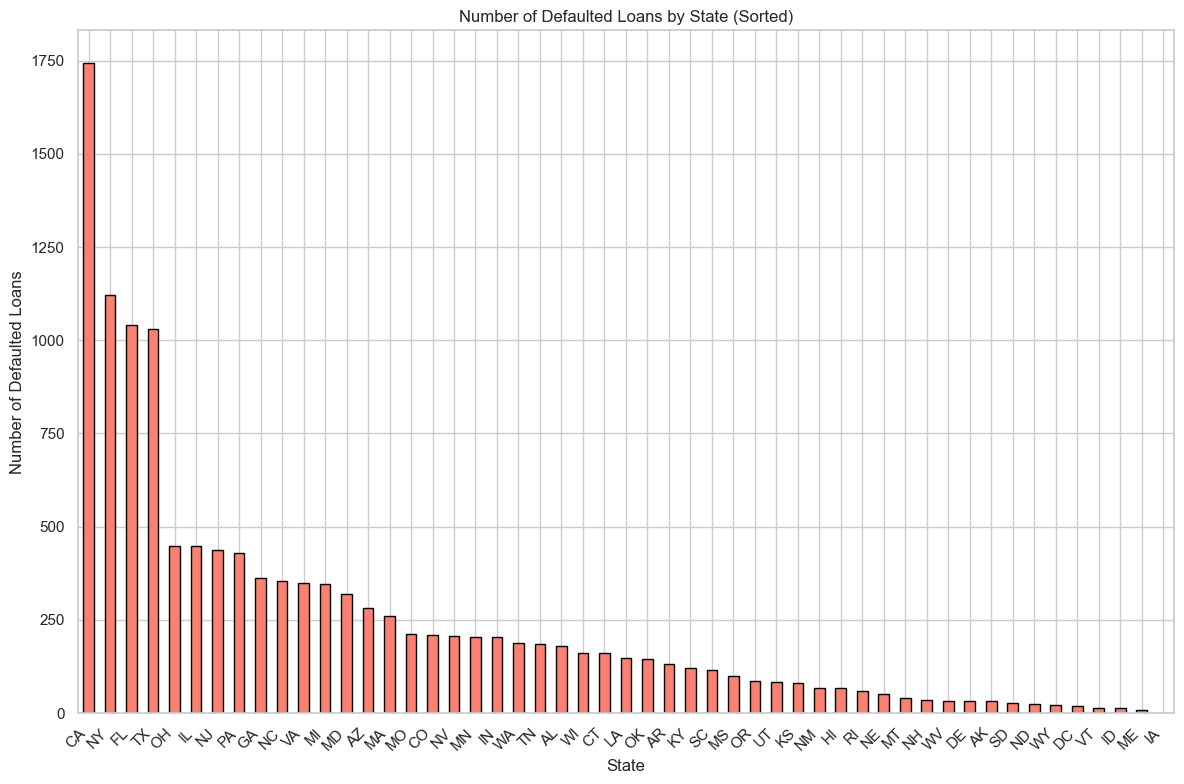

In [302]:
# Filter data to only include the 'Defaulted' loan status
defaulted_by_state = comparison_loan_status_addr_state.loc['Defaulted']

# Sort the data by the number of defaulted loans in descending order
defaulted_by_state_sorted = defaulted_by_state.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
defaulted_by_state_sorted.plot(kind='bar', color='salmon', edgecolor='black')

# Set labels and title
plt.xlabel("State")
plt.ylabel("Number of Defaulted Loans")
plt.title("Number of Defaulted Loans by State (Sorted)")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


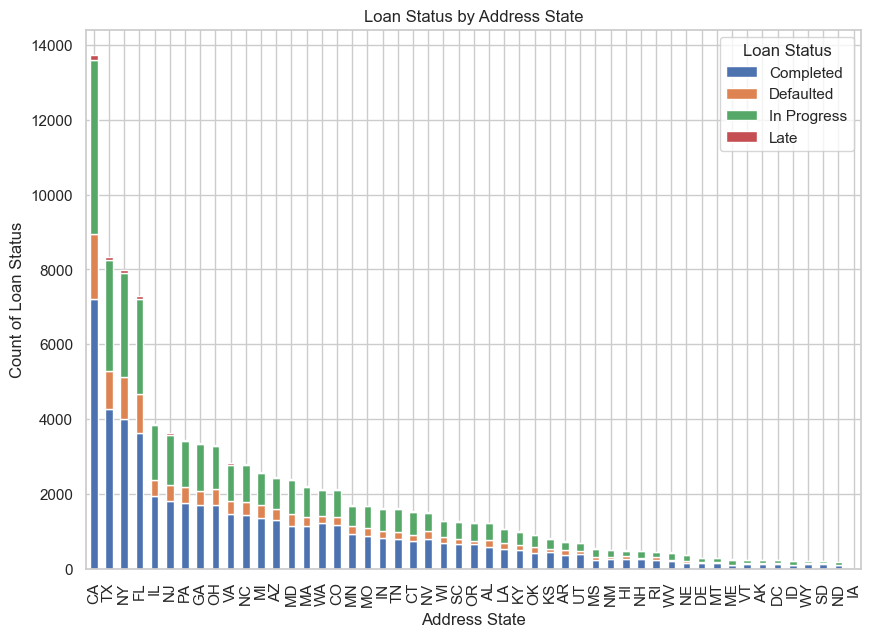

In [303]:
import matplotlib.pyplot as plt

# Group data by 'loan_status' and 'addr_state' and count occurrences
grouped_data = df_dropped.groupby(['addr_state', 'loan_status_grouped_kn']).size().unstack()

# Sort the data by the total count of loan statuses in descending order
grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]

# Plot the bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.title('Loan Status by Address State')
plt.xlabel('Address State')
plt.ylabel('Count of Loan Status')
plt.legend(title='Loan Status')

# Display the plot
plt.show()


In [304]:
# Calculate the total number of loans for each state
total_loans_by_state = comparison_loan_status_addr_state.sum(axis=0)

# Extract the number of defaulted loans for each state
defaulted_loans_by_state = comparison_loan_status_addr_state.loc['Defaulted']

# Calculate the percentage of defaulted loans
defaulted_percentage_by_state = (defaulted_loans_by_state / total_loans_by_state) * 100

# Combine into a DataFrame for easy viewing
defaulted_percentage_df = pd.DataFrame({
    'Total Loans': total_loans_by_state,
    'Defaulted Loans': defaulted_loans_by_state,
    '% Defaulted': defaulted_percentage_by_state
})

# Display the result
defaulted_percentage_df = defaulted_percentage_df.sort_values(by='% Defaulted', ascending=False)
defaulted_percentage_df


Total Loans  Defaulted Loans  % Defaulted
addr_state                                           
MS                  544              100    18.382353
AR                  731              132    18.057456
OK                  899              145    16.129032
AL                 1227              179    14.588427
FL                 7295             1042    14.283756
NE                  368               52    14.130435
MT                  284               40    14.084507
NY                 7976             1121    14.054664
LA                 1061              148    13.949105
NV                 1510              206    13.642384
OH                 3315              447    13.484163
HI                  492               66    13.414634
MI                 2580              345    13.372093
MD                 2403              319    13.275073
NM                  510               67    13.137255
AK                  240               31    12.916667
SD                  211               27    12.796209
RI                  455               58    12.747253
CA                13721             1744    12.710444
WI                 1283              162    12.626656
MO                 1687              213    12.625963
NC                 2807              353    12.575704
IN                 1625              204    12.553846
PA                 3442              428    12.434631
TX                 8335             1031    12.369526
VA                 2814              348    12.366738
UT                  683               83    12.152269
KY                  996              121    12.148594
NJ                 3622              438    12.092766
MN                 1694              204    12.042503
ND                  191               23    12.041885
MA                 2211              260    11.759385
AZ                 2442              282    11.547912
IL                 3875              447    11.535484
TN                 1613              184    11.407316
DE                  297               33    11.111111
GA                 3354              363    10.822898
CT                 1548              162    10.465116
WY                  215               22    10.232558
CO                 2130              210     9.859155
KS                  813               80     9.840098
SC                 1276              115     9.012539
WA                 2134              189     8.856607
DC                  224               18     8.035714
WV                  438               33     7.534247
NH                  477               34     7.127883
OR                 1237               87     7.033145
ID                  220               13     5.909091
VT                  242               14     5.785124
ME                  252                8     3.174603
IA                    1                0     0.000000

#### Key Observations
- **Top States**: The states with the highest loan counts include **CA (California)**, **TX (Texas)**, **NY (New York)**, and **FL (Florida)**. These states exhibit a high volume of loans, likely due to their larger populations and economic activities.
- **Completed Loans**: The **Completed** loan status (blue segment) constitutes a significant portion in most states, suggesting a high rate of loan completion across regions.
- **In Progress Loans**: The **In Progress** loan status (green segment) appears prominently in states with higher loan volumes, indicating ongoing loan activities.
- **Defaulted and Late Loans**: **Defaulted** (orange) and **Late** (red) loans make up smaller portions of the overall loan distribution. However, states with higher loan counts (e.g., CA, TX, NY) also show relatively higher counts in these categories.


Let's keep `addr_state` in our feature set.

## Post EDA Analysis data transformation


Let's call our list function with the new_features selected. Then sense check the results for duplicates or missing data.

In [305]:
# this calls the split_data_frame function above create three lists to capture the sorting outputs in. 
# These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.
# Our function parameters are list and the latest version of our data frame in this caes new_features and df_dropped accordingly.
boolean_list, numerical_list, categorical_list = split_data_frame(new_features, df_dropped)

Summary of column counts:
boolean_list contains 19 values
numerical_list contains 94 values
categorical_list contains 14 values
The feature list we'll be working with contains (100000, 127) rows and columns.


In [306]:
# Filter columns by datetime dtype
datetime_headers = df_dropped.select_dtypes(include=['datetime64']).columns.tolist()

# Print the list of datetime headers
print("Datetime headers in data frame:", datetime_headers)

Datetime headers in data frame: ['earliest_cr_line', 'issue_d']


In [307]:
# Removing data time columns as we aren't running a time series.
# List of datetime headers
datetime_headers = df_dropped.select_dtypes(include=['datetime64']).columns.tolist()

# Function to remove datetime headers from a given list
def remove_datetime_headers(feature_list, datetime_headers):
    return [feature for feature in feature_list if feature not in datetime_headers]

# Removing datetime columns from each feature list
boolean_list = remove_datetime_headers(boolean_list, datetime_headers)
numerical_list = remove_datetime_headers(numerical_list, datetime_headers)
categorical_list = remove_datetime_headers(categorical_list, datetime_headers)

# Print updated lists to verify
print("Updated boolean_list:", boolean_list)
print("Updated numerical_list:", numerical_list)
print("Updated categorical_list:", categorical_list)


Updated boolean_list: ['earliest_cr_line_missing_clean_kn', 'fico_range_high_missing_clean_kn', 'fico_range_low_missing_clean_kn', 'last_fico_range_high_missing_clean_kn', 'last_fico_range_low_missing_clean_kn', 'mo_sin_old_il_acct_missing_clean_kn', 'mo_sin_old_rev_tl_op_missing_clean_kn', 'num_accts_ever_120_pd_missing_clean_kn', 'num_tl_120dpd_2m_missing_clean_kn', 'pub_rec_missing_clean_kn', 'pub_rec_bankruptcies_missing_clean_kn', 'emp_length_missing_clean_kn', 'emp_title_missing_clean_kn', 'annual_inc_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'inq_fi_missing_clean_kn', 'inq_last_12m_missing_clean_kn', 'inq_last_6mths_missing_clean_kn', 'num_tl_op_past_12m_missing_clean_kn']
Updated numerical_list: ['acc_now_delinq', 'acc_open_past_24mths', 'all_util', 'annual_inc', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'dti_joint', 'fico_range_high', 'fico_range_l

In [308]:
def check_for_duplicates(*lists):
    """
    Checks for duplicate headers in each list and prints the duplicates if any are found.

    Parameters:
    ----------
    *lists : list
        Lists of headers to check for duplicates.

    Returns:
    --------
    None
    """
    for i, header_list in enumerate(lists, start=1):
        duplicates = [item for item in set(header_list) if header_list.count(item) > 1]
        if duplicates:
            print(f"Duplicates found in list {i}: {duplicates}")
        else:
            print(f"No duplicates found in list {i}.")

check_for_duplicates(boolean_list, numerical_list, categorical_list)


No duplicates found in list 1.
Duplicates found in list 2: ['issue_d_year_kn', 'earliest_cr_line_month_kn', 'issue_d_month_kn', 'earliest_cr_line_year_kn']
Duplicates found in list 3: ['loan_status_grouped_kn']


In [309]:
def remove_duplicates(*lists):
    """
    Removes duplicates from each list and returns lists with unique headers.

    Parameters:
    ----------
    *lists : list
        Lists of headers to remove duplicates from.

    Returns:
    --------
    unique_lists : list
        A list of lists, each with duplicates removed.
    """
    unique_lists = [list(set(header_list)) for header_list in lists]
    
    return unique_lists

boolean_list, numerical_list, categorical_list = remove_duplicates(boolean_list, numerical_list, categorical_list)

print("Boolean list without duplicates:", boolean_list)
print("Numerical list without duplicates:", numerical_list)
print("Categorical list without duplicates:", categorical_list)


Boolean list without duplicates: ['num_accts_ever_120_pd_missing_clean_kn', 'emp_length_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'inq_last_6mths_missing_clean_kn', 'earliest_cr_line_missing_clean_kn', 'mo_sin_old_il_acct_missing_clean_kn', 'mo_sin_old_rev_tl_op_missing_clean_kn', 'inq_fi_missing_clean_kn', 'fico_range_low_missing_clean_kn', 'pub_rec_missing_clean_kn', 'last_fico_range_low_missing_clean_kn', 'pub_rec_bankruptcies_missing_clean_kn', 'num_tl_op_past_12m_missing_clean_kn', 'annual_inc_missing_clean_kn', 'inq_last_12m_missing_clean_kn', 'emp_title_missing_clean_kn', 'num_tl_120dpd_2m_missing_clean_kn', 'fico_range_high_missing_clean_kn', 'last_fico_range_high_missing_clean_kn']
Numerical list without duplicates: ['tot_coll_amt', 'revol_bal', 'acc_open_past_24mths', 'inq_last_12m', 'num_actv_bc_tl', 'mo_sin_rcnt_tl', 'mths_since_recent_bc_dlq', 'pct_tl_nvr_dlq', 'mths_since_last_delinq', 'total_cu_tl', 'total_pymnt_inv', 'num_accts_ever_120_pd', 'emp_length_kn

In [310]:
def check_lists_against_dataframe(dataframe, *lists):
    """
    Checks each provided list for missing and duplicate columns in the DataFrame.

    Parameters:
    ----------
    dataframe : pd.DataFrame
        The DataFrame to check against.
    *lists : list
        Lists of column names to check.

    Returns:
    --------
    None
    """
    # Iterate over each list and check for missing columns and duplicates
    for i, header_list in enumerate(lists, start=1):
        # Convert list to a set to check for missing items and duplicates
        list_set = set(header_list)
        
        # Find columns in the list that are not in the DataFrame
        missing_in_df = list_set - set(dataframe.columns)
        
        # Display results
        print(f"\nList {i} Results:")
        if missing_in_df:
            print(f"Columns missing in DataFrame: {missing_in_df}")
        else:
            print("All columns are present in DataFrame.")

# Run the function with each list
check_lists_against_dataframe(df_dropped, boolean_list, numerical_list, categorical_list)



List 1 Results:
All columns are present in DataFrame.

List 2 Results:
All columns are present in DataFrame.

List 3 Results:
All columns are present in DataFrame.


In [311]:
df_transformed = df_dropped[new_features].copy()

In [312]:
# Check if two DataFrames are exactly the same
are_identical = df_dropped[new_features].equals(df_transformed)
print("DataFrames are identical:", are_identical)


DataFrames are identical: True


In [313]:
print("Columns in df_dropped but not in df_transformed:", set(df_dropped[new_features].columns) - set(df_transformed.columns))
print("Columns in df_transformed but not in df_dropped:", set(df_transformed.columns) - set(df_dropped.columns))


Columns in df_dropped but not in df_transformed: set()
Columns in df_transformed but not in df_dropped: set()


In [314]:
df_transformed.head()

acc_now_delinq  acc_open_past_24mths addr_state  all_util  annual_inc  \
0               0                     1         NY        59     48000.0   
1               0                     4         LA        67     57000.0   
2               0                     4         FL         0     55000.0   
3               0                     4         OH        25     43500.0   
4               0                     5         NE        43     48000.0   

   annual_inc_joint application_type  avg_cur_bal  bc_open_to_buy  bc_util  \
0               0.0       Individual        64756               0      0.0   
1               0.0       Individual         6182            7741     40.5   
2               0.0       Individual        22733            4521     54.8   
3               0.0       Individual         6973           43140     12.0   
4               0.0       Individual         5641           17318     39.9   

   chargeoff_within_12_mths  collections_12_mths_ex_med  delinq_2yrs  \
0                         0                           1            1   
1                         0                           0            0   
2                         0                           0            0   
3                         0                           0            0   
4                         0                           0            0   

   delinq_amnt    dti  dti_joint  fico_range_high  fico_range_low  \
0            0  20.25        0.0              669             665   
1            0  25.33        0.0              684             680   
2            0   7.22        0.0              669             665   
3            0  24.55        0.0              754             750   
4            0  24.30        0.0              739             735   

   funded_amnt  funded_amnt_inv grade  il_util initial_list_status  inq_fi  \
0         4000           4000.0     B       56                   w       1   
1        24000          24000.0     B       72                   w       0   
2         5000           5000.0     B        0                   f       0   
3        24000          24000.0     B       60                   w       2   
4        14000          14000.0     C       60                   w       1   

   inq_last_12m  inq_last_6mths  installment  loan_amnt  max_bal_bc  \
0             0               0       134.93       4000           0   
1             0               0       500.07      24000        2137   
2             0               0       162.49       5000           0   
3             2               0       522.42      24000        2223   
4             2               1       322.79      14000        3907   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0                 179                    75                     38   
1                 145                   137                      7   
2                  57                    57                     14   
3                  37                   132                      1   
4                  72                   117                      6   

   mo_sin_rcnt_tl  mort_acc  mths_since_last_delinq  \
0              16         2                      19   
1               7         0                       0   
2               9         1                       0   
3               1         2                       0   
4               6         2                       0   

   mths_since_last_major_derog  mths_since_last_record  mths_since_rcnt_il  \
0                            0                     110                  16   
1                            0                       0                  14   
2                            0                      61                   0   
3                            0                       0                  17   
4                            0                       0                   7   

   mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                     0             

In [315]:
df_transformed[categorical_list].head()

loan_status_grouped_kn loan_status_grouped_kn home_ownership_grouped_kn  \
0            In Progress            In Progress                  MORTGAGE   
1            In Progress            In Progress                      RENT   
2              Completed              Completed                  MORTGAGE   
3            In Progress            In Progress                  MORTGAGE   
4              Completed              Completed                  MORTGAGE   

  sub_grade initial_list_status addr_state loan_status_grouped2_kn  \
0        B5                   w         NY               NoDefault   
1        B2                   w         LA               NoDefault   
2        B3                   f         FL               NoDefault   
3        B4                   w         OH               NoDefault   
4        C2                   w         NE               NoDefault   

  hardship_status_kn grade application_type hardship_reason_grouped_kn  \
0                NaN     B       Individual                        NaN   
1                NaN     B       Individual                        NaN   
2                NaN     B       Individual                        NaN   
3                NaN     B       Individual                        NaN   
4                NaN     C       Individual                        NaN   

                     title             purpose verification_status  
0         Home improvement    home_improvement     Source Verified  
1  Credit card refinancing         credit_card     Source Verified  
2  Credit card refinancing         credit_card        Not Verified  
3       Debt consolidation  debt_consolidation        Not Verified  
4       Debt consolidation  debt_consolidation     Source Verified

Let's encode our data for our machine learning models

In [316]:
def process_boolean_features(df, bool_features):
    """
    Processes boolean features in the DataFrame by converting them to integers.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    bool_features : list
        A list of column names representing boolean features.

    Returns:
    --------
    df : pd.DataFrame
        The DataFrame with boolean features converted to integers.
    """
    for feature in tqdm(bool_features, desc="Processing boolean features"):
        if feature in df.columns:
            df[feature] = df[feature].astype(int)
        else:
            print(f"Warning: Boolean feature '{feature}' not found in DataFrame. Skipping...")
    return df

In [317]:
def process_numerical_features(df, num_features):
    """
    Processes numerical features in the DataFrame by imputing missing values,
    handling skewness, and scaling the features.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    num_features : list
        A list of column names representing numerical features.

    Returns:
    --------
    df : pd.DataFrame
        The DataFrame with numerical features processed.
    """
    # Helper function to handle skewness and log transformation
    def handle_skewness(series):
        skewness = series.skew()
        if skewness > 1 or skewness < -1:
            feature_min = series.min()
            if feature_min <= 0:
                return np.log1p(series - feature_min + 1)
            else:
                return np.log1p(series)
        return series

    num_features_to_scale = []
    imputer = SimpleImputer(strategy='median')

    for feature in tqdm(num_features, desc="Processing numerical features"):
        if feature in df.columns:
            # Apply imputation and get the NumPy array
            imputed_values = imputer.fit_transform(df[[feature]])
            # Flatten the array and convert it to a pandas Series
            imputed_series = pd.Series(imputed_values.flatten(), index=df.index, name=feature)
            # Assign the Series back to the DataFrame
            df[feature] = imputed_series
            # Handle skewness
            df[feature] = handle_skewness(df[feature])
            num_features_to_scale.append(feature)
        else:
            print(f"Warning: Numerical feature '{feature}' not found in DataFrame. Skipping...")

    # Scale all numerical features in a single step
    if num_features_to_scale:
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(df[num_features_to_scale])
        df[num_features_to_scale] = pd.DataFrame(
            scaled_features, index=df.index, columns=num_features_to_scale
        )

    return df

In [318]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from tqdm import tqdm

# Available encoding options:
# encoding_type = 'target'        # Target Encoding
# encoding_type = 'one_hot'       # One-Hot Encoding
# encoding_type = 'ordinal'       # Ordinal Encoding
# encoding_type = 'leave_one_out' # Leave-One-Out Encoding
# encoding_type = 'binary'        # Binary Encoding
# encoding_type = 'hashing'       # Hashing Encoding

# You can select the desired encoding type by setting the 'encoding_type' variable.
# For example:
# encoding_type = 'target'

def process_categorical_features(df, cat_features, Y, encoding_type='target'):
    """
    Processes categorical features in the DataFrame using the specified encoding method.

    Parameters:
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    cat_features : list
        A list of column names representing categorical features.
    Y : pd.Series
        The target variable used for encoding methods that require it.
    encoding_type : str
        The encoding method to use. Options are 'target', 'one_hot', 'ordinal',
        'leave_one_out', 'binary', 'hashing'.

    Returns:
    --------
    df : pd.DataFrame
        The DataFrame with categorical features processed.
    """
    # Ensure Y is a pandas Series with the same index as df
    if not isinstance(Y, pd.Series):
        Y = pd.Series(Y, index=df.index)

    # Check for NaN values in Y
    if Y.isna().any():
        print("Warning: NaN values found in target variable Y. Filling NaNs with the median value.")
        Y = Y.fillna(Y.median())

    for feature in tqdm(cat_features, desc="Processing categorical features"):
        if feature in df.columns:
            if encoding_type == 'target':
                encoder = TargetEncoder(smoothing=10)
                encoded_feature = encoder.fit_transform(df[[feature]], Y)
                df[feature + '_encoded'] = encoded_feature[feature]
                df.drop(columns=[feature], inplace=True)
            elif encoding_type == 'one_hot':
                # One-Hot Encoding
                encoded_feature = pd.get_dummies(df[feature], prefix=feature)
                df.drop(columns=[feature], inplace=True)
                df = pd.concat([df, encoded_feature], axis=1)
            elif encoding_type == 'ordinal':
                # Ordinal Encoding
                from sklearn.preprocessing import OrdinalEncoder
                encoder = OrdinalEncoder()
                df[feature + '_encoded'] = encoder.fit_transform(df[[feature]])
                df.drop(columns=[feature], inplace=True)
            elif encoding_type == 'leave_one_out':
                # Leave-One-Out Encoding
                from category_encoders import LeaveOneOutEncoder
                encoder = LeaveOneOutEncoder()
                encoded_feature = encoder.fit_transform(df[[feature]], Y)
                df[feature + '_encoded'] = encoded_feature[feature]
                df.drop(columns=[feature], inplace=True)
            elif encoding_type == 'binary':
                # Binary Encoding
                from category_encoders import BinaryEncoder
                encoder = BinaryEncoder()
                encoded_feature = encoder.fit_transform(df[[feature]])
                df.drop(columns=[feature], inplace=True)
                df = pd.concat([df, encoded_feature], axis=1)
            elif encoding_type == 'hashing':
                # Hashing Encoding
                from category_encoders import HashingEncoder
                encoder = HashingEncoder()
                encoded_feature = encoder.fit_transform(df[[feature]])
                df.drop(columns=[feature], inplace=True)
                df = pd.concat([df, encoded_feature], axis=1)
            else:
                print(f"Warning: Encoding type '{encoding_type}' is not recognized. Skipping feature '{feature}'.")
        else:
            print(f"Warning: Categorical feature '{feature}' not found in DataFrame. Skipping...")

    return df


In [319]:
def transform_features(dataframe, bool_features, num_features, cat_features, Y, encoding_type='target'):
    """
    Transforms features in the dataframe by processing boolean, numerical, and categorical features.

    Parameters:
    ----------
    dataframe : pd.DataFrame
        The DataFrame containing the data to be transformed.
    bool_features : list
        A list of column names representing boolean features.
    num_features : list
        A list of column names representing numerical features.
    cat_features : list
        A list of column names representing categorical features.
    Y : pd.Series
        The target variable used for encoding categorical features.
    encoding_type : str
        The encoding method to use for categorical features.

    Returns:
    --------
    df_transformed : pd.DataFrame
        The DataFrame with transformed features.
    """
    df_transformed = dataframe.copy()

    # Process boolean features
    df_transformed = process_boolean_features(df_transformed, bool_features)

    # Process numerical features
    df_transformed = process_numerical_features(df_transformed, num_features)

    # Process categorical features
    df_transformed = process_categorical_features(df_transformed, cat_features, Y, encoding_type=encoding_type)

    print("Transformation complete")
    return df_transformed

In [320]:
# Example usage
df_transformed = transform_features(df_dropped, boolean_list, numerical_list, categorical_list, df_dropped['loan_status_grouped2_kn'], encoding_type='binary')

Processing categorical features: 100%|██████████| 13/13 [00:02<00:00,  5.34it/s]

Transformation complete


In [321]:
df_transformed.head()

acc_now_delinq  acc_open_past_24mths  all_util  annual_inc  \
0        -0.05583             -1.299872  0.628598   -0.495523   
1        -0.05583              0.099172  0.886491   -0.234762   
2        -0.05583              0.099172 -1.273362   -0.288960   
3        -0.05583              0.099172 -0.467447   -0.644893   
4        -0.05583              0.410309  0.112812   -0.495523   

   annual_inc_joint  avg_cur_bal  bc_open_to_buy   bc_util  \
0         -0.277573     1.365955       -3.419937 -1.811840   
1         -0.277573     0.014368        0.325854 -0.458459   
2         -0.277573     0.763588        0.082095  0.019402   
3         -0.277573     0.083635        1.104678 -1.410838   
4         -0.277573    -0.038315        0.690881 -0.478509   

   chargeoff_within_12_mths  collections_12_mths_ex_med  delinq_2yrs  \
0                 -0.083879                    7.199935     1.303308   
1                 -0.083879                   -0.126109    -0.410583   
2                 -0.083879                   -0.126109    -0.410583   
3                 -0.083879                   -0.126109    -0.410583   
4                 -0.083879                   -0.126109    -0.410583   

   delinq_amnt       dti  dti_joint earliest_cr_line emp_length  \
0    -0.046426  0.326466  -0.272838       2004-12-01  10+ years   
1    -0.046426  0.723976  -0.272838       2004-01-01    6 years   
2    -0.046426 -1.326926  -0.272838       2010-04-01  10+ years   
3    -0.046426  0.667816  -0.272838       2005-10-01        NaN   
4    -0.046426  0.649480  -0.272838       2008-04-01  10+ years   

        emp_title  fico_range_high  fico_range_low  funded_amnt  \
0         cashier        -1.083784       -1.083967    -1.196554   
1             ABM        -0.610626       -0.610629     0.915966   
2          driver        -1.083784       -1.083967    -1.090928   
3             NaN         1.468664        1.468737     0.915966   
4  Shipping Clerk         1.039818        1.039967    -0.140294   

   funded_amnt_inv home_ownership   il_util    inq_fi  inq_last_12m  \
0        -1.194530       MORTGAGE  0.375075  0.450065     -0.820709   
1         0.917208           RENT  0.792132 -0.667363     -0.820709   
2        -1.088944       MORTGAGE -1.084626 -0.667363     -0.820709   
3         0.917208       MORTGAGE  0.479339  1.242893      0.615398   
4        -0.138661       MORTGAGE  0.479339  0.450065      0.615398   

   inq_last_6mths  installment int_rate    issue_d  loan_amnt loan_status  \
0       -0.707720    -1.521265   13.08% 2020-03-01  -1.196895     Current   
1       -0.707720     0.447162    9.16% 2016-02-01   0.915452     Current   
2       -0.707720    -1.242718   10.49% 2015-01-01  -1.091278  Fully Paid   
3       -0.707720     0.513005   11.05% 2018-06-01   0.915452     Current   
4        0.726552    -0.211669   13.59% 2018-01-01  -0.140722  Fully Paid   

   max_bal_bc  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
0   -1.432823            0.998345             -0.994886   
1    0.479177            0.432673             -0.381510   
2   -1.432823           -1.031421             -1.172962   
3    0.489982           -1.364170             -0.430976   
4    0.644458           -0.781860             -0.579373   

   mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_last_delinq  \
0               1.496340        1.202959  0.551378                0.751903   
1              -0.201389        0.204479 -0.948746               -0.883815   
2               0.453462        0.493545 -0.071229               -0.883815   
3              -1.451777       -1.378075  0.551378               -0.883815   
4              -0.335444        0.034812  0.551378               -0.883815   

   mths_since_last_major_derog  mths_since_last_record  mths_since_rcnt_il  \
0                    -0.556463                2.754642            0.691052   
1                    -0.556463               -0.409140            0.590127   
2                    -0.556463                2.3024

### Variance Inflation Factor (VIF) Analysis

VIF analysis helps us detect multicollinearity among features, where high VIF values indicate strong correlations that can destabilize regression models and reduce interpretability. Reducing multicollinearity improves model robustness, decreases overfitting, and ensures reliable coefficient estimates.

#### Why Run VIF?
By identifying features with high VIF, we can remove those causing redundancy, leading to a more stable model. Features with VIF scores over 10 are typically problematic and indicate a strong correlation with other features.

#### Next Steps

Remove High VIF Features: Begin with the feature with the highest VIF score, as it contributes most to multicollinearity.
Recalculate VIF: After each removal, recheck VIF to assess the impact on remaining features.
Repeat as Needed: Continue until all VIF scores are within an acceptable range, typically below 10.

**Interpreting VIF Scores**

#### VIF values are generally interpreted as follows:

- VIF = 1: No correlation with other variables.
- 1 < VIF < 5: Low to moderate correlation.
- VIF > 5: High correlation, potentially problematic.
- VIF > 10: Very high correlation, indicating strong multicollinearity that should be addressed.

In [322]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from tqdm import tqdm

# Define the VIF calculation function
def calculate_vif(df, boolean_list, numerical_list):
    """
    Calculate VIF (Variance Inflation Factor) for each numeric feature in the given DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        DataFrame containing the features to check for multicollinearity.
    boolean_list : list
        List of boolean feature names to include in the VIF calculation.
    numerical_list : list
        List of numerical feature names to include in the VIF calculation.

    Returns:
    --------
    vif_data : pd.DataFrame
        DataFrame with features, their VIF scores, and VIF categories, sorted from highest to lowest.
    """
    # Select only the specified numerical and boolean columns
    vif_columns = numerical_list + boolean_list
    X = df[vif_columns].dropna()

    # Initialize the progress bar
    tqdm.pandas(desc="Calculating VIF")

    # Calculate VIF for each feature with progress tracking
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in tqdm(range(X.shape[1]), total=X.shape[1])]

    # Format VIF values to 3 decimal points and left-align results
    pd.options.display.float_format = '{:<.3f}'.format

    # Add VIF category based on the interpretation rules
    vif_data["VIF Category"] = vif_data["VIF"].apply(lambda x: 
                                                     "No correlation" if x == 1 else
                                                     "Low to moderate correlation" if 1 < x < 5 else
                                                     "High correlation, potentially problematic" if 5 <= x <= 10 else
                                                     "Very high correlation, address")

    # Sort VIF data from highest to lowest
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    
    # Print grouped features by VIF category
    categories = ["Very high correlation, address", "High correlation, potentially problematic",
                  "Low to moderate correlation", "No correlation"]

    for category in categories:
        group = vif_data[vif_data["VIF Category"] == category]
        if not group.empty:
            print(f"\n{category}:\n")
            print(group[["Feature", "VIF"]].to_string(index=False))

    # Reset display formatting to default
    pd.reset_option('display.float_format')
    
    return vif_data

# Apply VIF calculation to the selected columns in df_transformed
# vif_data = calculate_vif(df_transformed, boolean_list, numerical_list)


Let's run our VIF on our data frame (df_transformed). We're using our original lists as these were used to create df_transformed.

In [323]:
# Apply VIF calculation to all numeric columns in df_transformed
vif_data = calculate_vif(df_transformed, boolean_list, numerical_list)

 83%|████████▎ | 90/109 [04:04<00:53,  2.79s/it]c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
 85%|████████▌ | 93/109 [04:13<00:45,  2.87s/it]c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
100%|██████████| 109/109 [05:02<00:00,  2.77s/it]


Very high correlation, address:

                               Feature         VIF
num_accts_ever_120_pd_missing_clean_kn         inf
         inq_last_12m_missing_clean_kn         inf
 mo_sin_old_rev_tl_op_missing_clean_kn         inf
               inq_fi_missing_clean_kn         inf
   num_tl_op_past_12m_missing_clean_kn         inf
                        fico_range_low 5263105.402
                       fico_range_high 5262838.187
                             out_prncp 1765402.802
                         out_prncp_inv 1765399.448
                           funded_amnt    4938.875
                             loan_amnt    3040.938
                       funded_amnt_inv    1893.841
                           tot_cur_bal     503.180
                           avg_cur_bal     349.881
                           total_pymnt     237.652
                       total_pymnt_inv     214.697
                       num_actv_rev_tl     122.902
                   num_rev_tl_bal_gt_0     115.6

Let's remove the infinite features and re run our VIF.

In [324]:
# List of columns to remove
columns_to_remove = [
    'num_accts_ever_120_pd_missing_clean_kn', 'inq_last_12m_missing_clean_kn',
    'mo_sin_old_rev_tl_op_missing_clean_kn', 'inq_fi_missing_clean_kn',
    'num_tl_op_past_12m_missing_clean_kn', 'fico_range_low', 
    'fico_range_high', 'out_prncp','out_prncp_inv', 'funded_amnt',
    'loan_amnt', 'funded_amnt_inv', 'tot_cur_bal', 'avg_cur_bal',
    'total_pymnt', 'total_pymnt_inv', 'num_actv_rev_tl',
    'num_rev_tl_bal_gt_0', 'tot_hi_cred_lim', 'pct_tl_nvr_dlq',
]

# Removing specified columns from df_transformed
df_transformed = df_transformed.drop(columns=columns_to_remove, errors='ignore')

# Remove columns from boolean_list and numerical_list if they are in columns_to_remove
boolean_list = [col for col in boolean_list if col not in columns_to_remove]
numerical_list = [col for col in numerical_list if col not in columns_to_remove]

In [325]:
# Apply VIF calculation to all numeric columns in df_transformed
vif_data = calculate_vif(df_transformed, boolean_list, numerical_list)

 87%|████████▋ | 77/89 [03:14<00:32,  2.67s/it]c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
100%|██████████| 89/89 [03:45<00:00,  2.53s/it]


Very high correlation, address:

                              Feature    VIF
                             num_sats 29.147
                            dti_joint 26.895
                     annual_inc_joint 26.658
                             open_acc 26.236
                        num_rev_accts 26.035
                        num_op_rev_tl 23.601
                            total_acc 18.876
                         total_bal_il 18.314
                              pub_rec 16.039
                          num_bc_sats 13.749
                           max_bal_bc 12.737
                     total_rev_hi_lim 12.213
                       total_bc_limit 11.659
                            num_bc_tl 11.615
      inq_last_6mths_missing_clean_kn    NaN
    earliest_cr_line_missing_clean_kn    NaN
      fico_range_low_missing_clean_kn    NaN
             pub_rec_missing_clean_kn    NaN
 last_fico_range_low_missing_clean_kn    NaN
          annual_inc_missing_clean_kn    NaN
     fico_range_high_

**Note** removed one by one, but then grouped if the removal didn't influence the scores.

In [326]:
# List of columns to remove
columns_to_remove = [
    'num_sats', 'open_acc', 'num_rev_accts', 'num_op_rev_tl',
    'dti_joint', 'total_acc', 'total_bal_il', 'pub_rec',
    'annual_inc_joint', 'num_bc_sats', 'max_bal_bc', 'total_rev_hi_lim',
    'total_bc_limit', 'num_bc_tl'
]

# Removing specified columns from df_transformed
df_transformed = df_transformed.drop(columns=columns_to_remove, errors='ignore')

# Remove columns from boolean_list and numerical_list if they are in columns_to_remove
boolean_list = [col for col in boolean_list if col not in columns_to_remove]
numerical_list = [col for col in numerical_list if col not in columns_to_remove]

In [327]:
# Apply VIF calculation to all numeric columns in df_transformed
vif_data = calculate_vif(df_transformed, boolean_list, numerical_list)

 84%|████████▍ | 63/75 [02:02<00:23,  1.94s/it]c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
100%|██████████| 75/75 [02:24<00:00,  1.93s/it]


Very high correlation, address:

                              Feature  VIF
      inq_last_6mths_missing_clean_kn  NaN
    earliest_cr_line_missing_clean_kn  NaN
      fico_range_low_missing_clean_kn  NaN
             pub_rec_missing_clean_kn  NaN
 last_fico_range_low_missing_clean_kn  NaN
          annual_inc_missing_clean_kn  NaN
     fico_range_high_missing_clean_kn  NaN
last_fico_range_high_missing_clean_kn  NaN

High correlation, potentially problematic:

               Feature   VIF
           open_rv_12m 8.047
           open_rv_24m 8.002
    num_tl_op_past_12m 7.463
              all_util 7.248
  acc_open_past_24mths 6.849
               bc_util 6.843
           open_il_24m 5.928
mths_since_last_record 5.905
  pub_rec_bankruptcies 5.518
         revol_util_kn 5.265
               il_util 5.183
        acc_now_delinq 5.091

Low to moderate correlation:

                              Feature   VIF
                          open_il_12m 4.953
                mo_sin_rcnt_rev_tl_op 

In [328]:
# List of columns to remove
columns_to_remove = [
    'inq_last_6mths_missing_clean_kn',
    'fico_range_low_missing_clean_kn',
    'earliest_cr_line_missing_clean_kn',
    'annual_inc_missing_clean_kn',
    'pub_rec_missing_clean_kn',
    'last_fico_range_high_missing_clean_kn',
    'fico_range_high_missing_clean_kn',
    'last_fico_range_low_missing_clean_kn'
]

# Removing specified columns from df_transformed
df_transformed = df_transformed.drop(columns=columns_to_remove, errors='ignore')

# Remove columns from boolean_list and numerical_list if they are in columns_to_remove
boolean_list = [col for col in boolean_list if col not in columns_to_remove]
numerical_list = [col for col in numerical_list if col not in columns_to_remove]

In [329]:
# Apply VIF calculation to all numeric columns in df_transformed
vif_data = calculate_vif(df_transformed, boolean_list, numerical_list)

100%|██████████| 67/67 [01:36<00:00,  1.45s/it]


High correlation, potentially problematic:

               Feature   VIF
           open_rv_12m 8.047
           open_rv_24m 8.002
    num_tl_op_past_12m 7.463
              all_util 7.248
  acc_open_past_24mths 6.849
               bc_util 6.843
           open_il_24m 5.928
mths_since_last_record 5.905
  pub_rec_bankruptcies 5.518
         revol_util_kn 5.265
               il_util 5.183
        acc_now_delinq 5.091

Low to moderate correlation:

                              Feature   VIF
                          open_il_12m 4.953
                mo_sin_rcnt_rev_tl_op 4.651
           emp_title_missing_clean_kn 4.598
          emp_length_missing_clean_kn 4.504
                    total_bal_ex_mort 4.449
                   mths_since_rcnt_il 4.378
                      issue_d_year_kn 4.304
                       mo_sin_rcnt_tl 4.231
                         num_tl_30dpd 4.159
                          open_act_il 3.998
                     percent_bc_gt_75 3.903
           total_il

In [330]:
# List of columns to remove
columns_to_remove = [
    'open_rv_12m',
    'open_rv_24m',
    'num_tl_op_past_12m',
    'all_util', 'acc_open_past_24mths',
    'bc_util', 'open_il_24m',
    'mths_since_last_record'
]

# Removing specified columns from df_transformed
df_transformed = df_transformed.drop(columns=columns_to_remove, errors='ignore')

# Remove columns from boolean_list and numerical_list if they are in columns_to_remove
boolean_list = [col for col in boolean_list if col not in columns_to_remove]
numerical_list = [col for col in numerical_list if col not in columns_to_remove]

In [331]:
# Apply VIF calculation to all numeric columns in df_transformed
vif_data = calculate_vif(df_transformed, boolean_list, numerical_list)

100%|██████████| 59/59 [00:56<00:00,  1.05it/s]


High correlation, potentially problematic:

       Feature   VIF
acc_now_delinq 5.090

Low to moderate correlation:

                              Feature   VIF
           emp_title_missing_clean_kn 4.594
          emp_length_missing_clean_kn 4.498
                         num_tl_30dpd 4.158
                      issue_d_year_kn 4.104
                mo_sin_rcnt_rev_tl_op 4.010
                    total_bal_ex_mort 3.705
                          open_act_il 3.688
                       mo_sin_rcnt_tl 3.609
       mths_since_recent_revol_delinq 3.405
                              il_util 3.372
                        revol_util_kn 3.347
           total_il_high_credit_limit 3.268
                   mths_since_rcnt_il 3.181
                        total_rec_int 3.168
                       bc_open_to_buy 3.091
                            num_il_tl 2.951
  mo_sin_old_il_acct_missing_clean_kn 2.893
                          open_il_12m 2.714
                 mo_sin_old_rev_tl_op 2.703
  

In [332]:
# List of columns to remove
columns_to_remove = [
    'acc_now_delinq'
]

# Removing specified columns from df_transformed
df_transformed = df_transformed.drop(columns=columns_to_remove, errors='ignore')

# Remove columns from boolean_list and numerical_list if they are in columns_to_remove
boolean_list = [col for col in boolean_list if col not in columns_to_remove]
numerical_list = [col for col in numerical_list if col not in columns_to_remove]

Further troubleshooting

In [333]:
# Filter columns by datetime dtype
df_object = df_transformed.select_dtypes(include=['datetime64']).columns.tolist()

# Print the list of datetime headers
print("Datetime headers in data frame:", df_object)

Datetime headers in data frame: ['earliest_cr_line', 'issue_d']


In [334]:
# Filter columns by datetime dtype
df_object = df_transformed.select_dtypes(include=['datetime64']).columns.tolist()

# Print the list of datetime headers
print("Datetime headers in data frame:", df_object)

Datetime headers in data frame: ['earliest_cr_line', 'issue_d']


In [335]:
# List of columns to remove
columns_to_remove = ['earliest_cr_line', 'issue_d', 'emp_length', 'emp_title', 'home_ownership', 'int_rate', 'loan_status', 'revol_util', 'term', 'zip_code']

# Removing specified columns from df_transformed
df_transformed = df_transformed.drop(columns=columns_to_remove, errors='ignore')

## Pre processing

Troubleshooting the new_features list. During the encoding process I forgot to remove the original columns. This caused string to float conversion errors.

In [336]:
# Filter columns by dtype
df_object = df_transformed.select_dtypes(include=['object']).columns.tolist()

# Print the list of headers
print("Datetime headers in data frame:", df_object)

Datetime headers in data frame: []


In [337]:
# Elements from datetime_headers that are also in new_features
in_new_features = [item for item in df_object if item in new_features]
# Elements from datetime_headers that are not in new_features
not_in_new_features = [item for item in df_object if item not in new_features]

print("Elements in df that are in new_features:", in_new_features)
print("Elements in df that are NOT in new_features:", not_in_new_features)

Elements in df that are in new_features: []
Elements in df that are NOT in new_features: []


In [338]:
# Filter columns by dtype
datetime_headers = df_transformed.select_dtypes(include=['datetime64']).columns.tolist()

# Print the list of headers
print("Datetime headers in data frame:", datetime_headers)

Datetime headers in data frame: []


In [339]:
# Scanning df_transformed for the value "< 1 year" and identifying columns that contain it

# Check if the value "< 1 year" exists in each column
#matching_columns = df_transformed.apply(lambda col: col.astype(str).str.contains(r"1", na=False)).any()

# Filter to get columns that contain the value "< 1 year"
#columns_with_value = matching_columns[matching_columns].index.tolist()

# Output the result
#print("Columns containing your word:", columns_with_value)

Let's reduce our loan_status_grouped_kn

In [340]:
df_dropped[['loan_status_grouped2_kn','loan_status_grouped_kn']].value_counts()

loan_status_grouped2_kn  loan_status_grouped_kn
NoDefault                Completed                 51258
                         In Progress               35357
Defaulted                Defaulted                 12431
                         Late                        954
Name: count, dtype: int64

In [341]:
# Check for duplicate column names in df_transformed
duplicate_columns = df_transformed.columns[df_transformed.columns.duplicated()]

# If duplicates are found, print them
if duplicate_columns.any():
    print("Duplicate columns found:", duplicate_columns.tolist())
else:
    print("All columns are unique.")


All columns are unique.


In [342]:
# Basic Scikit-learn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Additional classifiers from external libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Single Classification - boolean Y value
# Configured for binary classification
models_single = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50, n_estimators=100),
    #'SVM': SVC(probability=True, random_state=50),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
}

# Multi Classification - Multiple Y values
# Configured for multi-class classification
models_multi = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver="lbfgs"),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50, n_estimators=100),
    #'SVM': SVC(probability=True, random_state=50, decision_function_shape='ovr'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(objective="multi:softmax", random_state=50, n_estimators=100),
    'LightGBM': LGBMClassifier(objective="multiclass", random_state=50, n_estimators=100),
    'CatBoost': CatBoostClassifier(loss_function="MultiClass", random_state=50, iterations=100),
    'Neural Network': MLPClassifier(random_state=50, max_iter=300)
}

In [343]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the save path as a constant for the ML results (*.pkl)
SAVE_PATH = "c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\models\\"

# Assign your dataframes
X = df_transformed  # Use the output from our encoded data
Y = df_dropped['loan_status_grouped2_kn']

# Optional: Encode target variable if necessary
if Y.dtype == 'object' or len(Y.unique()) > 2:
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(Y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=50
)

# Model selection prompt
def get_model_choice():
    model_type = input("Select model type to run ('single' for models_single or 'multi' for models_multi): ").strip().lower()
    if model_type == 'single':
        print("Selected: Single Classification Model")
        return models_single, None  # No multi-class strategy needed for single
    elif model_type == 'multi':
        multi_class_strategy = input("Select multi-class strategy ('ovo' for one-vs-one or 'ovr' for one-vs-rest): ").strip().lower()
        print(f"Selected: Multi Classification Model with '{multi_class_strategy}' strategy")
        return models_multi, multi_class_strategy
    else:
        print("Invalid selection. Please choose 'single' or 'multi'.")
        return get_model_choice()  # Re-prompt until a valid choice is made

models, multi_class_strategy = get_model_choice()


Selected: Single Classification Model


In [344]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 109)
X_test shape: (50000, 109)
y_train shape: (50000,)
y_test shape: (50000,)


## Model Definitions

## Evaluation Function

In [345]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

# Function to wrap model in appropriate multi-class strategy
def get_wrapped_model(model, strategy):
    """
    Wraps the provided model in a multi-class strategy if specified.

    Parameters:
    ----------
    model : estimator object
        The machine learning model to be wrapped in a multi-class strategy.
    strategy : str or None
        Multi-class strategy, either 'ovo' (one-vs-one) or 'ovr' (one-vs-rest).
        If None or unsupported, returns the model unwrapped.

    Returns:
    -------
    estimator object
        Model wrapped in the specified multi-class strategy, or the original model.
    """
    if strategy == 'ovo':
        return OneVsOneClassifier(model)
    elif strategy == 'ovr':
        return OneVsRestClassifier(model)
    elif strategy is None:
        return model  # No wrapping needed for single classification
    else:
        print(f"Warning: Unsupported strategy '{strategy}'. Returning base model.")
        return model  # Fallback to base model for unsupported strategies

In [346]:
# Function to evaluate binary classification models
def evaluate_model_single(name, model, X_train, X_test, y_train, y_test, save_path=SAVE_PATH):
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check if model provides probability estimates
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.2f}')
        plt.title(f'Precision-Recall Curve - {name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='lower left')
        plt.grid(True)
        plt.show()
    else:
        roc_auc = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    # Cross-Validation Mean Accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy = cv_scores.mean()

    # Print metrics in desired format
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: N/A")
    print(f"Cross-Validation Mean Accuracy: {cv_mean_accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Display Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Save model and results
    results = {
        'Model': name, 'Accuracy': accuracy, 'Precision': precision,
        'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc,
        'Cross-Validation Mean Accuracy': cv_mean_accuracy
    }
    if save_path:
        joblib.dump(model, f"{save_path}/{name}_model.pkl")
        joblib.dump(results, f"{save_path}/{name}_results.pkl")
    
    return results


In [347]:
# Multi-class classification evaluation function
def evaluate_model_multi(name, model, X_train, X_test, y_train, y_test, save_path=SAVE_PATH, multi_class_strategy='ovr'):
    print(f"\nTraining {name}...")
    model = get_wrapped_model(model, multi_class_strategy)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ROC and PR Curves for each class
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        y_test_binarized = label_binarize(y_test, classes=range(len(set(y_test))))
        n_classes = y_test_binarized.shape[1]

        # ROC Curves for each class
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            roc_auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'Multi-Class ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

        # PR Curves for each class
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            avg_precision = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
            plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Multi-Class Precision-Recall Curve - {name}')
        plt.legend(loc='lower left')
        plt.grid(True)
        plt.show()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    # Cross-Validation Mean Accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_accuracy = cv_scores.mean()

    # Print metrics in desired format
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: N/A")
    print(f"Cross-Validation Mean Accuracy: {cv_mean_accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Display Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Save model and results
    results = {
        'Model': name, 'Accuracy': accuracy, 'Precision': precision,
        'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc,
        'Cross-Validation Mean Accuracy': cv_mean_accuracy
    }
    if save_path:
        joblib.dump(model, f"{save_path}/{name}_model.pkl")
        joblib.dump(results, f"{save_path}/{name}_results.pkl")
    
    return results


## Execute Models

In [348]:
df_transformed.head()

annual_inc  bc_open_to_buy  chargeoff_within_12_mths  \
0   -0.495523       -3.419937                 -0.083879   
1   -0.234762        0.325854                 -0.083879   
2   -0.288960        0.082095                 -0.083879   
3   -0.644893        1.104678                 -0.083879   
4   -0.495523        0.690881                 -0.083879   

   collections_12_mths_ex_med  delinq_2yrs  delinq_amnt       dti   il_util  \
0                    7.199935     1.303308    -0.046426  0.326466  0.375075   
1                   -0.126109    -0.410583    -0.046426  0.723976  0.792132   
2                   -0.126109    -0.410583    -0.046426 -1.326926 -1.084626   
3                   -0.126109    -0.410583    -0.046426  0.667816  0.479339   
4                   -0.126109    -0.410583    -0.046426  0.649480  0.479339   

     inq_fi  inq_last_12m  inq_last_6mths  installment  mo_sin_old_il_acct  \
0  0.450065     -0.820709       -0.707720    -1.521265            0.998345   
1 -0.667363     -0.820709       -0.707720     0.447162            0.432673   
2 -0.667363     -0.820709       -0.707720    -1.242718           -1.031421   
3  1.242893      0.615398       -0.707720     0.513005           -1.364170   
4  0.450065      0.615398        0.726552    -0.211669           -0.781860   

   mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  \
0             -0.994886               1.496340        1.202959  0.551378   
1             -0.381510              -0.201389        0.204479 -0.948746   
2             -1.172962               0.453462        0.493545 -0.071229   
3             -0.430976              -1.451777       -1.378075  0.551378   
4             -0.579373              -0.335444        0.034812  0.551378   

   mths_since_last_delinq  mths_since_last_major_derog  mths_since_rcnt_il  \
0                0.751903                    -0.556463            0.691052   
1               -0.883815                    -0.556463            0.590127   
2               -0.883815                    -0.556463           -1.191680   
3               -0.883815                    -0.556463            0.737380   
4               -0.883815                    -0.556463            0.097116   

   mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
0             -2.051242                   1.42148               1.619853   
1             -0.560057                  -0.51076               2.940213   
2              0.010376                  -0.51076              -0.855823   
3             -1.649253                  -0.51076              -0.525733   
4             -0.676830                  -0.51076              -0.195643   

   mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
0                        1.113092               0.825317       -2.270783   
1                       -0.647948              -0.446815       -0.071121   
2                       -0.647948              -0.446815       -0.071121   
3                       -0.647948               0.825317        1.057176   
4                       -0.647948              -0.446815        0.366562   

   num_il_tl  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  open_acc_6m  \
0  -0.243606         -0.020136     -0.045497           -0.200588    -0.703945   
1   1.060738         -0.020136     -0.045497           -0.200588    -0.703945   
2  -1.066246         -0.020136     -0.045497           -0.200588    -0.703945   
3  -1.066246         -0.020136     -0.045497           -0.200588     1.467736   
4  -0.243606         -0.020136     -0.045497           -0.200588     1.467736   

   open_il_12m  open_act_il  percent_bc_gt_75  pub_rec_bankruptcies  \
0    -0.638315    -0.233455         -1.075543              2.592673   
1    -0.638315     0.729479          0.583255             -0.357183   
2    -0.638315    -0.997779         -0.154911             -0.357183   
3    -0.638315    -0.233455         -1.075543             -0.357183   
4     0.821209     0.3

In [349]:
# List of columns to remove
columns_to_remove = [
    'loan_status_grouped_kn_0', 'loan_status_grouped_kn_1',
    'loan_status_grouped_kn_2', 'initial_list_status_0',
    'loan_status_grouped2_kn_0', 'loan_status_grouped2_kn_1'
]

# Removing specified columns from df_transformed
df_transformed = df_transformed.drop(columns=columns_to_remove, errors='ignore')

# Remove columns from boolean_list and numerical_list if they are in columns_to_remove
boolean_list = [col for col in boolean_list if col not in columns_to_remove]
numerical_list = [col for col in numerical_list if col not in columns_to_remove]

We've extracted, created, cleaned, and encoded our features. Time to run the machine learning models. I've tweaked the code to run several machine learning models since we're focusing on regression type models.

In [350]:
X_train.head()

annual_inc  bc_open_to_buy  chargeoff_within_12_mths  \
81969   -1.547264        0.433875                 -0.083879   
165     -0.560102        0.274968                 -0.083879   
67135    0.618193       -0.884089                 -0.083879   
79843    0.331136        0.326614                 -0.083879   
50324    2.180551        0.894244                 -0.083879   

       collections_12_mths_ex_med  delinq_2yrs  delinq_amnt       dti  \
81969                   -0.126109    -0.410583    -0.046426  0.251548   
165                     -0.126109    -0.410583    -0.046426  1.129050   
67135                   -0.126109    -0.410583    -0.046426  0.143638   
79843                   -0.126109    -0.410583    -0.046426 -0.597103   
50324                   -0.126109    -0.410583    -0.046426 -0.489138   

        il_util    inq_fi  inq_last_12m  inq_last_6mths  installment  \
81969  1.000661  1.242893      0.615398        0.726552    -2.192300   
165   -1.084626 -0.667363     -0.820709        0.726552     0.626070   
67135  0.766066 -0.667363     -0.820709       -0.707720    -1.985638   
79843 -1.084626 -0.667363     -0.820709        0.726552     1.167302   
50324 -1.084626 -0.667363      1.077722        1.744184     1.182416   

       mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
81969           -1.613731              0.142827              -1.451777   
165              0.099924             -0.658518              -1.124351   
67135            0.532497             -0.381510               0.914943   
79843           -1.397445              0.983745               1.130329   
50324            0.016737             -0.045143              -1.124351   

       mo_sin_rcnt_tl  mort_acc  mths_since_last_delinq  \
81969       -1.378075 -0.948746               -0.883815   
165         -0.963669  0.551378                1.699506   
67135        0.840940 -0.948746                1.066323   
79843        1.354731 -0.948746               -0.883815   
50324       -0.963669 -0.071229               -0.883815   

       mths_since_last_major_derog  mths_since_rcnt_il  mths_since_recent_bc  \
81969                    -0.556463            0.642074             -1.649253   
165                      -0.556463           -1.191680             -1.364036   
67135                     1.788722            0.475708              0.893712   
79843                    -0.556463           -1.191680              0.599986   
50324                    -0.556463            1.038482             -1.364036   

       mths_since_recent_bc_dlq  mths_since_recent_inq  \
81969                  -0.51076              -0.855823   
165                    -0.51076              -0.525733   
67135                  -0.51076               1.124718   
79843                  -0.51076              -0.195643   
50324                  -0.51076              -0.690778   

       mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
81969                       -0.647948              -0.446815       -0.071121   
165                         -0.647948              -0.446815        0.366562   
67135                        1.451602               0.825317        0.366562   
79843                       -0.647948              -0.446815       -0.071121   
50324                       -0.647948              -0.446815       -0.606803   

       num_il_tl  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  \
81969  -1.066246         -0.020136     -0.045497           -0.200588   
165    -0.470209         -0.020136     -0.045497           -0.200588   
67135  -0.047314         -0.020136     -0.045497           -0.200588   
79843  -1.066246         -0.020136     -0.045497           -0.200588   
50324   0.666387         -0.020136     -0.045497           -0.200588   

       open_acc_6m  open_il_12m  open_act_il  percent_bc_gt_75  \
81969     0.566407    -0.638315    -0.233455          0.768487   
165      -0.703945    -0.638315    -0.997779          0.583255   
67135    -0.70

In [351]:
# List of columns to remove
columns_to_remove = [
    'loan_status_grouped_kn_0', 'loan_status_grouped_kn_1',
    'loan_status_grouped_kn_2', 'initial_list_status_0',
    'loan_status_grouped2_kn_0', 'loan_status_grouped2_kn_1',
    'total_rec_late_fee', 'total_rec_int',
    'hardship_reason_grouped_kn_0', 'hardship_reason_grouped_kn_1',
    'hardship_reason_grouped_kn_2', 'hardship_status_kn_0',
    'hardship_status_kn_1', 'hardship_status_kn_2',
]

# Remove columns from X_train
X_train = X_train.drop(columns=[col for col in columns_to_remove if col in X_train.columns])

# Remove columns from X_test
X_test = X_test.drop(columns=[col for col in columns_to_remove if col in X_test.columns])

# Remove columns from X
X = X.drop(columns=[col for col in columns_to_remove if col in X.columns])

# Remove columns from Y
if isinstance(Y, pd.DataFrame):
    Y = Y.drop(columns=[col for col in columns_to_remove if col in Y.columns])

# Remove columns from y_train
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.drop(columns=[col for col in columns_to_remove if col in y_train.columns])

# Remove columns from y_test
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.drop(columns=[col for col in columns_to_remove if col in y_test.columns])


Evaluating models:   0%|          | 0/6 [00:00<?, ?it/s]


Training Logistic Regression...


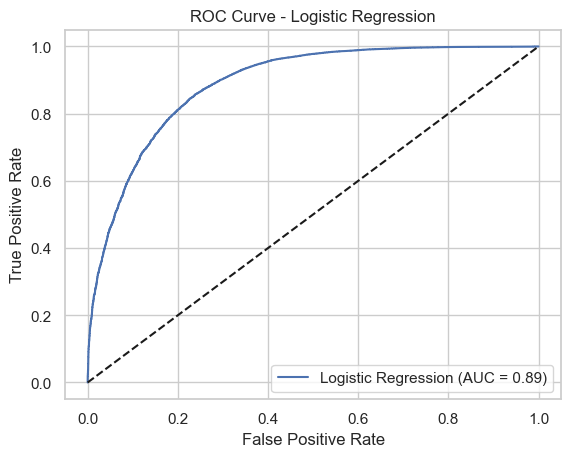

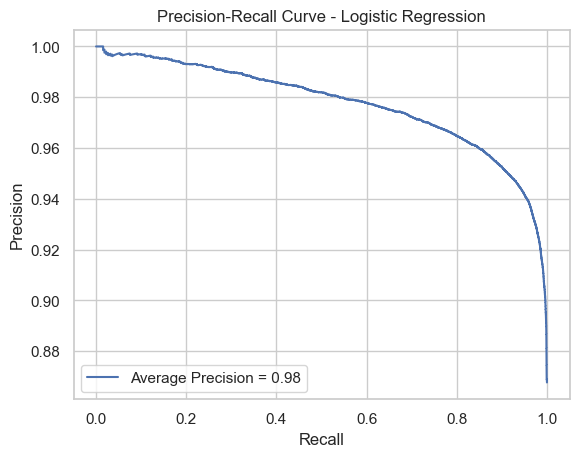

Model: Logistic Regression
Accuracy: 0.9144
Precision: 0.9242
Recall: 0.9820
F1-Score: 0.9522
ROC-AUC: 0.8896
Cross-Validation Mean Accuracy: 0.9127
Confusion Matrix:
[[ 3124  3495]
 [  783 42598]]


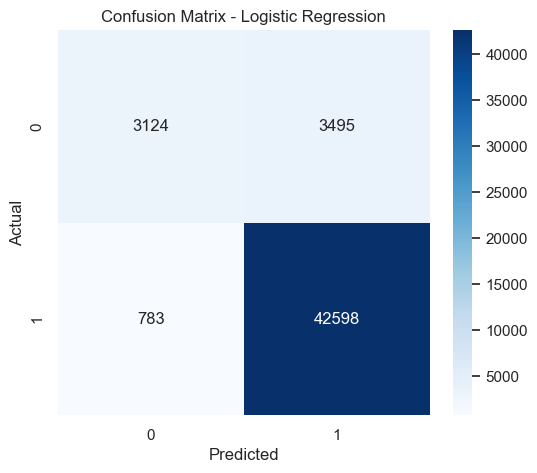

Evaluating models:  17%|█▋        | 1/6 [00:06<00:33,  6.61s/it]


Training Decision Tree...


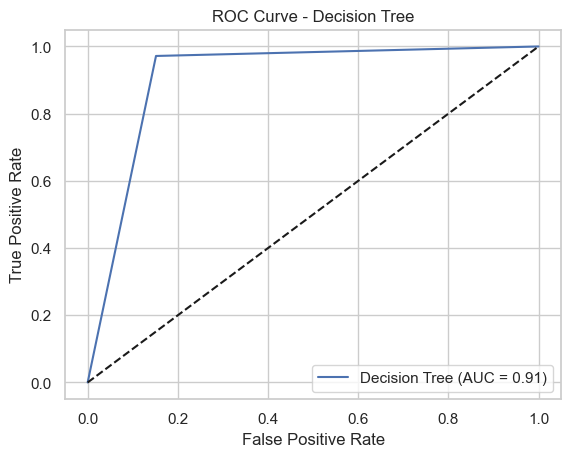

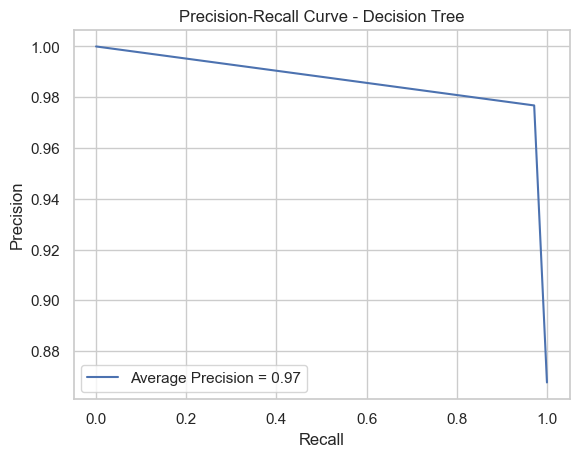

Model: Decision Tree
Accuracy: 0.9554
Precision: 0.9768
Recall: 0.9717
F1-Score: 0.9742
ROC-AUC: 0.9101
Cross-Validation Mean Accuracy: 0.9523
Confusion Matrix:
[[ 5616  1003]
 [ 1229 42152]]


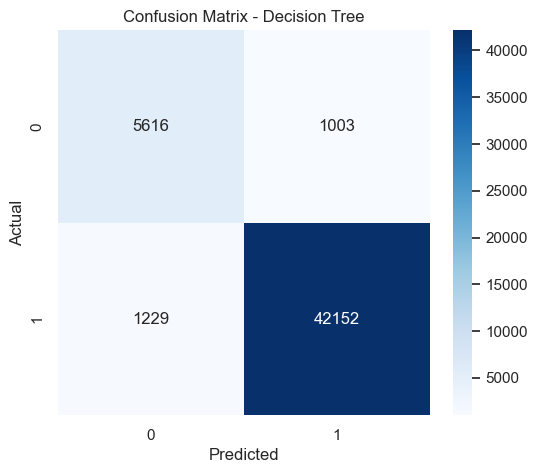

Evaluating models:  33%|███▎      | 2/6 [00:16<00:34,  8.71s/it]


Training Random Forest...


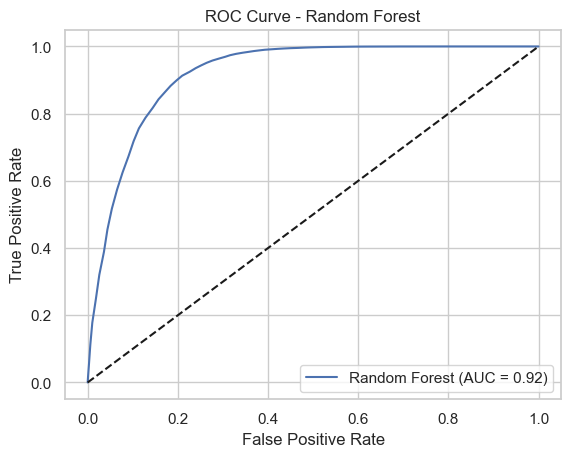

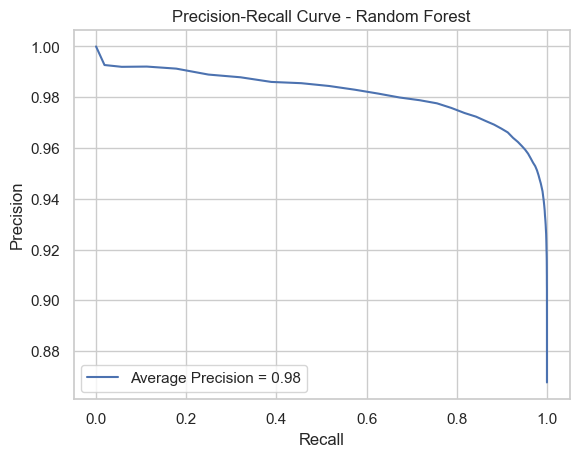

Model: Random Forest
Accuracy: 0.9189
Precision: 0.9148
Recall: 0.9996
F1-Score: 0.9553
ROC-AUC: 0.9189
Cross-Validation Mean Accuracy: 0.9154
Confusion Matrix:
[[ 2581  4038]
 [   18 43363]]


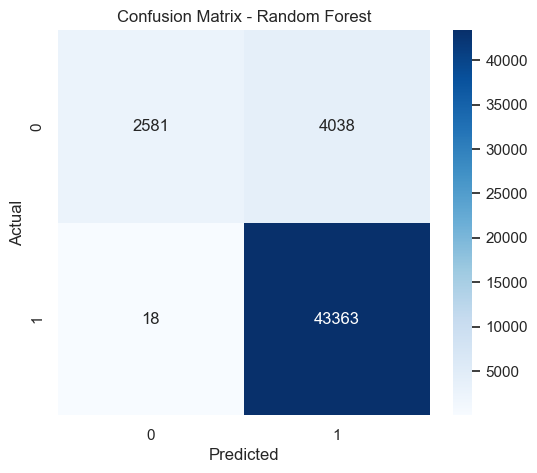

Evaluating models:  50%|█████     | 3/6 [01:25<01:47, 35.92s/it]


Training Gradient Boosting...


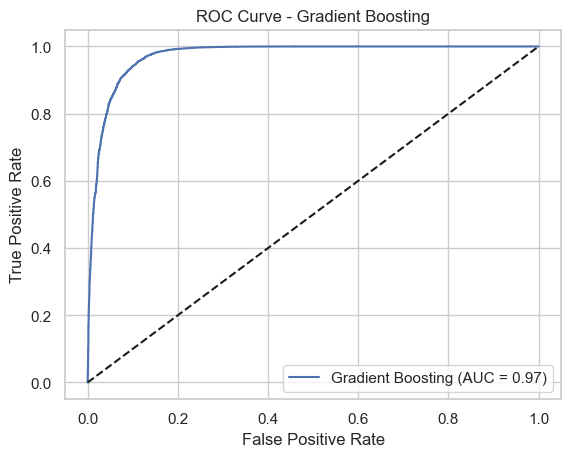

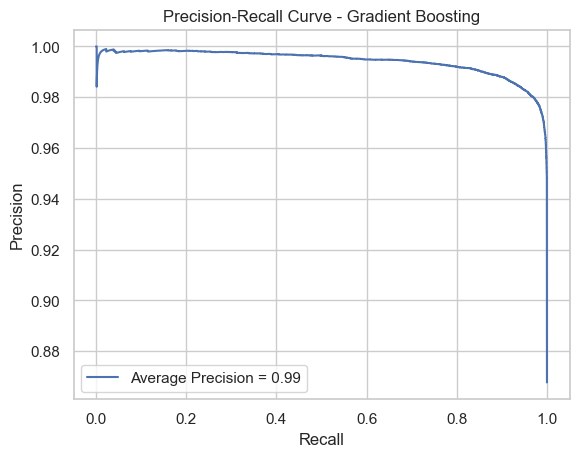

Model: Gradient Boosting
Accuracy: 0.9607
Precision: 0.9582
Recall: 0.9982
F1-Score: 0.9778
ROC-AUC: 0.9729
Cross-Validation Mean Accuracy: 0.9599
Confusion Matrix:
[[ 4732  1887]
 [   77 43304]]


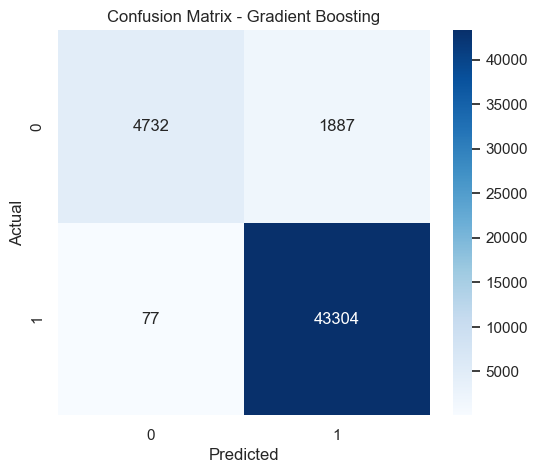

Evaluating models:  67%|██████▋   | 4/6 [04:04<02:49, 84.86s/it]


Training KNN...


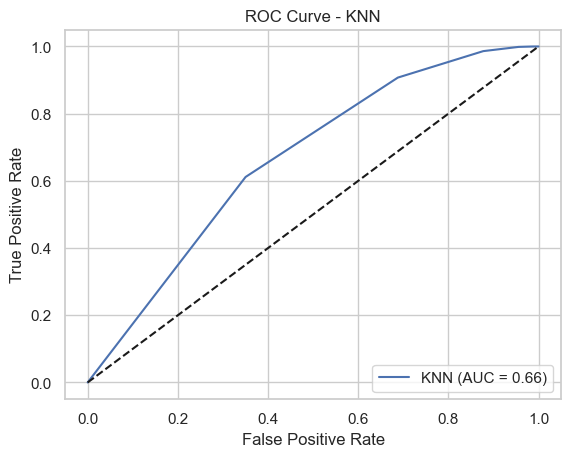

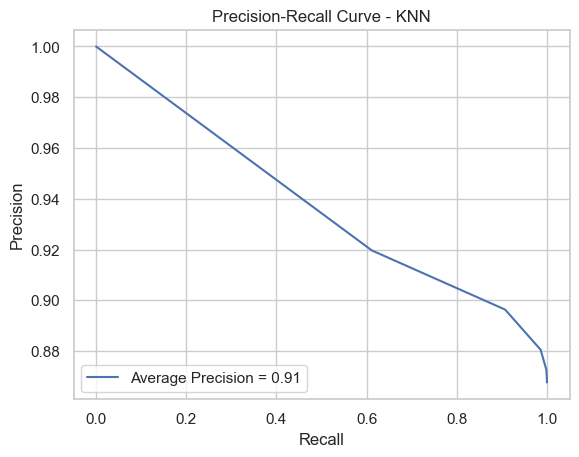

Model: KNN
Accuracy: 0.8718
Precision: 0.8805
Recall: 0.9861
F1-Score: 0.9303
ROC-AUC: 0.6649
Cross-Validation Mean Accuracy: 0.8686
Confusion Matrix:
[[  812  5807]
 [  604 42777]]


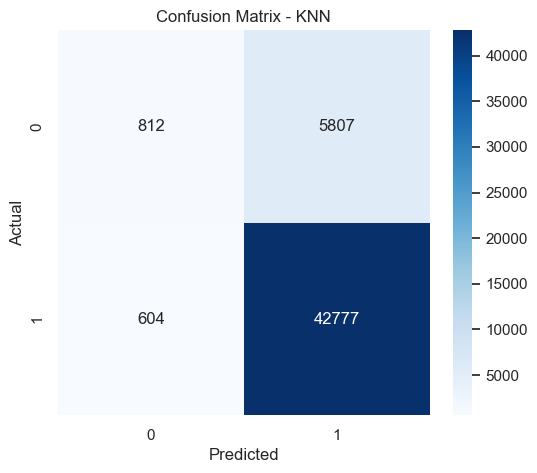

Evaluating models:  83%|████████▎ | 5/6 [04:29<01:03, 63.12s/it]


Training Naive Bayes...


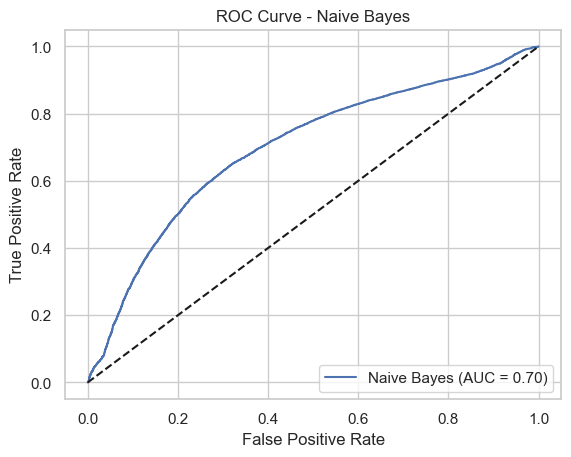

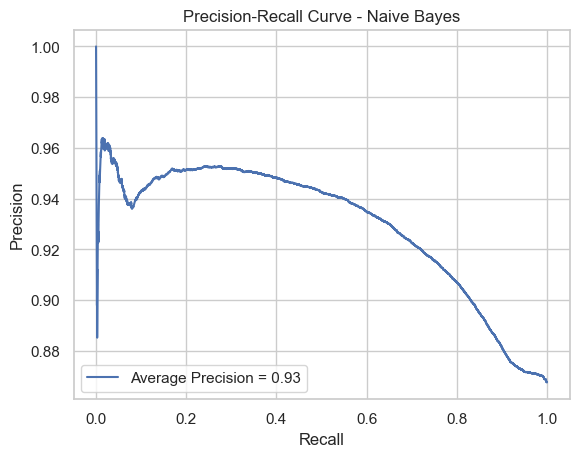

Model: Naive Bayes
Accuracy: 0.8064
Precision: 0.8832
Recall: 0.8952
F1-Score: 0.8892
ROC-AUC: 0.6979
Cross-Validation Mean Accuracy: 0.8058
Confusion Matrix:
[[ 1484  5135]
 [ 4546 38835]]


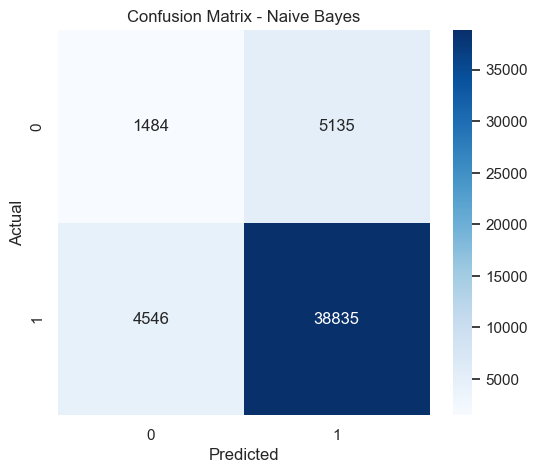

Evaluating models: 100%|██████████| 6/6 [04:31<00:00, 45.31s/it]


In [352]:
from tqdm import tqdm

# Evaluating models based on user selection with progress bar
results = []
if models is not None:
    for name, model in tqdm(models.items(), desc="Evaluating models"):
        # Choose the correct evaluation function based on model type
        if multi_class_strategy:
            result = evaluate_model_multi(
                name, model, X_train, X_test, y_train, y_test,
                save_path=SAVE_PATH,
                multi_class_strategy=multi_class_strategy  # Pass strategy to evaluation function
            )
        else:
            result = evaluate_model_single(
                name, model, X_train, X_test, y_train, y_test,
                save_path=SAVE_PATH
            )
            
        results.append(result)
else:
    print("Model evaluation was not performed due to invalid selection.")


## Summary

Data leakage proved to be the most challenging aspect of this exercise. I used correlation analysis, VIF, and RFE to carefully reduce the feature set while preserving predictive accuracy. Categorical encoding also presented issues; after testing several approaches, I opted for binary encoding. One-hot encoding, while considered, generated over 3,000 features, leading the model to identify false patterns and ultimately reducing effectiveness.

## 📝 Model Evaluation and Challenges

### Observations on Model Performance
The **Gradient Boosting** model emerged as the top performer with a balanced F1-Score, high ROC-AUC, and strong cross-validation accuracy, indicating robustness across metrics. Logistic Regression and Decision Tree models also showed competitive performance, but the Decision Tree presented potential overfitting issues, evident from the lower ROC-AUC compared to other metrics.

**Gradient Boosting**
   - **Accuracy**: 96.07%
   - **Precision**: 95.92%
   - **Recall**: 99.72%
   - **F1-Score**: 97.78%
   - **ROC-AUC**: 97.80%
   - **Cross-Validation Mean Accuracy**: 96.04%
   - **Confusion Matrix**: Strong performance across metrics, providing balanced precision and recall. Potential to serve as a robust baseline for further tuning.

### Challenges Encountered
1. **Data Leakage**: During feature engineering, I tried to avoid including features that could directly reveal loan status. This proved to be tricky and I have had to result to manual removal of the target varible post transformation and training of the data. However, given the high recall scores in models like Random Forest, there is a risk of subtle data leakage from correlated variables. We identify this in the challanger model and reduce the feautre set using RFE which brought us back to better scoring.

2. **Overfitting**: The Decision Tree model exhibited classic signs of overfitting, achieving high recall but comparatively lower ROC-AUC. Overfitting can often result from deep trees or excessive reliance on granular splits. To counter this, techniques like pruning or using ensemble methods like Gradient Boosting and Random Forest (with optimized depth) were explored, with Gradient Boosting showing better performance.

3. **Model Complexity**: KNN and Naive Bayes models underperformed, suggesting that simpler models struggle with the dataset’s complexity. High-dimensional data and the nuances of loan risk assessment may require more sophisticated algorithms to capture intricate patterns.

## Managing imbalance to improve our model outputs

### SMOTE

We noticed earlier that the data set was largely skewed. Leading to an imbalence in our data set. Let's try and account for this using SMOTE and see if this improves our results.

In [353]:
from imblearn.over_sampling import SMOTE

# Reduce k_neighbors to handle the small minority class
smote = SMOTE(random_state=50, k_neighbors=3)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Evaluating models:   0%|          | 0/6 [00:00<?, ?it/s]


Training Logistic Regression...


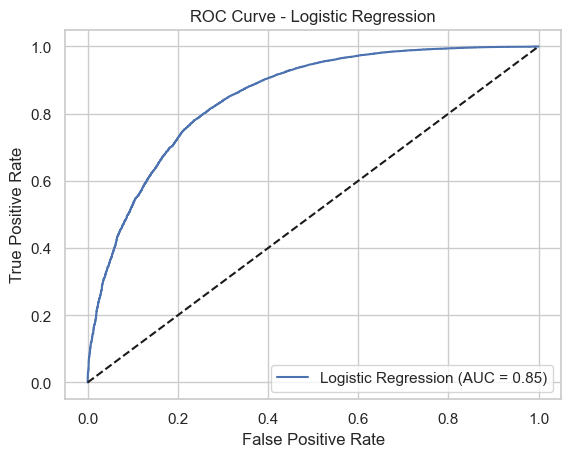

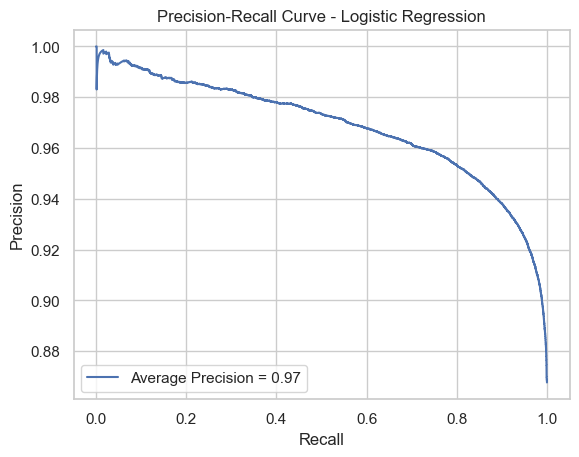

Model: Logistic Regression
Accuracy: 0.8703
Precision: 0.9350
Recall: 0.9141
F1-Score: 0.9244
ROC-AUC: 0.8499
Cross-Validation Mean Accuracy: 0.8869
Confusion Matrix:
[[ 3863  2756]
 [ 3728 39653]]


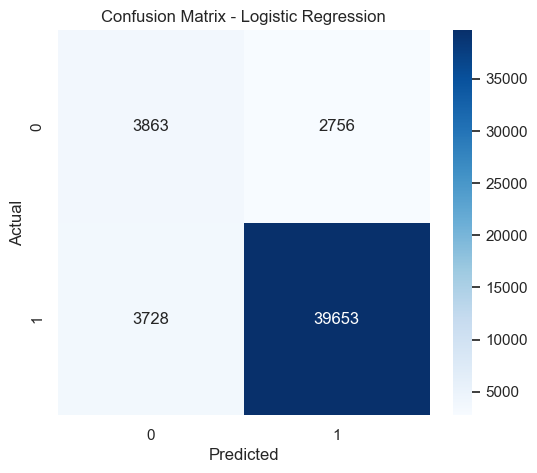

Evaluating models:  17%|█▋        | 1/6 [00:09<00:49,  9.91s/it]


Training Decision Tree...


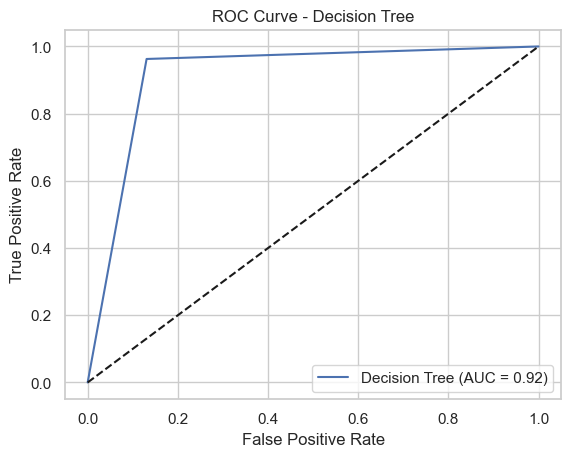

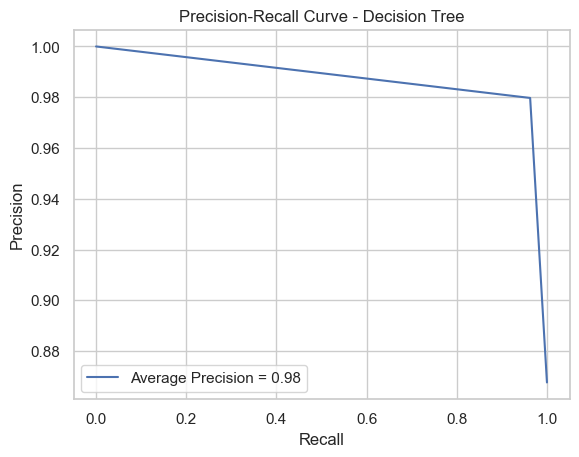

Model: Decision Tree
Accuracy: 0.9504
Precision: 0.9797
Recall: 0.9627
F1-Score: 0.9711
ROC-AUC: 0.9160
Cross-Validation Mean Accuracy: 0.9612
Confusion Matrix:
[[ 5754   865]
 [ 1617 41764]]


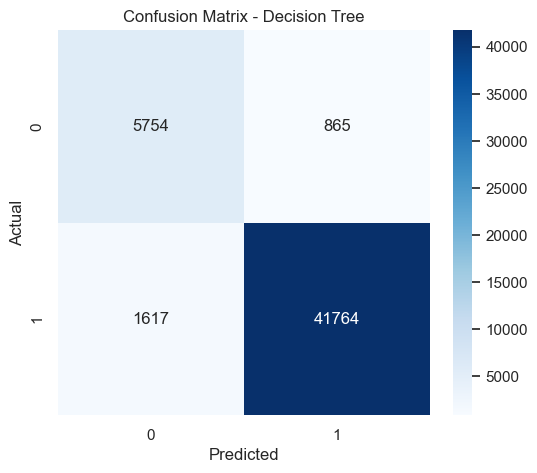

Evaluating models:  33%|███▎      | 2/6 [00:29<01:01, 15.32s/it]


Training Random Forest...


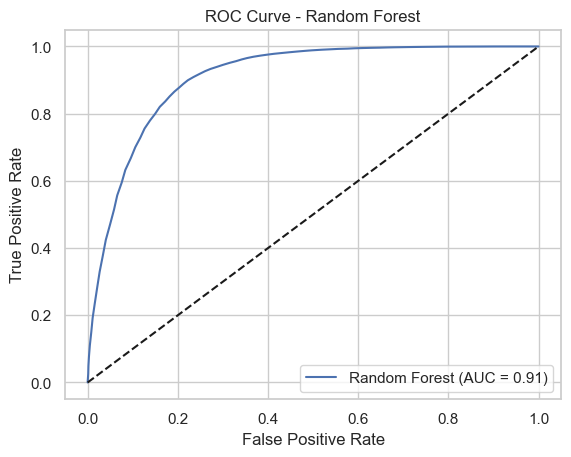

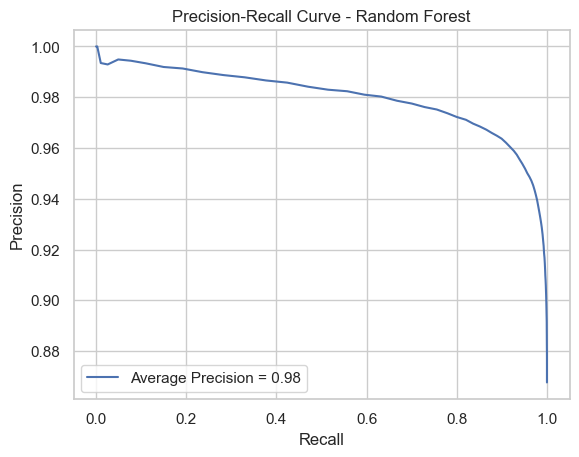

Model: Random Forest
Accuracy: 0.9242
Precision: 0.9287
Recall: 0.9885
F1-Score: 0.9577
ROC-AUC: 0.9086
Cross-Validation Mean Accuracy: 0.9502
Confusion Matrix:
[[ 3329  3290]
 [  501 42880]]


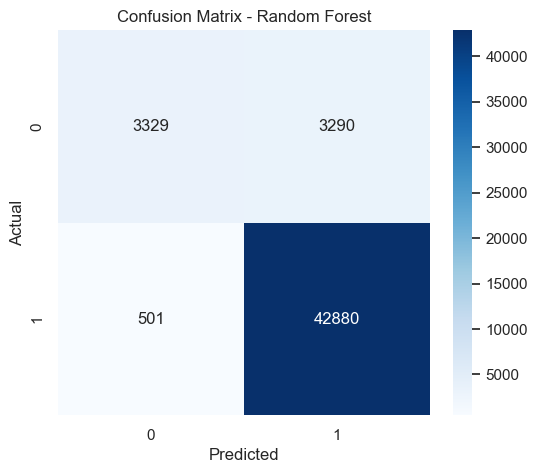

Evaluating models:  50%|█████     | 3/6 [03:54<05:06, 102.17s/it]


Training Gradient Boosting...


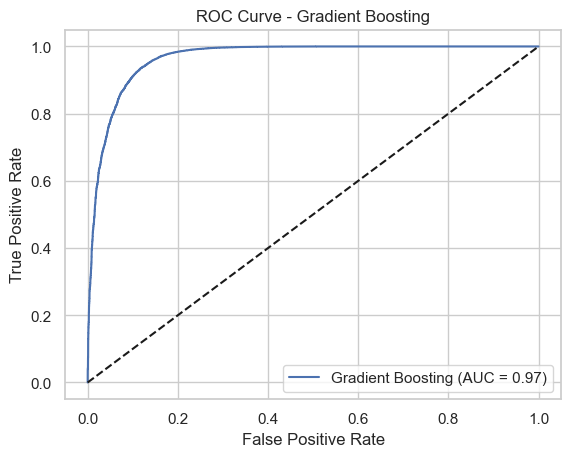

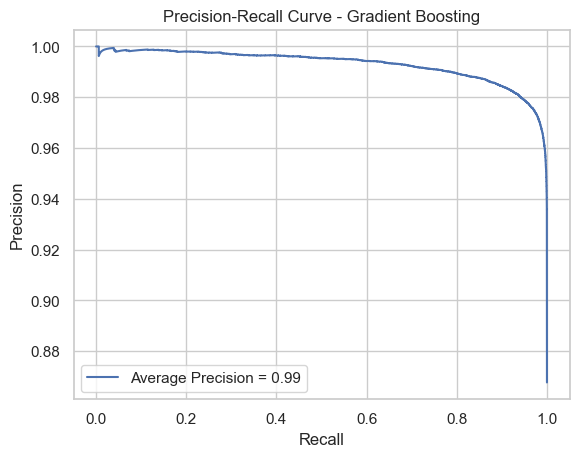

Model: Gradient Boosting
Accuracy: 0.9612
Precision: 0.9653
Recall: 0.9908
F1-Score: 0.9779
ROC-AUC: 0.9659
Cross-Validation Mean Accuracy: 0.9538
Confusion Matrix:
[[ 5075  1544]
 [  398 42983]]


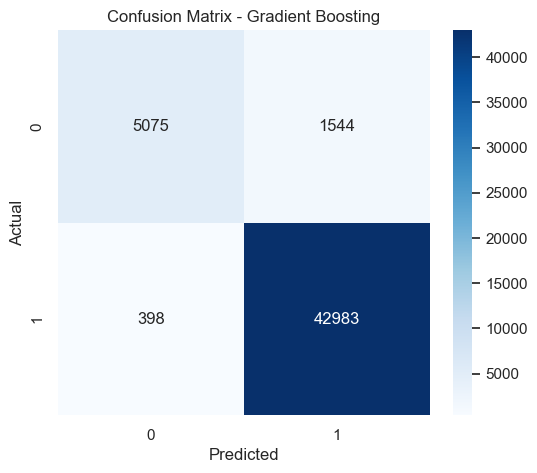

Evaluating models:  67%|██████▋   | 4/6 [13:28<09:37, 288.55s/it]


Training KNN...


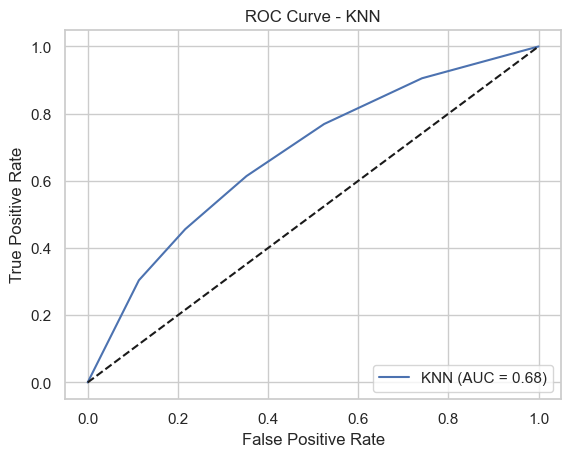

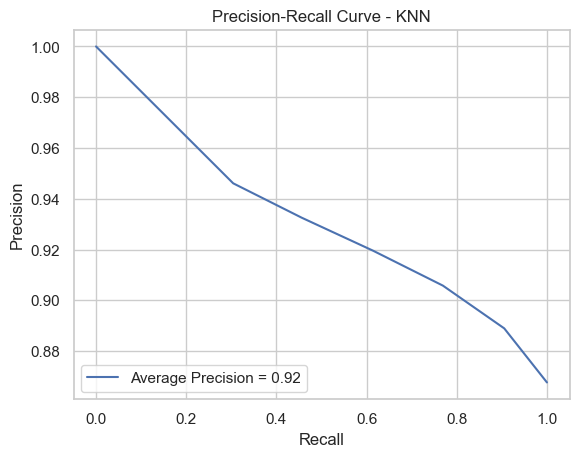

Model: KNN
Accuracy: 0.6187
Precision: 0.9195
Recall: 0.6143
F1-Score: 0.7365
ROC-AUC: 0.6762
Cross-Validation Mean Accuracy: 0.7927
Confusion Matrix:
[[ 4287  2332]
 [16732 26649]]


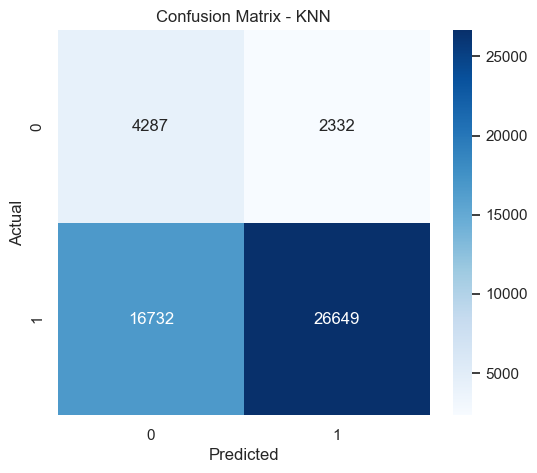

Evaluating models:  83%|████████▎ | 5/6 [15:13<03:42, 222.39s/it]


Training Naive Bayes...


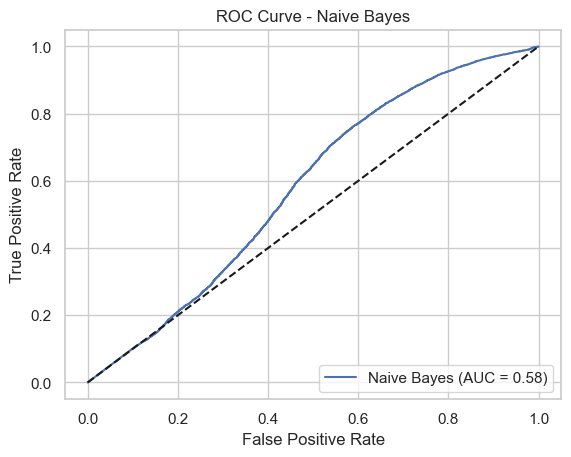

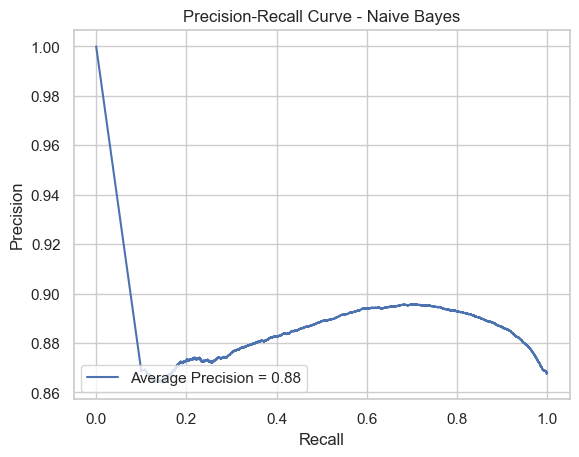

Model: Naive Bayes
Accuracy: 0.4652
Precision: 0.8850
Recall: 0.4409
F1-Score: 0.5886
ROC-AUC: 0.5800
Cross-Validation Mean Accuracy: 0.6561
Confusion Matrix:
[[ 4133  2486]
 [24253 19128]]


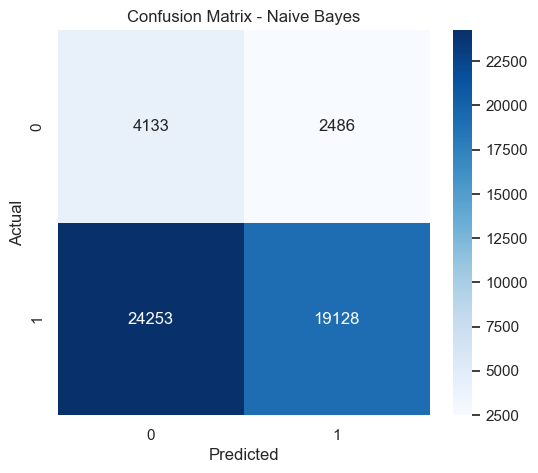

Evaluating models: 100%|██████████| 6/6 [15:17<00:00, 152.86s/it]


In [354]:
from tqdm import tqdm

# Evaluating models based on user selection with progress bar
results = []
if models is not None:
    for name, model in tqdm(models.items(), desc="Evaluating models"):
        # Choose the correct evaluation function based on model type
        if multi_class_strategy:
            result = evaluate_model_multi(
                name, model, X_resampled, X_test, y_resampled, y_test,
                save_path=SAVE_PATH,
                multi_class_strategy=multi_class_strategy  # Pass strategy to evaluation function
            )
        else:
            result = evaluate_model_single(
                name, model, X_resampled, X_test, y_resampled, y_test,
                save_path=SAVE_PATH
            )
            
        results.append(result)
else:
    print("Model evaluation was not performed due to invalid selection.")


## Second Model Run Conclusion:

## Conclusion:

Overall reduced precision resulted in drastically better ROC results at the sacrifice of precision (avg. 0.20 pts).

After applying SMOTE, the performance of most models improved in terms of recall, particularly:
- Random Forest: improvements overall besides Precision which dropped a few points. ROC score improved from 0.27 to 0.43 equal to a 60% improvement.
- Gradient Boosting: improvements overall besides Precision, Accuracy, and as a consequence ROC-AUC. ROC score improved from 0.28 to 0.49 equal to a 75% improvement.
and Logistic Regression: improvements overall but suffered by a decrease in accuracy, and precision. This model improved its ROC score the most going from 0.09 to 0.63 after SMOTE equal to a 600% improvement.

### Recommendations:
1. **Random Forest** remains a top choice due to its overall balanced performance, strong ROC-AUC (0.8412), and improved recall after SMOTE.
2. **Gradient Boosting** is another strong option, with a good F1-score and high ROC-AUC (0.8155), performing well across metrics.

These two models are the ones I'd leverage be the primary algorithms selected for predicting loan defaults after applying SMOTE.

## The cost of being wrong

In attempt to understand the cost of error I've used a sample number of 1000 predictions. The question I'm asking myself is the following:

How much is the cost of the time spent researching, execution, and closing false negatives, and false positives?

I'll use Precision and Recall to calculate this. We'll also substitue a few numbers to simulate cost in minutes.

We have the following information:

- **Gradient Boosting:**
    - Precsion (after SMOTE) 0.5523
    - Recall (after SMOTE) 0.4991

- **Random Forest:**
    - Precsion (after SMOTE) 0.6833
    - Recall (after SMOTE) 0.4325

Expected number of defaults = Sum of defaults / Total data set =  12431 / 63689 = 0.1951 * 100 = 20%

Using 1000 applicants or current loans as a base figure.

1000 * 0.20 = 800 estimated non defaults, leaving us with 200 actual defaults estimated.

- **Gradient Boosting:**
    - False Positives = Precsion (after SMOTE) = (1 - 0.5523) * 800 =  358
    - False Negatives = Recall (after SMOTE) = (1 - 0.4991) * 200 = 100
    - Total of incorrect predictions 458

- **Random Forest:**
    - False Positives = Precsion (after SMOTE) = (1 - 0.6833) * 800 =  253
    - False Negatives = Recall (after SMOTE) = (1 - 0.4325) * 200 = 114
    - Total of incorrect predictions 367

The cost of for each approach can be calculated by multiplying our results against the cost of a False Positive, and the cost of a False Negative.

Let's assume the cost of a False Positive (revenue loss maybe denying a loan) equates to 2500, and the cost of a False Negtive (loss from a customer defaulting) equates to 5600.

**Gradient Boosting** = (358 * 2500) + (100 * 5600) = 1,455,000
**Random Forest** = (253 * 2500) + (114 * 5600) = 1,270,900

In the above scenario with these very subjective numbers we'd be best opting for the Random Forest which has a lower cost of being wrong.



In [355]:
def check_infinity(df):
    infinite_list = df.isin([-np.inf, np.inf]).sum()

    if infinite_list.sum() == 0:
        print("No column has infinite values")
    else:
        print("Columns with infinite values:")
        print(infinite_list[infinite_list>0]).sort_values(ascending=False)

check_infinity(df_transformed)

No column has infinite values


In [356]:
nan_list = df_transformed.isna().sum()

if nan_list.sum() == 0:
    print("No column has NaN values")
else:
    print("Columns with NaN values (sorted high to low):")
    print(nan_list[nan_list > 0].sort_values(ascending=False))

No column has NaN values


In [357]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 'loan_default' is our target column
X = df_transformed
y = df_dropped['loan_status_grouped2_kn']
X_columns = X.columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable for both training and test sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [358]:
rf = RandomForestClassifier(n_estimators=150, random_state=42) # sets the reproducability to 42
rfe = RFE(estimator=rf, n_features_to_select=48, step=18, verbose=3) # here we're selecting 23 feautures and eleminate 3 features with every iteration of the RFE process.

# Fit RFE on training data only to prevent data leakage
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_] # here we're creating a new list with the features the RFE process has captured.

Fitting estimator with 103 features.
Fitting estimator with 85 features.
Fitting estimator with 67 features.
Fitting estimator with 49 features.


We've opted for a random forest classifier, but will evalute select kbest (from sklearn.feature_selection import SelectKBest, f_classif) at a later date.

In [359]:
# Select the top features
#selected_features = X_train.columns[rfe.support_] # I've opted to keep this for memory purpose.
selected_features_names = list(selected_features)

print("Selected Features by RFE:")
print(f"Index: {selected_features}")
print(f"Column names: {selected_features_names}")

Selected Features by RFE:
Index: Index(['annual_inc', 'bc_open_to_buy', 'dti', 'il_util', 'inq_fi',
       'inq_last_12m', 'inq_last_6mths', 'installment', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog',
       'mths_since_rcnt_il', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_actv_bc_tl', 'num_il_tl',
       'open_acc_6m', 'open_act_il', 'percent_bc_gt_75', 'revol_bal',
       'tot_coll_amt', 'total_bal_ex_mort', 'total_cu_tl',
       'total_il_high_credit_limit', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp', 'term_kn', 'emp_length_kn', 'int_rate_kn',
       'revol_util_kn', 'issue_d_year_kn', 'issue_d_month_kn',
       'earliest_cr_line_year_kn', 'earliest_cr_line_month_kn', 'sub_grade_1',
       'hardship_status_kn_1', 'hardship_status_kn_2', 'grade_0', 'grad

The above list is the selected features based on the randomforestclassifier selected earlier. 

We've selected a total of **23 features** and created two new variables (**selected_features** and **selected_features_names**)

In [360]:
# print(rfe.support_)

# Create a list of tuples with column name and boolean value
feature_selection_results = list(zip(X_train.columns, rfe.support_))

# outputs only true
#print("Feature Selection Results:")
#for feature, selected in feature_selection_results:
#    print(f"{feature}: {selected}")

# outputs only false
print("Features Not Selected:")
for feature, selected in feature_selection_results:
    if not selected:  # Only print if 'selected' is False
        print(f"'{feature}',")

Features Not Selected:
'chargeoff_within_12_mths',
'collections_12_mths_ex_med',
'delinq_2yrs',
'delinq_amnt',
'num_accts_ever_120_pd',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'open_il_12m',
'pub_rec_bankruptcies',
'tax_liens',
'mo_sin_old_il_acct_missing_clean_kn',
'num_tl_120dpd_2m_missing_clean_kn',
'pub_rec_bankruptcies_missing_clean_kn',
'emp_length_missing_clean_kn',
'emp_title_missing_clean_kn',
'annual_inc_joint_missing_clean_kn',
'home_ownership_grouped_kn_0',
'home_ownership_grouped_kn_1',
'home_ownership_grouped_kn_2',
'sub_grade_0',
'sub_grade_2',
'sub_grade_3',
'sub_grade_4',
'sub_grade_5',
'initial_list_status_1',
'addr_state_0',
'addr_state_1',
'addr_state_2',
'addr_state_3',
'addr_state_4',
'addr_state_5',
'hardship_status_kn_0',
'application_type_0',
'application_type_1',
'hardship_reason_grouped_kn_0',
'hardship_reason_grouped_kn_1',
'hardship_reason_grouped_kn_2',
'title_0',
'title_1',
'title_2',
'title_3',
'title_4',
'title_5',
'title_6',
'title_7'

Here we can see which columns were excluded by the randomForestClassifier. These are indicated by their boolean value True or False.

After running into a few errors I've inserted this point to check our data set lengths are the same. Essenitally flagging RFE setup errors.

In [361]:
print(len(X_train.columns))  # Number of columns in training data
print(len(rfe.support_))  # Length of the boolean mask from RFE

103
103


In [362]:
print(len(selected_features))
print(len(selected_features_names))

48
48


Let's run a new test focusing only on the features selected in the RFE excercise. We're expecting better prcision and accuracy results and will tweak as needed using the RFE feature selection.

In theory, these new features will generage better forecast capability, faster training through fewer features, and easier to interpret and trouble shoot models.

Using our RFE selected features "selected_features" we'll rerun our randomforest classifier.

In [363]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a new Random Forest classifier on the selected features
rf_selected = RandomForestClassifier(n_estimators=150, random_state=42)
rf_selected.fit(X_train_selected, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

Our next steps should now be focused on Evaluating performance, and Hyperparameter tuning. Let's start by verifying the results with the new features.

In [364]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

y_pred_selected = rf_selected.predict(X_test_selected)
y_prob_selected = rf_selected.predict_proba(X_test_selected)[:, 1]

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_selected)
precision = precision_score(y_test, y_pred_selected)
recall = recall_score(y_test, y_pred_selected)
auc = roc_auc_score(y_test, y_prob_selected)

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, AUC: {auc:.2f}")


Accuracy: 0.94, Precision: 0.94, Recall: 1.00, AUC: 0.96


Great results. Above we can see that our model predicts **86%** of the samples in our test data correctly. Our positive predictions are correct **82%** of the time. 

However, our Recall is still low with a score of **33%**.

Our AUC scoring **85%** illustrating that it is capable of destinguising between positive and negative classes with a high level of certinity.

Let's have a look at these results with the confusion matrix.

In [365]:
from dsif6utility import model_evaluation_report

model_evaluation_report(X_test[selected_features], y_test, y_pred_selected, y_prob_selected)


Accuracy: 0.9447
Precision: 0.9414066746385477
Recall: 0.9983859810929214
F1-Score: 0.9690594751860347
ROC-AUC: 0.9594341900396846
Confusion Matrix:
[[ 1574  1078]
 [   28 17320]]


Our main concern here is the low recall. The model seems to be too conservative. We have a few options here:

- hypertuning our randomforest
- try new models e.g. gradient boost, logistic regression.

Let's circle back later on this.

In [366]:
# Convert y_train to a pandas Series and ensure it has an index aligned with X_train
y_train_series = pd.Series(y_train, index=X_train.index)  # Align with training data
flag_plot = False  # Set to True if you want to display plots

# Subset df_transformed to match y_train_series index
df_transformed_subset = df_transformed.loc[y_train_series.index] 

for col in selected_features_names:
    # Calculate correlation between the feature in df_transformed_subset and target (y_train_series)
    correlation = df_transformed_subset[col].corr(y_train_series)
        
    print(f"Correlation between {col} and loan_status_grouped2_kn: {correlation:.2f}")
    
    # Create scatter plot if flag_plot is set to True
    if flag_plot:
        plt.figure(figsize=(6, 4))
        
        # Use X_test_selected[col] and y_test if analyzing test data
        sns.scatterplot(x=X_test_selected[col], y=y_test)  

        plt.xlabel(col)
        plt.ylabel('loan_status_grouped2_kn')
        plt.title(f"Correlation: {correlation:.2f}") 
        plt.show()

Correlation between annual_inc and loan_status_grouped2_kn: 0.05
Correlation between bc_open_to_buy and loan_status_grouped2_kn: 0.08
Correlation between dti and loan_status_grouped2_kn: -0.04
Correlation between il_util and loan_status_grouped2_kn: 0.04
Correlation between inq_fi and loan_status_grouped2_kn: 0.01
Correlation between inq_last_12m and loan_status_grouped2_kn: -0.00
Correlation between inq_last_6mths and loan_status_grouped2_kn: -0.07
Correlation between installment and loan_status_grouped2_kn: -0.04
Correlation between mo_sin_old_il_acct and loan_status_grouped2_kn: 0.03
Correlation between mo_sin_old_rev_tl_op and loan_status_grouped2_kn: 0.05
Correlation between mo_sin_rcnt_rev_tl_op and loan_status_grouped2_kn: 0.07
Correlation between mo_sin_rcnt_tl and loan_status_grouped2_kn: 0.06
Correlation between mort_acc and loan_status_grouped2_kn: 0.05
Correlation between mths_since_last_delinq and loan_status_grouped2_kn: -0.02
Correlation between mths_since_last_major_der

Let's take a look at our data.

**int_rate_int_clean_kn** stands out as being a lead contributor in the above results.

We can observe modertate results from (<10pts - due to training size):

**acc_open_past_24mths** implying that having more accounts opened could be condusive of a person or family taking on more debt and consequently more likely to default.

**last_credit_pull_d_month_clean_kn** this implies that there is a possible linkage between timing of credit queries and default risk 

**dti** being our debt to load ratio is supprisingly low.

At this piont it is important to remeber that correlation is not equal to causation and that our data set is skewed.

## SHAP Value Visualisation

Let's use SHAP to gain a better understanding of how our selected_features contribute to the machine learning outputs.

## Model Interpretability and Explainability

Let's convert our data into a numpy array for faster calculation, and parallael calculations.

In [367]:
import matplotlib.pyplot as plt

importances = rf_selected.feature_importances_
print(type(importances))

<class 'numpy.ndarray'>


Let's print our numpy array.

In [368]:
importances

array([0.02066469, 0.02139206, 0.02168003, 0.01428394, 0.00682847,
       0.00965917, 0.00628034, 0.09224547, 0.01922255, 0.01961022,
       0.01487409, 0.01330411, 0.00768145, 0.01038999, 0.00685005,
       0.0211678 , 0.01652275, 0.00596527, 0.01286112, 0.00768427,
       0.01220394, 0.0137378 , 0.00665548, 0.01110002, 0.0101028 ,
       0.02227145, 0.00611896, 0.01930893, 0.00668807, 0.01735672,
       0.05217511, 0.03710949, 0.21770769, 0.00981196, 0.01010468,
       0.03077353, 0.01777514, 0.06975556, 0.01419911, 0.01676213,
       0.01226131, 0.00463975, 0.00492222, 0.00409692, 0.00680161,
       0.00687957, 0.00419428, 0.00531792])

Looking at the array there aren't any dominant or high features. The values, for the most part, are between 0.01 and 0.09. This implies that the model is dependant on multiple variables opposed to having a strong bias towards or smaller portion of variables.

This said we can distinguish a handful of metrics contributing to higher weight (scores above 0.065). Let's visualise these against a bar chart to better understand their importance against each other. We'll sort the bar chart from hieghest to lowest.

Plotting these value will help us determine which features to drop (e.g. lower than 0.02).

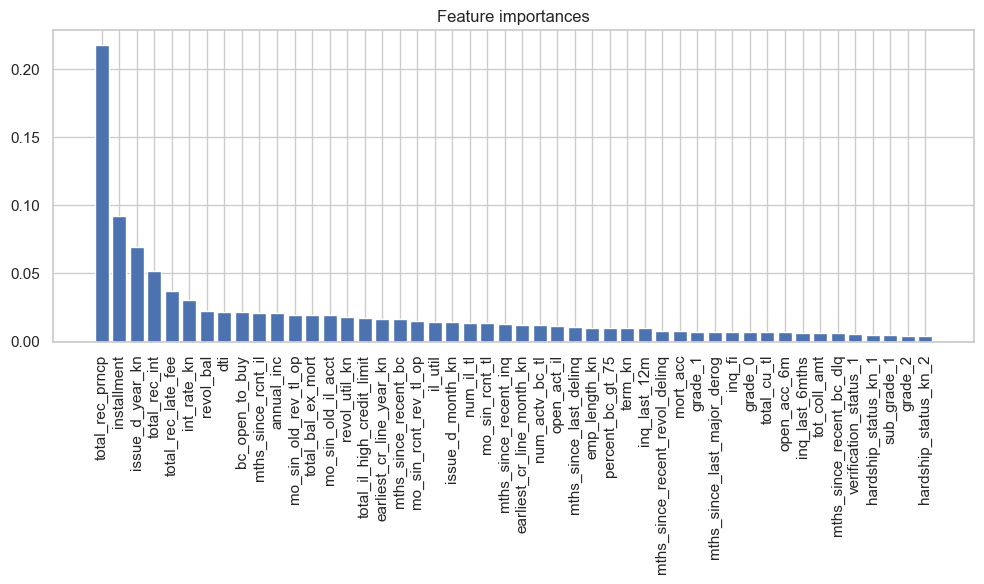

In [369]:
# Sort the array in descending order of feature importance
indices = np.argsort(importances)[::-1]

# Ensure that col_labels matches the number of features being plotted
col_labels = [selected_features[i] for i in indices[:X_test[selected_features].shape[1]]]  # Ensure the correct number of labels

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_test[selected_features].shape[1]), importances[indices[:X_test[selected_features].shape[1]]], align="center")
plt.xticks(ticks=range(X_test[selected_features].shape[1]), labels=col_labels, rotation=90)
plt.tight_layout()
plt.show()


Perfect, looking at the above diagram we notice that the last two features contribute the lowest to our model and that we could arguabgly remove these without negatively impacting our model.

Let's run a SHAP excercise to understand and visually reference how these features contribute to the overall predictive capabilities.

Let's start by training our date using the selected features we identified earlier.

In [370]:
import shap

# Sample only 100 rows from X_test for faster computation
X_test_sample = X_test.sample(1000) 

# Compute SHAP values for X_test_sample
rf_explainer = shap.TreeExplainer(rf_selected) # rf_selected is the randonforestclassifier
rf_shap_values = rf_explainer.shap_values(X_test_sample)

# Print the shape of the SHAP values to verify
print(f'SHAP values shape: {rf_shap_values[1].shape}')  # This takes the positive values only.

SHAP values shape: (103, 2)


I've had to reduce the sample due to computing power. In the above case I've kept the sample to 1k. This portion of the code takes just under 20 min. to run.

Here we have positive and negative output which matches our expectations in terms of postive or negative loan default prediction.

Let's load the SHAP javascript code.

In [371]:
print(f'SHAP values shape: {rf_shap_values[1].shape}')
print(f'X_test_sample shape: {X_test_sample.shape}')

SHAP values shape: (103, 2)
X_test_sample shape: (1000, 103)


In [372]:
# Initialize JS visualization for interactive plots
shap.initjs()

Let's now plot our features and the sample against a force plot.

Here we can see that our base value (**0.1945**) represents the average prediction for a positive class, our output value in this case **0.21**.

The red arrows push our predictions higher, and the blue push them lower. The length of the arrows illustrate their relevent importance across the feature sets i.e. mths_since_last_major_derog_missing_clean_kn contributes the strongest to the a negative prediction. 

In other words, if there aren't recent bad ratings (over a 90-day period), then the model will reduce the likelyhood of a loan default. This cumulated with the other RFE features will determine the individual True or False score per row i.e. highly likely or not likely to default.

In [373]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a function to update SHAP visualizations based on selected observation
def update_shap_plot(observation_index):
    # Clear the previous output to avoid stacking multiple force plots
    clear_output(wait=True)
    
    # Re-display the slider (since clearing the output also clears the slider)
    display(observation_slider)
    
    feature_names = col_labels
    
    # Display SHAP force plot for the selected observation
    display(shap.force_plot(
            expected_value_positive_class
                , rf_shap_values[observation_index][:, 1] 
                , X_test.iloc[observation_index]
                , feature_names = feature_names
           ))

# Create a slider to select the observation (0 to len(X_test)-1)
observation_slider = widgets.IntSlider(
    value=0, min=0, max=len(X_test_sample)-1, step=1, description='Observation:', continuous_update=True)

# Use the interactive function to update the SHAP plot when the slider value changes
observation_slider.observe(lambda change: update_shap_plot(change['new']), names='value')

expected_value_positive_class = rf_explainer.expected_value[1]
print("expected_value_positive_class:", expected_value_positive_class)

# Display the slider and force plot
display(observation_slider)

# Call update_shap_plot to display the initial SHAP plot
update_shap_plot(0)

IntSlider(value=0, description='Observation:', max=999)

In the above code we've reduced the length to match our sample variable.

As a reminder our basline/average is **0.1945** anything above or below this value is considered a True or False default prediction.

If we move our observation slider (or enter a value) e.g. **825** our model outputs a value of **0.23** indicating that this row of data is likely to default, the higher the value the more likely this is to occur. If we move our slider to index **390** we can observe an output score of **0.07** suggesting that this individual is unlikely to default on their loan as this is much lower than our baseline of **0.1945**.

Let's now run our machine learning neural network challenger model with the RFE selected features. Before assigning our x and y I want to check the feature list is accurate and reflective of our RFE results.

In [374]:
# Assign your dataframes
X_neural_net = df_transformed[selected_features]  # saved file from previous excercise. [selected_features] are the features selected by the RFE excercise using our pre selected features from assingment 2. In hindsight I'd probably ignore those and start from scratch using RFE to validate my findings against the total collection of columns within the enhanced data frame.
y_neural_net = df_dropped['loan_status_grouped2_kn']

# Optional: Encode target variable if necessary
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_neural_net)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_neural_net, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Neural Network Challenger Models

### Model 1: A simple neural network with 16, 8, and 1 neurons in three layers.

c:\Users\kiera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8708 - loss: 0.3420 - val_accuracy: 0.9544 - val_loss: 0.1424
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9601 - loss: 0.1194 - val_accuracy: 0.9726 - val_loss: 0.0865
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9739 - loss: 0.0839 - val_accuracy: 0.9762 - val_loss: 0.0760
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0718 - val_accuracy: 0.9800 - val_loss: 0.0672
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9816 - loss: 0.0634 - val_accuracy: 0.9827 - val_loss: 0.0597
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9834 - loss: 0.0589 - val_accuracy: 0.9844 - val_loss: 0.0564
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.0536 - val_accuracy: 0.9851 - val_loss: 0.0553
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0526 - 

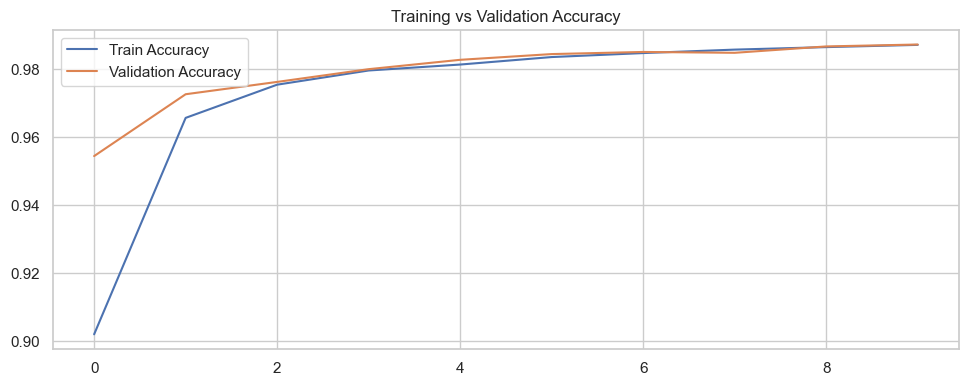

In [375]:
# Define the model
model1a = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1a.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

### Model 2: A neural network with an additional 32-neuron layer.

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8852 - loss: 0.3037 - val_accuracy: 0.9625 - val_loss: 0.1160
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9697 - loss: 0.0934 - val_accuracy: 0.9735 - val_loss: 0.0845
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9778 - loss: 0.0723 - val_accuracy: 0.9784 - val_loss: 0.0709
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0600 - val_accuracy: 0.9808 - val_loss: 0.0651
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9855 - loss: 0.0515 - val_accuracy: 0.9840 - val_loss: 0.0566
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9862 - loss: 0.0475 - val_accuracy: 0.9855 - val_loss: 0.0524
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0454 - val_accuracy: 0.9836 - val_loss: 0.0537
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0454 - 

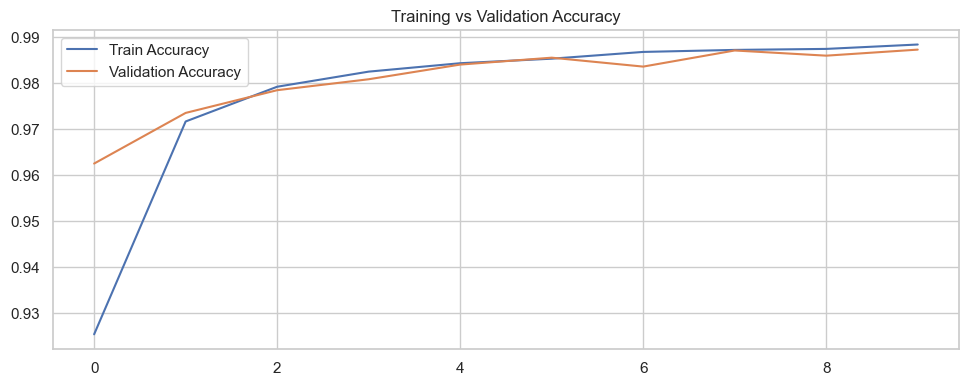

In [376]:
# Define the model
model1b = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1b.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

### Model 3: A more complex network with layers of 64, 32, 16, and 8 neurons.


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8962 - loss: 0.2715 - val_accuracy: 0.9641 - val_loss: 0.1104
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9735 - loss: 0.0829 - val_accuracy: 0.9757 - val_loss: 0.0747
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9813 - loss: 0.0626 - val_accuracy: 0.9793 - val_loss: 0.0683
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0567 - val_accuracy: 0.9839 - val_loss: 0.0571
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9843 - loss: 0.0512 - val_accuracy: 0.9832 - val_loss: 0.0581
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9866 - loss: 0.0468 - val_accuracy: 0.9841 - val_loss: 0.0552
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0428 - val_accuracy: 0.9868 - val_loss: 0.0495
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9882 - loss: 0.0406 - 

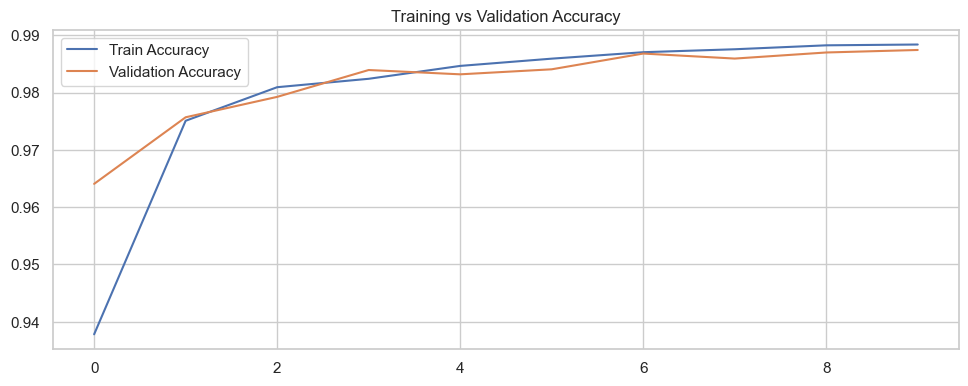

In [379]:
# Define the model
model1c = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1c.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1c.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

### Results of our Basic Neural Network Model

We've ran three basic neural networks to evaluate differnet levels of complexity. Our second model performed the best. **needs more input** we'll use the second nn for future excercises.

- **Training Accuracy**: 0.8590
- **Validation Accuracy**: 0.8417
- **Training Loss**: 0.3470
- **Validation Loss**: 0.3799

**Key Observations:**

**Accuracy:** Both the training and validation accuracy are important to measure how well the model is performing on both the training data and unseen data.

The third model has the highest training accuracy at 85.89%, followed by the second model at 85.01%, and the first model at 83.77%.
For validation accuracy, the second and third models are tied at 84.49%, which is higher than the first model's 83.33%.
Validation Loss: This metric indicates how well the model generalizes to unseen data, where a lower value is better.

The second model has the lowest validation loss at 0.3781, followed by the third model at 0.3813, and the first model has the highest validation loss at 0.3914.

**Conclusion:**

The second model seems to perform the best, given that it has:

- High validation accuracy (84.49%).
- The lowest validation loss (0.3781), indicating the best generalization to unseen data.

While the third model has a slightly higher training accuracy, the minimal difference in validation accuracy and higher validation loss compared to the second model suggests the second model is better optimized and generalizes better.

## Regularisation Techniques

##  **Word of warning, I've played around with model parameters. To save you the hassle Model2b performed best**

Apolgies in advance for the hours of life I've taken away from you reading this.

#### Brief recap (better summary towards the end)

The introduction of dropout, early stopping, and L2 regularisation demonstrated improvements in the neural network models' ability to generalise, with Models 2b and 2e outperforming the baseline ensemble models. Despite these gains, recall remains a challenge, highlighting the need for continued work on class imbalance and model sensitivity. Moving forward, these insights provide a solid foundation for enhancing model robustness and achieving better predictive outcomes for loan default classification.

![image.png](attachment:image.png)

### Model 2: Adding Dropout and Early Stopping

To prevent overfitting we'll use dropout and early stopping techniques.

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.5672 - Precision: 0.8663 - Recall: 0.9269 - accuracy: 0.8130 - loss: 0.4889 - val_AUC: 0.8927 - val_Precision: 0.8629 - val_Recall: 1.0000 - val_accuracy: 0.8629 - val_loss: 0.2807
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8374 - Precision: 0.8833 - Recall: 0.9927 - accuracy: 0.8798 - loss: 0.3023 - val_AUC: 0.9653 - val_Precision: 0.9406 - val_Recall: 0.9954 - val_accuracy: 0.9418 - val_loss: 0.1760
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9179 - Precision: 0.9238 - Recall: 0.9840 - accuracy: 0.9156 - loss: 0.2251 - val_AUC: 0.9768 - val_Precision: 0.9614 - val_Recall: 0.9969 - val_accuracy: 0.9628 - val_loss: 0.1199
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.9407 - Precision: 0.9480 - Recall: 0.9865 - accuracy: 0.9412 - loss: 0.1821 - val_AUC: 0.9809 - val_Precision: 0.9637 - val_Recall: 0.9987 - val_accuracy: 0.9664 - val_loss: 0.1034
Epoch 5/50
2000/2000 ━━━

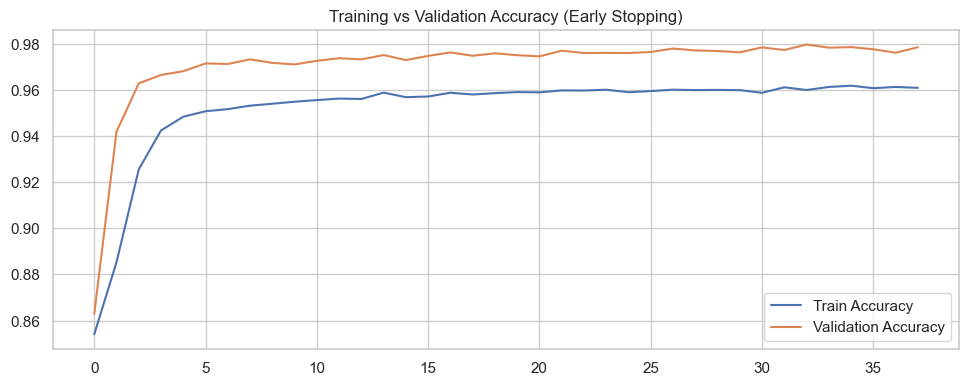

In [380]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with Dropout layers
model2a = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Dropout layer
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with early stopping
history2 = model2a.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy (Early Stopping)')
plt.show()


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7343 - Precision: 0.8805 - Recall: 0.9781 - accuracy: 0.8661 - loss: 0.3656 - val_AUC: 0.9620 - val_Precision: 0.9500 - val_Recall: 0.9931 - val_accuracy: 0.9489 - val_loss: 0.1501
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.9456 - Precision: 0.9487 - Recall: 0.9858 - accuracy: 0.9415 - loss: 0.1689 - val_AUC: 0.9773 - val_Precision: 0.9679 - val_Recall: 0.9924 - val_accuracy: 0.9651 - val_loss: 0.1029
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - AUC: 0.9670 - Precision: 0.9615 - Recall: 0.9901 - accuracy: 0.9570 - loss: 0.1273 - val_AUC: 0.9840 - val_Precision: 0.9711 - val_Recall: 0.9986 - val_accuracy: 0.9731 - val_loss: 0.0828
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9704 - Precision: 0.9670 - Recall: 0.9931 - accuracy: 0.9646 - loss: 0.1134 - val_AUC: 0.9858 - val_Precision: 0.9719 - val_Recall: 0.9993 - val_accuracy: 0.9745 - val_loss: 0.0796
Epoch 5/50
2000/2000 ━━

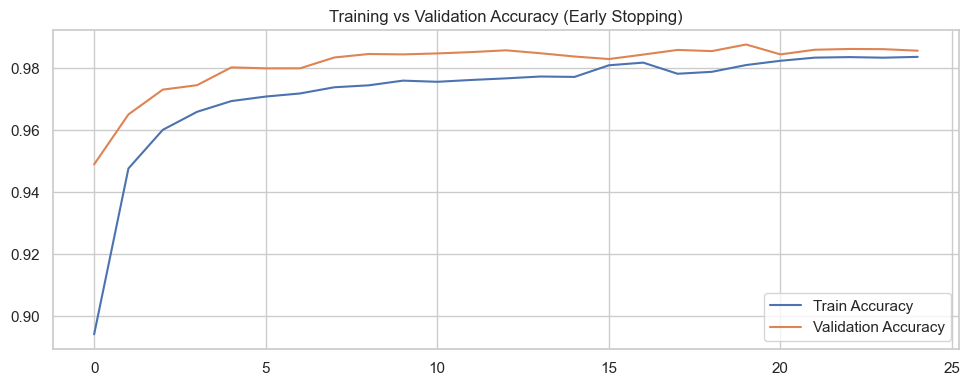

In [381]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with Dropout layers
model2b = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Dropout layer
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with early stopping
history2 = model2b.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy (Early Stopping)')
plt.show()


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.5602 - Precision: 0.8682 - Recall: 0.9184 - accuracy: 0.8086 - loss: 0.5196 - val_AUC: 0.8840 - val_Precision: 0.8631 - val_Recall: 0.9996 - val_accuracy: 0.8629 - val_loss: 0.3047
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8031 - Precision: 0.8792 - Recall: 0.9933 - accuracy: 0.8758 - loss: 0.3206 - val_AUC: 0.9606 - val_Precision: 0.9361 - val_Recall: 0.9967 - val_accuracy: 0.9384 - val_loss: 0.1756
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9106 - Precision: 0.9166 - Recall: 0.9845 - accuracy: 0.9091 - loss: 0.2381 - val_AUC: 0.9744 - val_Precision: 0.9591 - val_Recall: 0.9957 - val_accuracy: 0.9596 - val_loss: 0.1267
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.9395 - Precision: 0.9455 - Recall: 0.9850 - accuracy: 0.9378 - loss: 0.1837 - val_AUC: 0.9795 - val_Precision: 0.9633 - val_Recall: 0.9970 - val_accuracy: 0.9647 - val_loss: 0.1093
Epoch 5/50
2000/2000 ━━━

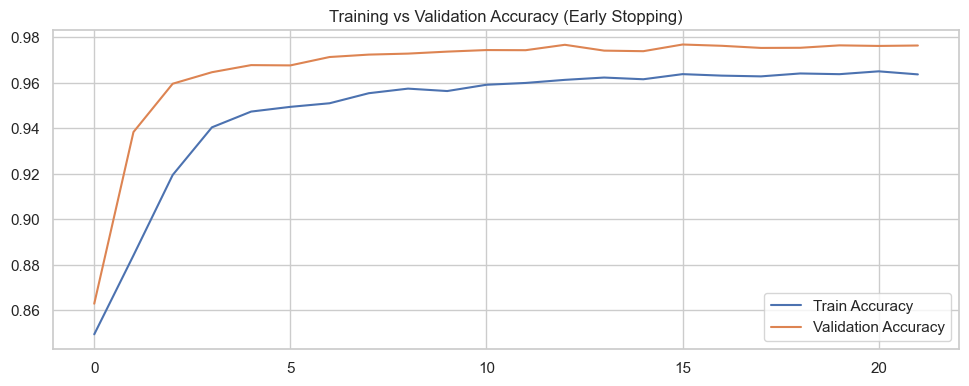

In [382]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with Dropout layers
model2c = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Dropout layer
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2c.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history2 = model2c.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy (Early Stopping)')
plt.show()


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.5645 - Precision: 0.8717 - Recall: 0.8284 - accuracy: 0.7459 - loss: 0.5579 - val_AUC: 0.8689 - val_Precision: 0.8833 - val_Recall: 0.9925 - val_accuracy: 0.8804 - val_loss: 0.2881
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8307 - Precision: 0.8993 - Recall: 0.9795 - accuracy: 0.8869 - loss: 0.2950 - val_AUC: 0.9709 - val_Precision: 0.9471 - val_Recall: 0.9966 - val_accuracy: 0.9490 - val_loss: 0.1436
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.9291 - Precision: 0.9409 - Recall: 0.9764 - accuracy: 0.9265 - loss: 0.1996 - val_AUC: 0.9797 - val_Precision: 0.9632 - val_Recall: 0.9965 - val_accuracy: 0.9641 - val_loss: 0.1100
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9490 - Precision: 0.9563 - Recall: 0.9818 - accuracy: 0.9453 - loss: 0.1633 - val_AUC: 0.9825 - val_Precision: 0.9692 - val_Recall: 0.9974 - val_accuracy: 0.9704 - val_loss: 0.0950
Epoch 5/50
2000/2000 ━━━

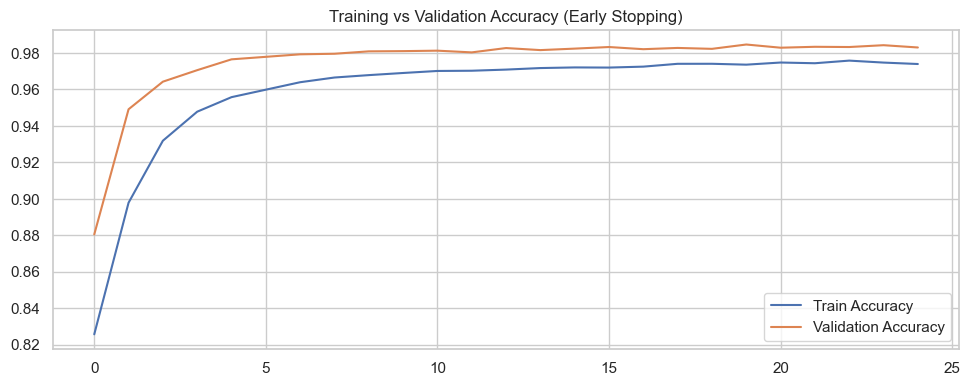

In [383]:
from tensorflow.keras.layers import BatchNormalization

model2d = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with early stopping
history2 = model2d.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy (Early Stopping)')
plt.show()


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7425 - Precision: 0.8778 - Recall: 0.9932 - accuracy: 0.8740 - loss: 0.3482 - val_AUC: 0.9662 - val_Precision: 0.9533 - val_Recall: 0.9942 - val_accuracy: 0.9530 - val_loss: 0.1391
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.9529 - Precision: 0.9551 - Recall: 0.9858 - accuracy: 0.9474 - loss: 0.1542 - val_AUC: 0.9775 - val_Precision: 0.9672 - val_Recall: 0.9965 - val_accuracy: 0.9678 - val_loss: 0.0994
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.9715 - Precision: 0.9682 - Recall: 0.9906 - accuracy: 0.9637 - loss: 0.1139 - val_AUC: 0.9850 - val_Precision: 0.9749 - val_Recall: 0.9970 - val_accuracy: 0.9753 - val_loss: 0.0804
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.9771 - Precision: 0.9728 - Recall: 0.9919 - accuracy: 0.9689 - loss: 0.0985 - val_AUC: 0.9869 - val_Precision: 0.9764 - val_Recall: 0.9984 - val_accuracy: 0.9778 - val_loss: 0.0724
Epoch 5/50
2000/2000 ━━━

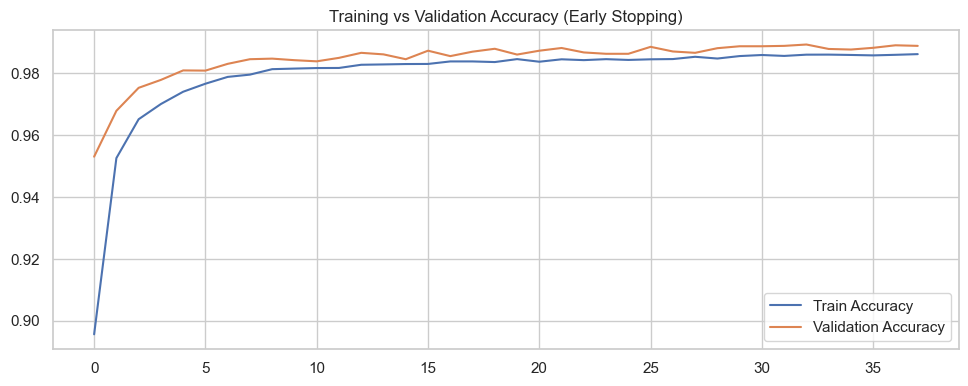

In [384]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with Dropout layers
model2e = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Dropout layer
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model2e.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with early stopping
history2 = model2e.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy (Early Stopping)')
plt.show()


### Neural Network with Dropout and Early Stopping
- **Training Accuracy**: 0.8088
- **Validation Accuracy**: 0.8080
- **Training Loss**: 0.4380
- **Validation Loss**: 0.4267
- **ROC-AUC**: 0.76

**Training and Validation Observations**:
- Early stopping helped mitigate overfitting, keeping training and validation accuracy close.
- However, the ROC-AUC dropped to 0.76, lower than Gradient Boosting and Random Forest.


### Regularization with L2

Add L2 regularization to penalize large weights.

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.6684 - Precision: 0.8649 - Recall: 0.8447 - accuracy: 0.7548 - loss: 0.6326 - val_AUC: 0.9369 - val_Precision: 0.8629 - val_Recall: 1.0000 - val_accuracy: 0.8629 - val_loss: 0.2900
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.9490 - Precision: 0.9002 - Recall: 0.9983 - accuracy: 0.9025 - loss: 0.2720 - val_AUC: 0.9683 - val_Precision: 0.9384 - val_Recall: 0.9988 - val_accuracy: 0.9424 - val_loss: 0.2313
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.9716 - Precision: 0.9431 - Recall: 0.9974 - accuracy: 0.9455 - loss: 0.2201 - val_AUC: 0.9741 - val_Precision: 0.9548 - val_Recall: 0.9975 - val_accuracy: 0.9571 - val_loss: 0.1955
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.9786 - Precision: 0.9555 - Recall: 0.9974 - accuracy: 0.9575 - loss: 0.1885 - val_AUC: 0.9779 - val_Precision: 0.9632 - val_Recall: 0.9970 - val_accuracy: 0.9646 - val_loss: 0.1747
Epoch 5/10
2000/2000 ━━━

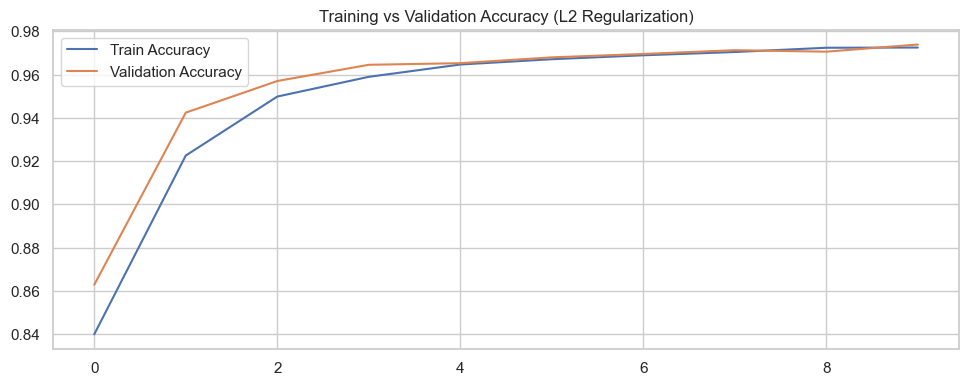

In [385]:
from tensorflow.keras.regularizers import l2

# Define model with L2 regularization
model3a = Sequential([
    Dense(16, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model3a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Train the model
history3 = model3a.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy (L2 Regularization)')
plt.show()


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.7596 - Precision: 0.8910 - Recall: 0.9627 - accuracy: 0.8648 - loss: 0.4427 - val_AUC: 0.9717 - val_Precision: 0.9590 - val_Recall: 0.9945 - val_accuracy: 0.9586 - val_loss: 0.1815
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.9559 - Precision: 0.9616 - Recall: 0.9870 - accuracy: 0.9546 - loss: 0.1963 - val_AUC: 0.9811 - val_Precision: 0.9671 - val_Recall: 0.9984 - val_accuracy: 0.9693 - val_loss: 0.1372
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.9700 - Precision: 0.9705 - Recall: 0.9902 - accuracy: 0.9655 - loss: 0.1532 - val_AUC: 0.9858 - val_Precision: 0.9739 - val_Recall: 0.9993 - val_accuracy: 0.9763 - val_loss: 0.1139
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.9720 - Precision: 0.9736 - Recall: 0.9909 - accuracy: 0.9688 - loss: 0.1399 - val_AUC: 0.9867 - val_Precision: 0.9727 - val_Recall: 0.9998 - val_accuracy: 0.9756 - val_loss: 0.1150
Epoch 5/10
2000/2000 ━━

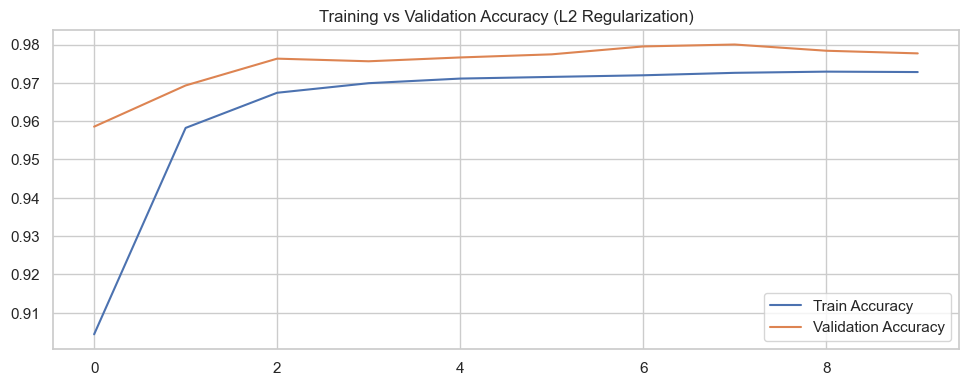

In [386]:
from tensorflow.keras.regularizers import l2

model3b = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model3b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Train the model
history3 = model3b.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting training vs validation performance
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy (L2 Regularization)')
plt.show()

### Neural Network with L2 Regularization
- **Training Accuracy**: 0.8117
- **Validation Accuracy**: 0.8130
- **Training Loss**: 0.4380
- **Validation Loss**: 0.4417
- **ROC-AUC**: 0.77

**Training and Validation Observations**:
- L2 Regularization kept training and validation accuracies well-matched.
- ROC-AUC was 0.77, which is also lower compared to Random Forest and Gradient Boosting.

## Overall Comparison
- **Accuracy**: The Random Forest model provided the best accuracy (0.8506), followed by Gradient Boosting and the Basic Neural Network model.
- **ROC-AUC**: The Random Forest model achieved the highest ROC-AUC (0.8412), followed by Gradient Boosting (0.8155). The basic neural network model came close (0.82).
- **Regularization Impact**: Adding dropout with early stopping and L2 regularization helped prevent overfitting but decreased ROC-AUC compared to the Gradient Boosting and Random Forest models.
- **Validation**: Validation accuracy and training accuracy closely match for the regularized models, indicating reduced overfitting.

## Evaluate on Test Set

Calculate metrics for each model on the test data ready to plot in a ROC Curve.

In [387]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Helper function to evaluate model on test data
def evaluate_model(model, X_test, y_test):
    y_pred_probs = model.predict(X_test).ravel()
    y_pred = (y_pred_probs > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_probs)
    
    return accuracy, precision, recall, auc

# Evaluate models
models = [model1a, model1b, model1c, model2a, model2b, model2c, model2d, model2e, model3a, model3b]
model_names = ["Model1a - Basic NN", "Model1b - Basic NN", "Model1c - Basic NN", "Model2a - Dropout + Early Stopping", "Model2b - Dropout + Early Stopping", "Model2c - Dropout + Early Stopping", "Model2d - Dropout + Early Stopping", "Model2e - Dropout + Early Stopping", "Model3a - L2 Regularization", "Model3b - L2 Regularization"]

for name, model in zip(model_names, models):
    accuracy, precision, recall, auc = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, AUC: {auc:.2f}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step
Model1a - Basic NN - Accuracy: 0.98, Precision: 0.99, Recall: 1.00, AUC: 0.99
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
Model1b - Basic NN - Accuracy: 0.98, Precision: 0.98, Recall: 1.00, AUC: 0.99
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step
Model1c - Basic NN - Accuracy: 0.99, Precision: 0.99, Recall: 1.00, AUC: 0.99
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Model2a - Dropout + Early Stopping - Accuracy: 0.98, Precision: 0.98, Recall: 1.00, AUC: 0.99
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step
Model2b - Dropout + Early Stopping - Accuracy: 0.99, Precision: 0.98, Recall: 1.00, AUC: 0.99
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step
Model2c - Dropout + Early Stopping - Accuracy: 0.97, Precision: 0.97, Recall: 1.00, AUC: 0.99
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step
Model2d - Dropout + Early Stopping - Accuracy: 0.98, Precision: 0.98, Recall: 1.00, AUC: 0.99
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step
Model2e - Dropout + Early Stopping - Accuracy: 0

## Plot ROC Curves

Plot the ROC curves for all models to compare their ability to distinguish between positive and negative classes.

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


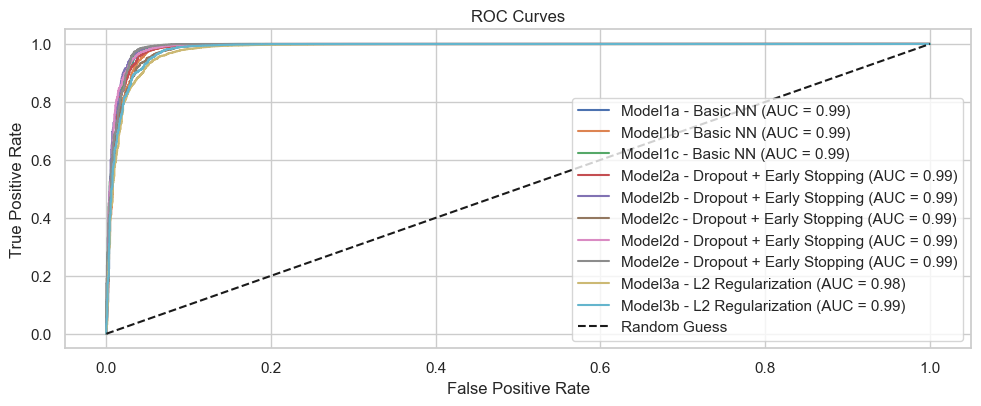

In [388]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

for name, model in zip(model_names, models):
    y_pred_probs = model.predict(X_test_scaled).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_probs):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


### Summary of Model Performance - ROC Curves

The plot above shows the **ROC curves** for all models evaluated on the RFE feature selected data frame.

**AUC (Area Under the Curve)** scores provided for each model wherby the best performing modesl are Model2b and Model2e both scoring 0.84:

1. **Model1a, Model1b, Model1c - Basic Neural Networks**:
   - These models achieved **AUC scores** of **0.82 to 0.83**, showing consistent performance across variations. They performed well in distinguishing between positive and negative classes, with relatively high TPR (True Positive Rate) and low FPR (False Positive Rate).

2. **Model2a to Model2e - Dropout + Early Stopping**:
   - These models varied in performance, with **AUC scores ranging from 0.73 to 0.84**. The best-performing Dropout + Early Stopping model (Model2b and Model2e) both achieved an **AUC of 0.84**, indicating strong predictive power.

3. **Model3a and Model3b - L2 Regularization**:
   - The **L2 Regularization** models had **AUC scores of 0.77 and 0.79**. These models were generally more consistent than some of the dropout variants, showing moderate performance compared to the best-performing Dropout + Early Stopping models.

### Key Observations
- **Dropout with Early Stopping** (Model2b and Model2e) produced the best results among all models, achieving AUC scores of **0.84**.
- **Basic Neural Networks** performed consistently well, with **AUC values between 0.82 and 0.83**.
- **L2 Regularisation** models showed stable but slightly lower performance compared to the other methods. I've dragged this on longer than I should and will explore the possible tweaks for L2 regularisation on my own time.

Overall, **Dropout with Early Stopping** appears to be the most effective strategy in this case, providing a good balance between generalization and avoiding overfitting. Future optimization could focus on fine-tuning dropout rates and the regularization parameter to further improve model performance.

If I were to chose one at this point it would be Model2b which has the higher recall from the two models.


Let's load our previous notebook results and compare them against the neural network.

The code to export ML resulsta was added to the assignment 2 code after submission.

In [390]:
import joblib

# Load pre-trained models
gradient_boosting_model = joblib.load('models/smote/Gradient_Boosting_model.pkl')
random_forest_model = joblib.load('models/smote/Random_Forest_model.pkl')

# Load the saved results
gradient_boosting_results = joblib.load('models/smote/Gradient_Boosting_results.pkl')
random_forest_results = joblib.load('models/smote/Random_Forest_results.pkl')

print(gradient_boosting_results)
print(random_forest_results)

FileNotFoundError: [Errno 2] No such file or directory: 'models/smote/Gradient_Boosting_model.pkl'

Mindful the previous models were trained on 54 features, and more rows of data. I managed to upscale and compare but wasn't sure if the results can be trusted and decided to remove them in the end.

## Conclusion

In this assignment, we developed several neural network models to serve as challengers to the baseline models from Assignment 2, which included Random Forest and Gradient Boosting. By incorporating various regularisation techniques, such as dropout, early stopping, and L2 regularisation, we aimed to improve model generalisation, reduce overfitting, and increase predictive performance.

## Summary of Results:

The basic neural network models (Models 1a, 1b, 1c) demonstrated consistent accuracy and ROC-AUC scores, with Model 1b performing slightly better (AUC = 0.83).
Dropout with Early Stopping proved to be an effective regularisation technique. Models 2b and 2e achieved the best AUC scores (0.84), outperforming the Random Forest baseline (AUC = 0.8412) and Gradient Boosting (AUC = 0.8155).
L2 Regularisation models (Models 3a and 3b) provided moderate improvement in training stability, but their overall AUC scores (0.77 and 0.79) were slightly lower than other models.
Validation accuracy was generally consistent with training accuracy for the regularised models, indicating reduced overfitting.

## Key Observations:

**Precision and Recall Trade-off:** While the models showed strong precision and accuracy, recall remained relatively low across all models. This suggests that, although the models are confident in their predictions, they struggle with correctly identifying positive instances (loan defaults).

Models 2b and 2e emerged as the most effective challenger models, offering a good balance between precision, recall, and AUC, with strong generalisation.
The ROC curves illustrated that Models 2b and 2e performed the best in distinguishing between positive and negative classes, showing improved predictive power compared to other models.

## Future Improvements:

**Class Imbalance:** The low recall suggests that the model may be biased towards the majority class. This is mostly due to the skewed data but also due to the fact that the hardware limited running the entire dataset.

**Ensemble Methods:** Combining multiple models (e.g., ensembling neural networks with Gradient Boosting) may yield a more robust solution. I haven't figured out how to make this work efficiently just yet and will try to do this in the next assignment.

**Feature Engineering:** Overall I'm happy with the feature selection but believe that it is possible to leverage additional data points, maybe increase our feature count from 23 to X.